# 1. Import Packages

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.layers import SimpleRNN, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

# 2. Prepare Functions

In [2]:
%run functions/combine_data.ipynb 
%run functions/initial_global_model.ipynb 
%run functions/FDL.ipynb 
%run functions/deep_learning_analysis.ipynb

# 3. Prepare All Input Values and Output Folder Name

In [3]:
num_days = 5
mins_before_predict_list = [30] # 30 mins = 0.5 hour
window_slide_list = [180] # 180 mins = 3 hours
monitor = "val_loss"
learning_rate = 0.001
epochs = 10
neuron_nums = [64,32]
batch_size = 32
num_rounds = 5
seed_number = 1

output_folder_name = 'Results'

## 3.1 Prepare Patients: 5 Patients to Train Initial Global Model + 25 Patients to Train the Local Model

In [4]:
global_patients = ["adolescent#001.csv","adolescent#002.csv","adult#001.csv","adult#002.csv","child#001.csv"]
local_patients = ["adolescent#003.csv","adolescent#004.csv","adolescent#005.csv","adolescent#006.csv","adolescent#007.csv","adolescent#008.csv","adolescent#009.csv","adolescent#010.csv","adult#003.csv","adult#004.csv","adult#005.csv","adult#006.csv","adult#007.csv","adult#008.csv","adult#009.csv","adult#010.csv","child#002.csv","child#003.csv","child#004.csv","child#005.csv","child#006.csv","child#007.csv","child#008.csv","child#009.csv","child#010.csv"]

# 4. Federated Deep Learning

## 4.1 Combine Data for the Initial Global Model

In [5]:
patients_included = global_patients
combined_data_training, combined_data_validation, combined_data_testing = combine_data(patients_included,num_days,seed_number)

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#001.csv
C:\Users\xinyi.yang\Desktop\group meeting\adolescent#002.csv
C:\Users\xinyi.yang\Desktop\group meeting\adult#001.csv
C:\Users\xinyi.yang\Desktop\group meeting\adult#002.csv
C:\Users\xinyi.yang\Desktop\group meeting\child#001.csv


## 4.2 Generate Initial Global Model

Neuron Num: 64, 32
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4352      
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,465
Trainable params: 6,465
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
219/220 [============================>.] - ETA: 0s - loss: 2320.8652 - mse: 2320.8652
Epoch 1: val_loss improved from inf to 1444.80188, saving model to Results/5_days_data_FDL/models\best_model_mins_before_predict_30_window_slide_180.h5
220/220 [==============================] - 13

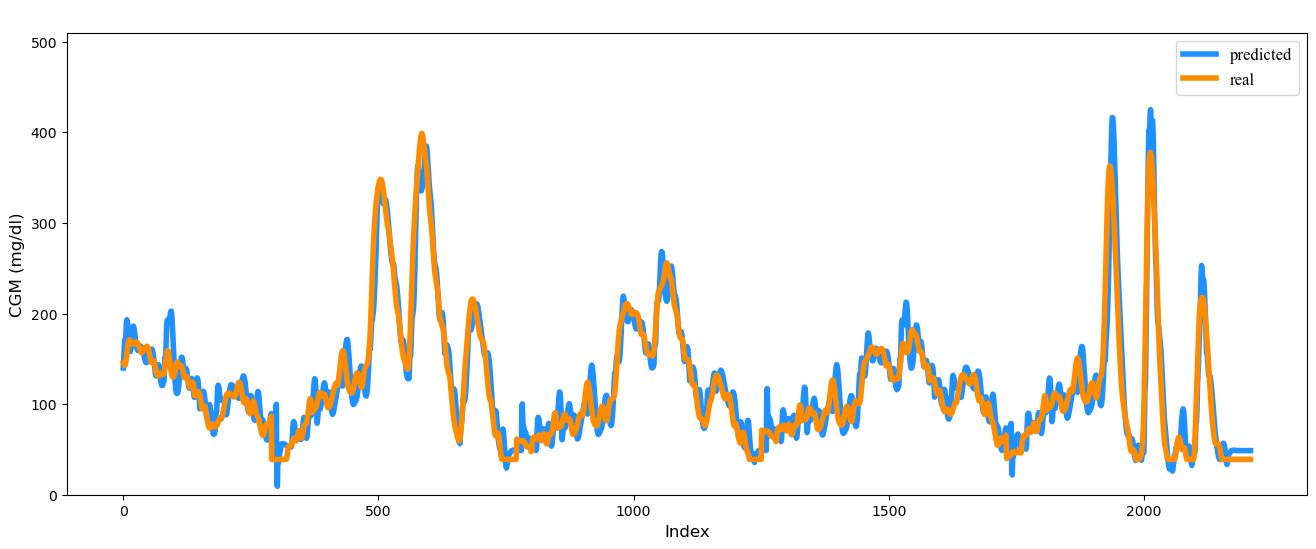

RMSE value of the model: 20.7534


20.75335443559317

In [6]:
function_name = "FDL"
initial_global_model(output_folder_name, num_days, seed_number, combined_data_training, combined_data_validation, combined_data_testing, function_name, mins_before_predict_list, window_slide_list, epochs)

## 4.3  Generate FDL Model

round: 0
C:\Users\xinyi.yang\Desktop\group meeting\adolescent#003.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 15ms/step
RMSE value of the global model: 15.3101
Epoch 1/10
39/40 [============================>.] - ETA: 0s - loss: 533.0378 - mse: 533.0378
Epoch 1: val_loss improved from inf to 469.39929, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#003.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 54ms/step - loss: 532.2625 - mse: 532.2625 - val_loss: 469.3993 - val_mse: 469.3993
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 326.3982 - mse: 326.3982
Epoch 2: val_loss improved from 469.39929 to 368.49600, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#003.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 2s 50ms/step - loss: 326.3982 - mse: 326.3982 - val_loss: 368.4960 - val_mse: 368.4960


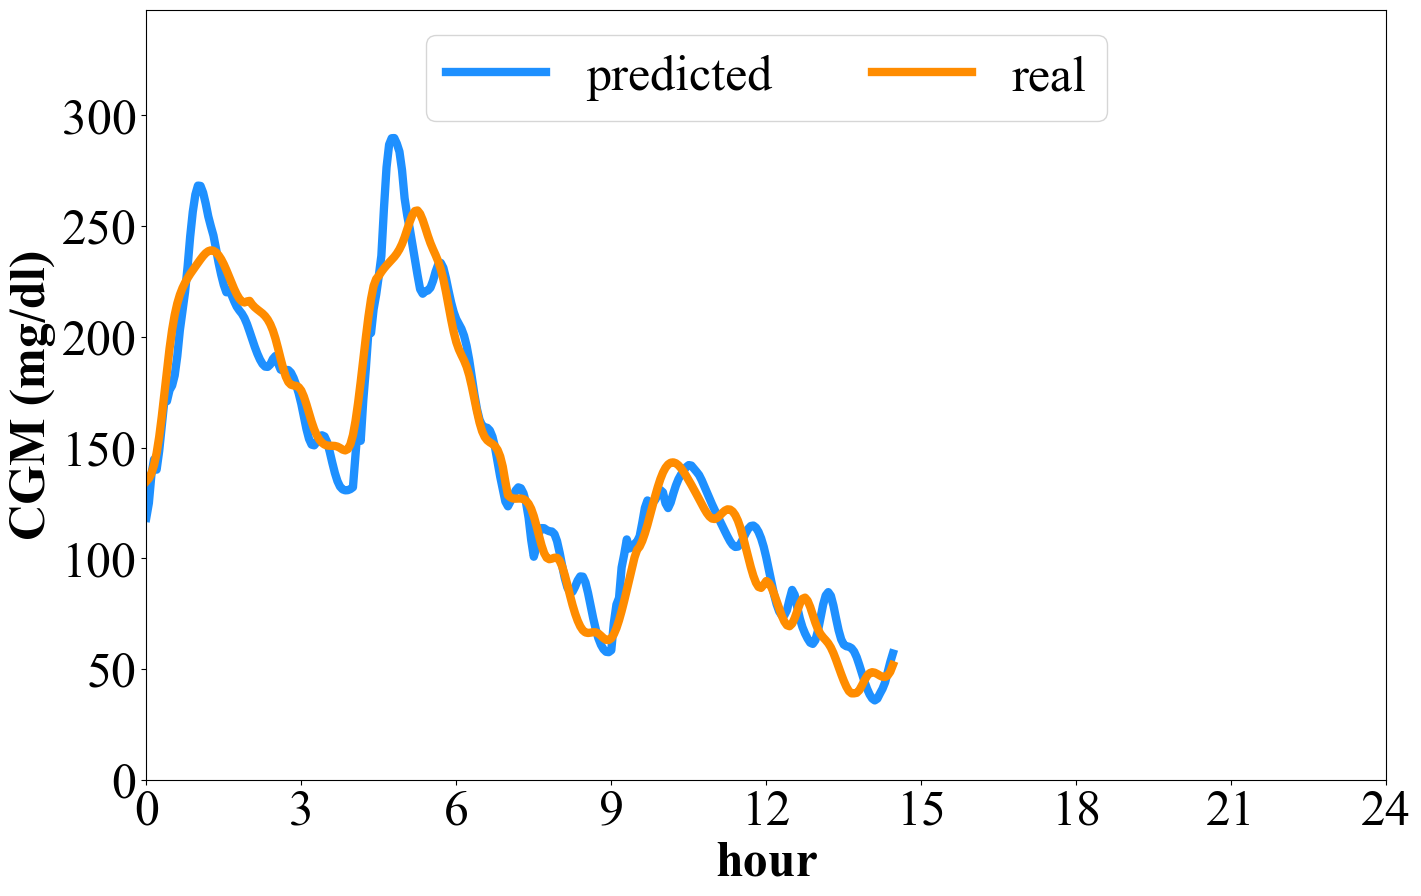

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#004.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 14ms/step
RMSE value of the global model: 16.8912
Epoch 1/10
39/40 [============================>.] - ETA: 0s - loss: 910.1691 - mse: 910.1691
Epoch 1: val_loss improved from inf to 684.75323, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#004.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 52ms/step - loss: 908.7266 - mse: 908.7266 - val_loss: 684.7532 - val_mse: 684.7532
Epoch 2/10
39/40 [============================>.] - ETA: 0s - loss: 413.8473 - mse: 413.8473
Epoch 2: val_loss improved from 684.75323 to 408.75726, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#004.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 2s 47ms/step - loss: 413.3153 - mse: 413.3153 - val_loss: 408.7573 - val_mse: 408.7573
Epoch 3/1

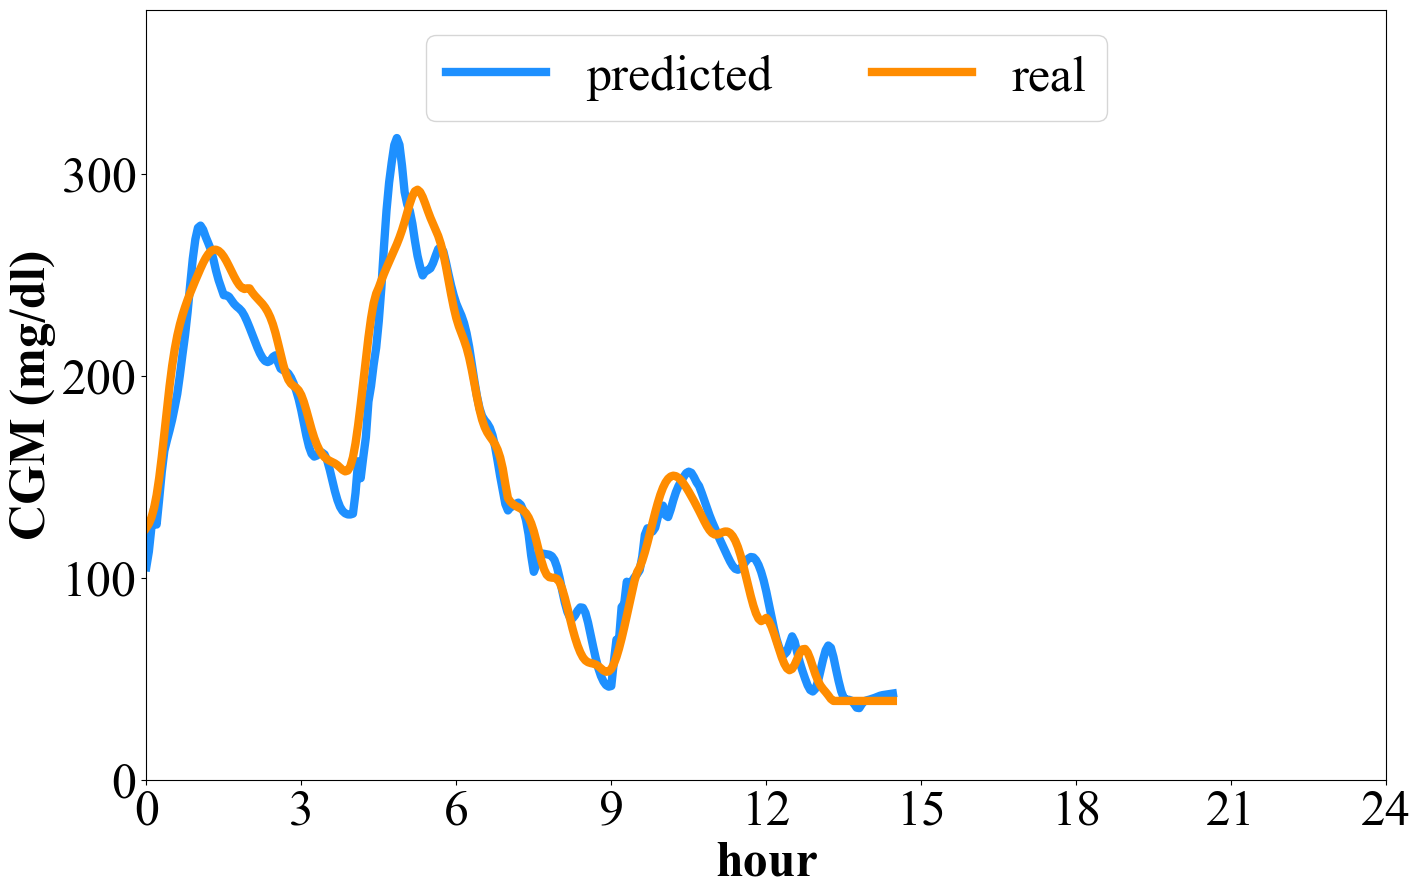

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#005.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 16ms/step
RMSE value of the global model: 15.4272
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 531.3514 - mse: 531.3514
Epoch 1: val_loss improved from inf to 529.48352, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#005.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 67ms/step - loss: 531.3514 - mse: 531.3514 - val_loss: 529.4835 - val_mse: 529.4835
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 293.6134 - mse: 293.6134
Epoch 2: val_loss improved from 529.48352 to 306.24875, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#005.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 2s 55ms/step - loss: 293.6134 - mse: 293.6134 - val_loss: 306.2487 - val_mse: 306.2487
Epoch 3/1

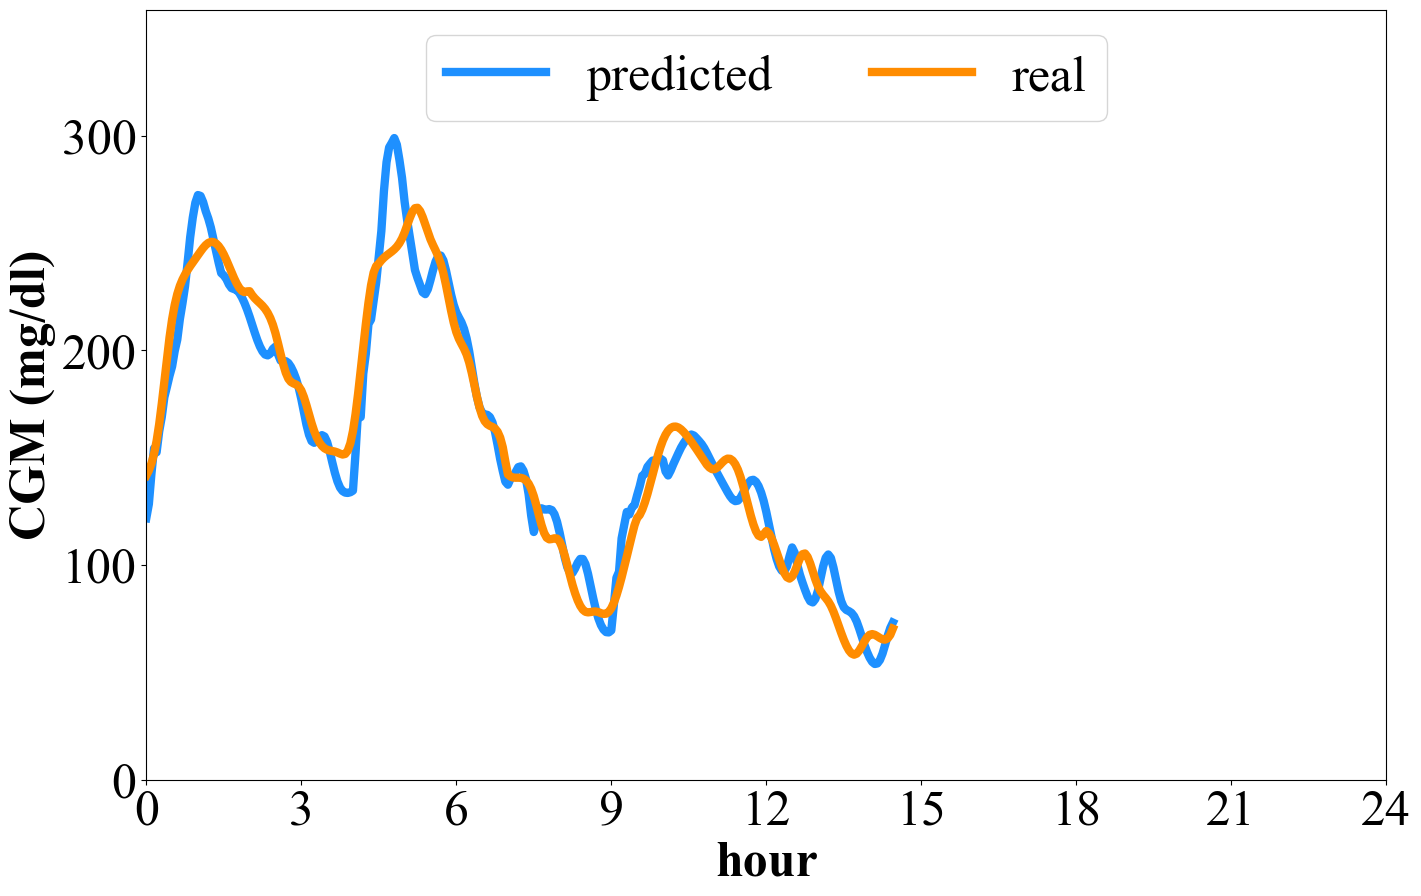

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#006.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 17ms/step
RMSE value of the global model: 16.9917
Epoch 1/10
39/40 [============================>.] - ETA: 0s - loss: 373.3045 - mse: 373.3045
Epoch 1: val_loss improved from inf to 1019.54083, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#006.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 63ms/step - loss: 372.7363 - mse: 372.7363 - val_loss: 1019.5408 - val_mse: 1019.5408
Epoch 2/10
39/40 [============================>.] - ETA: 0s - loss: 317.8652 - mse: 317.8652
Epoch 2: val_loss improved from 1019.54083 to 897.62476, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#006.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 2s 50ms/step - loss: 317.4470 - mse: 317.4470 - val_loss: 897.6248 - val_mse: 897.6248
Epoch

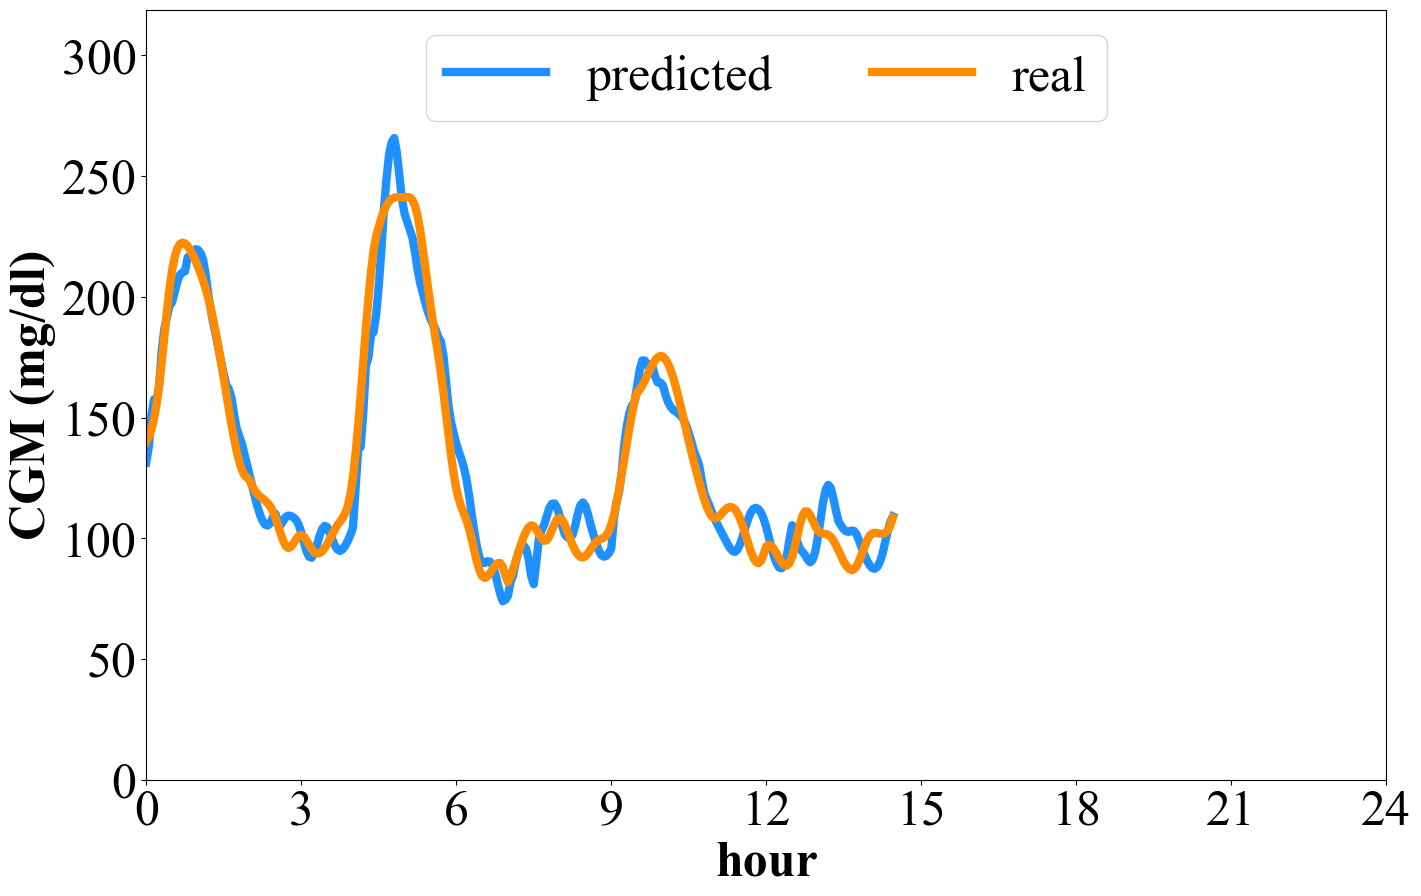

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#007.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 17ms/step
RMSE value of the global model: 28.6277
Epoch 1/10
39/40 [============================>.] - ETA: 0s - loss: 976.4465 - mse: 976.4465  
Epoch 1: val_loss improved from inf to 736.69940, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#007.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 59ms/step - loss: 975.0466 - mse: 975.0466 - val_loss: 736.6994 - val_mse: 736.6994
Epoch 2/10
39/40 [============================>.] - ETA: 0s - loss: 467.3725 - mse: 467.3725
Epoch 2: val_loss did not improve from 736.69940
40/40 [==============================] - 2s 49ms/step - loss: 466.8134 - mse: 466.8134 - val_loss: 745.0647 - val_mse: 745.0647
Epoch 3/10
39/40 [============================>.] - ETA: 0s - loss: 334.6391 - mse: 334.6391
Epoch 3: val_loss improved from 736.69940 to

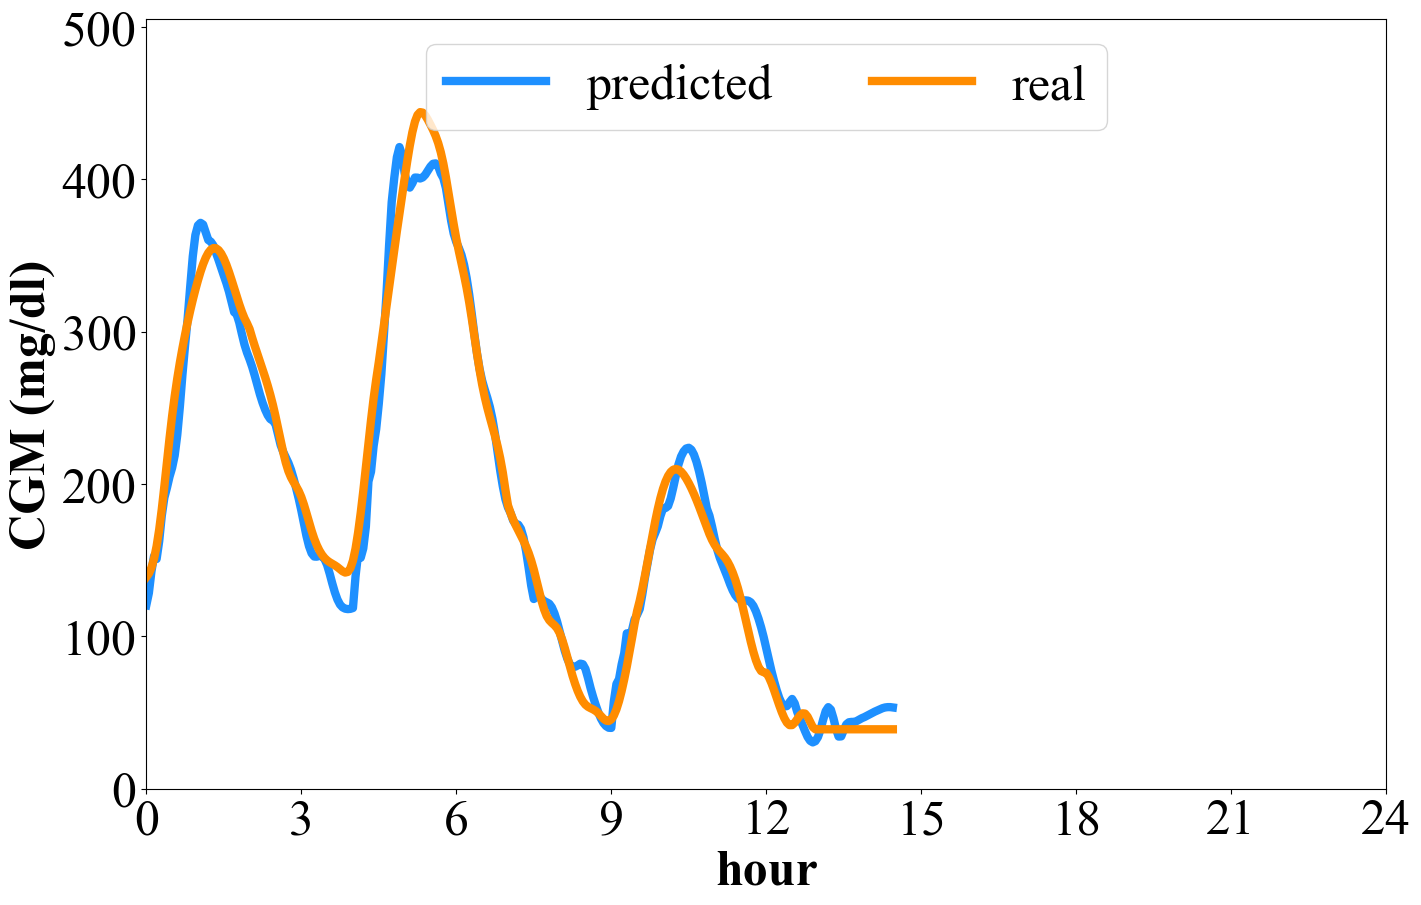

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#008.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 15ms/step
RMSE value of the global model: 28.0838
Epoch 1/10
39/40 [============================>.] - ETA: 0s - loss: 679.8145 - mse: 679.8145
Epoch 1: val_loss improved from inf to 855.04895, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#008.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 52ms/step - loss: 679.0503 - mse: 679.0503 - val_loss: 855.0490 - val_mse: 855.0490
Epoch 2/10
39/40 [============================>.] - ETA: 0s - loss: 419.1779 - mse: 419.1779
Epoch 2: val_loss did not improve from 855.04895
40/40 [==============================] - 2s 47ms/step - loss: 418.6939 - mse: 418.6939 - val_loss: 903.4855 - val_mse: 903.4855
Epoch 3/10
39/40 [============================>.] - ETA: 0s - loss: 320.0962 - mse: 320.0962
Epoch 3: val_loss improved from 855.04895 to 5

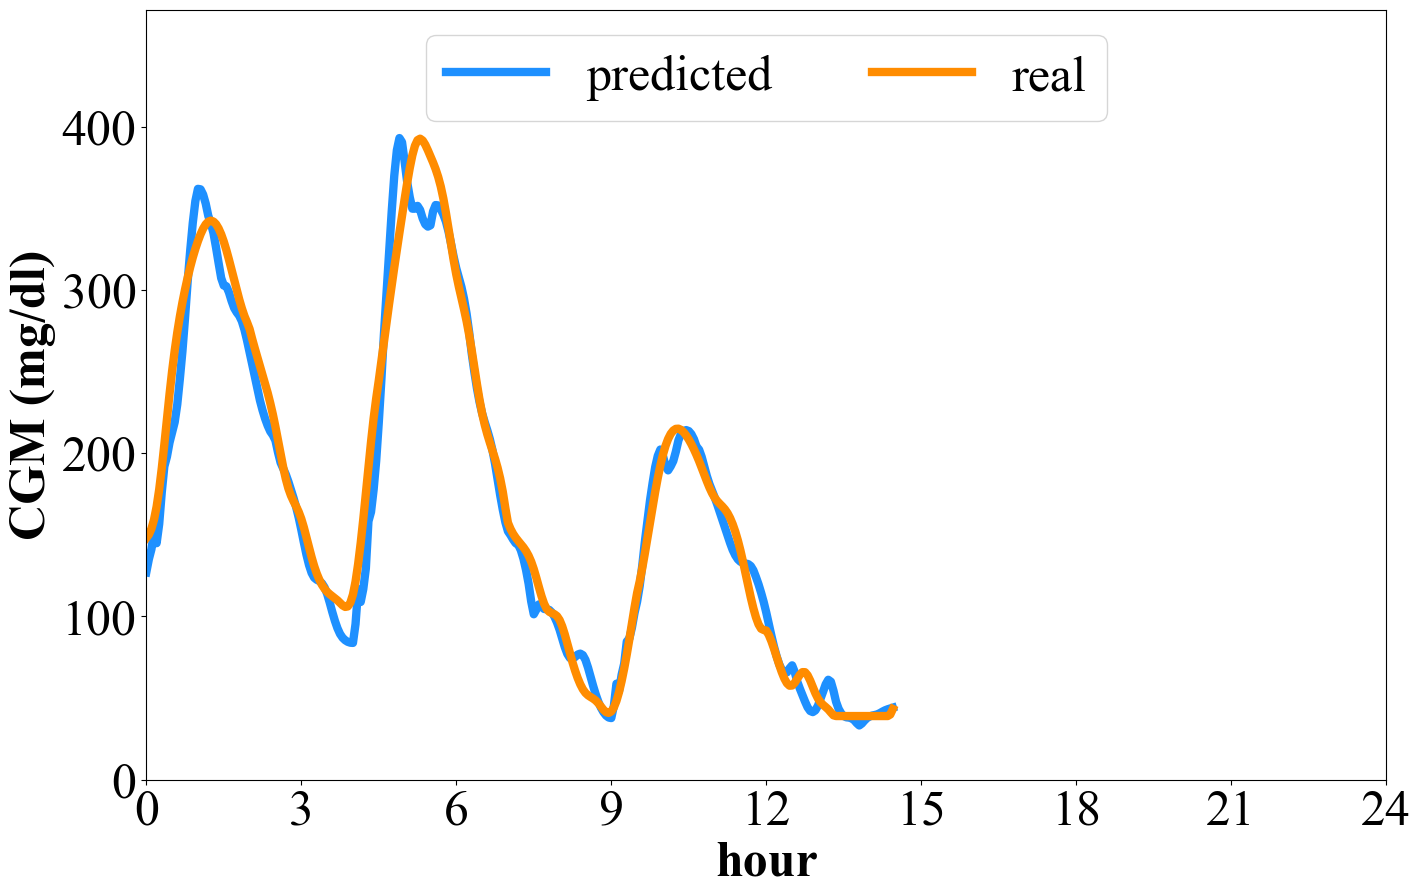

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#009.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 15ms/step
RMSE value of the global model: 16.8013
Epoch 1/10
39/40 [============================>.] - ETA: 0s - loss: 578.2306 - mse: 578.2306
Epoch 1: val_loss improved from inf to 554.84052, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#009.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 55ms/step - loss: 577.4604 - mse: 577.4604 - val_loss: 554.8405 - val_mse: 554.8405
Epoch 2/10
39/40 [============================>.] - ETA: 0s - loss: 353.5972 - mse: 353.5972
Epoch 2: val_loss improved from 554.84052 to 399.05161, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#009.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 2s 45ms/step - loss: 353.2131 - mse: 353.2131 - val_loss: 399.0516 - val_mse: 399.0516
Epoch 3/1

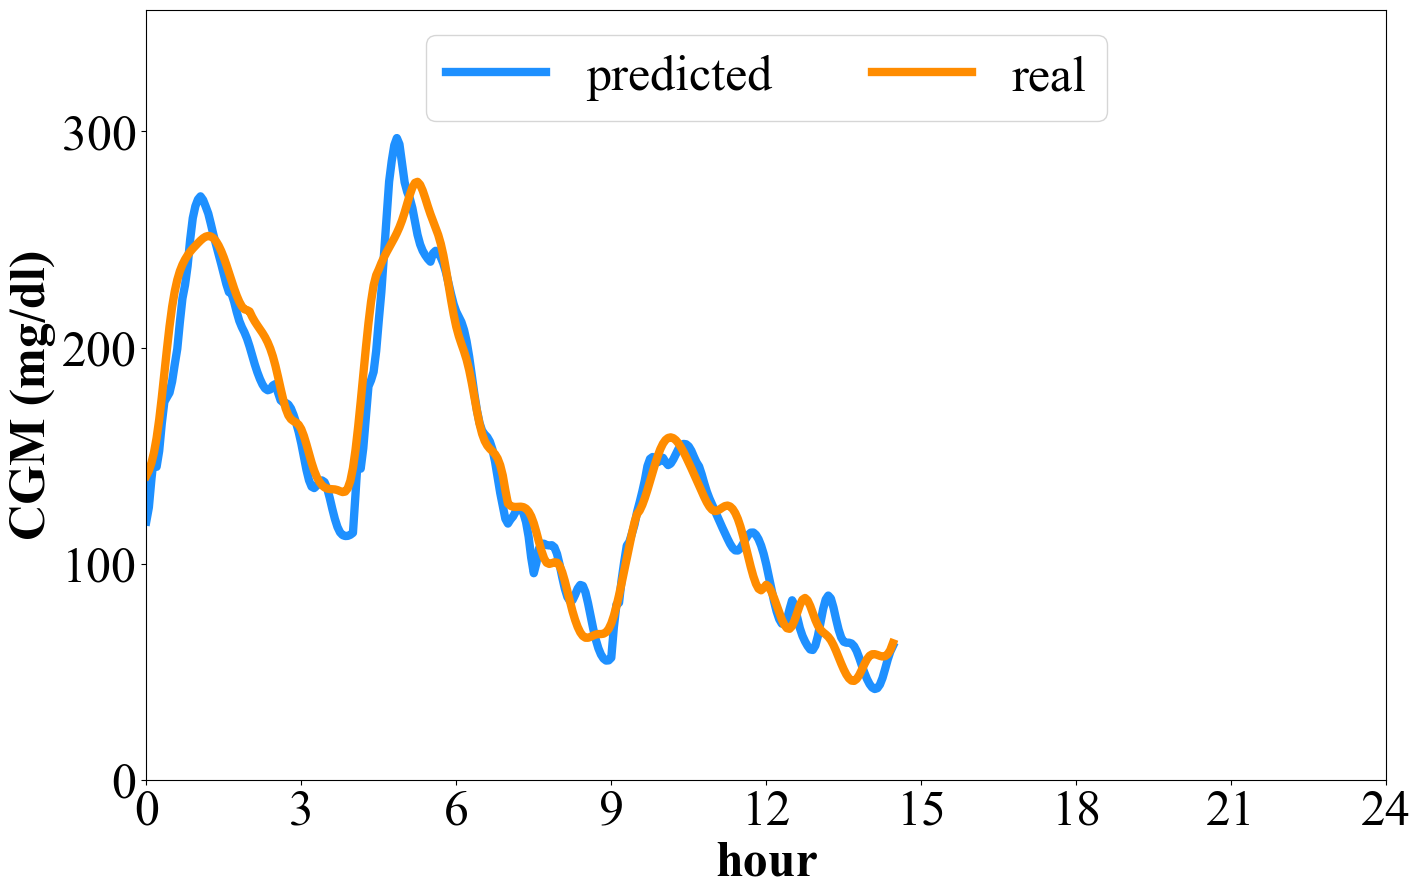

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#010.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 23ms/step
RMSE value of the global model: 15.8709
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 264.0199 - mse: 264.0199
Epoch 1: val_loss improved from inf to 512.64001, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#010.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 79ms/step - loss: 264.0199 - mse: 264.0199 - val_loss: 512.6400 - val_mse: 512.6400
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 236.7216 - mse: 236.7216
Epoch 2: val_loss improved from 512.64001 to 319.24844, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#010.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 70ms/step - loss: 236.7216 - mse: 236.7216 - val_loss: 319.2484 - val_mse: 319.2484
Epoch 3/1

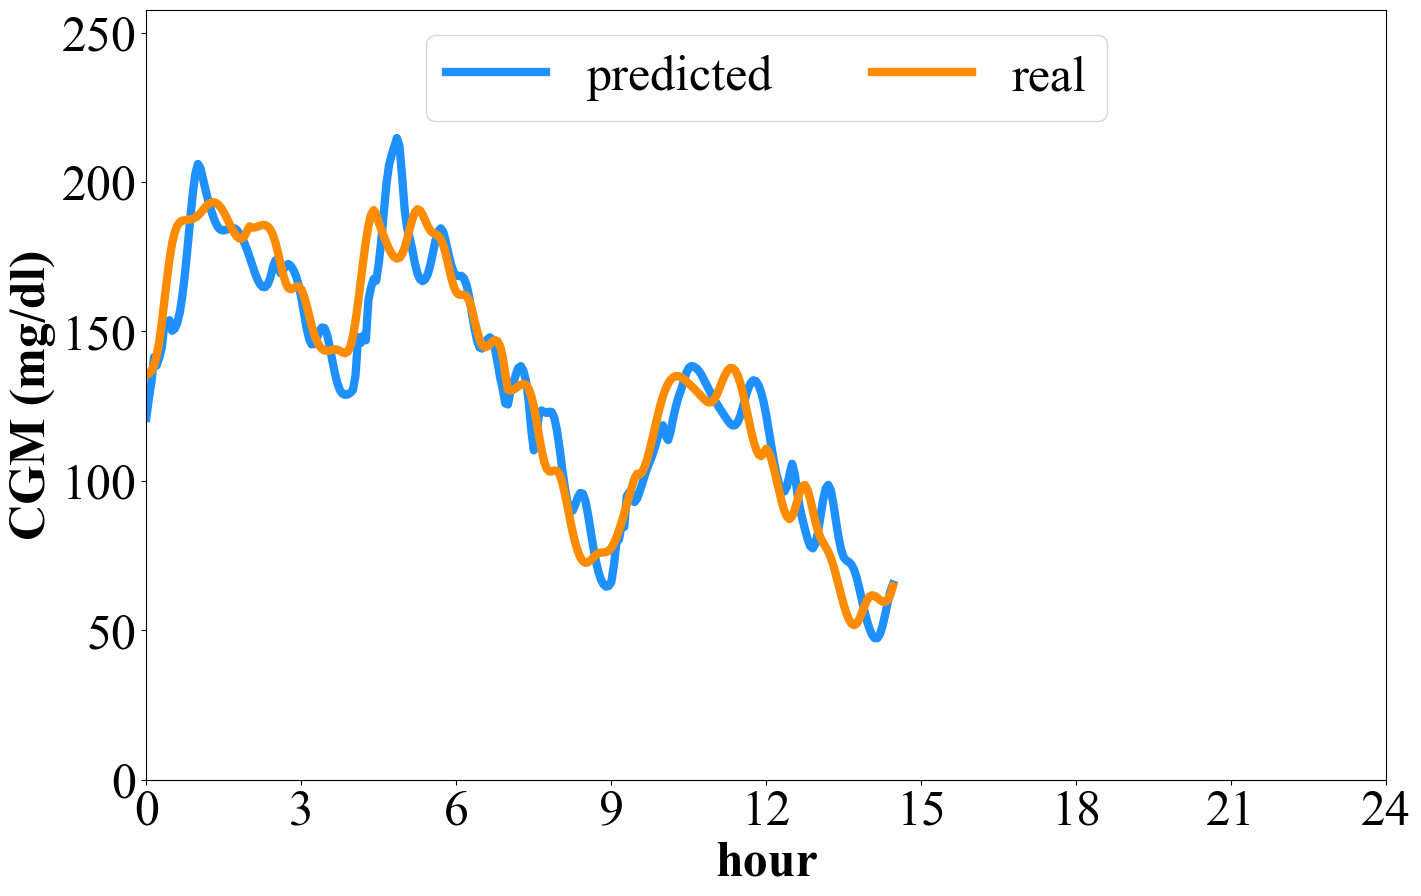

C:\Users\xinyi.yang\Desktop\group meeting\adult#003.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 20ms/step
RMSE value of the global model: 16.7010
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 463.0808 - mse: 463.0808
Epoch 1: val_loss improved from inf to 543.95709, saving model to Results/5_days_data_FDL/models\FDL_5_adult#003.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 73ms/step - loss: 463.0808 - mse: 463.0808 - val_loss: 543.9571 - val_mse: 543.9571
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 392.4675 - mse: 392.4675
Epoch 2: val_loss improved from 543.95709 to 491.22989, saving model to Results/5_days_data_FDL/models\FDL_5_adult#003.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 67ms/step - loss: 392.4675 - mse: 392.4675 - val_loss: 491.2299 - val_mse: 491.2299
Epoch 3/10
40/40 [======

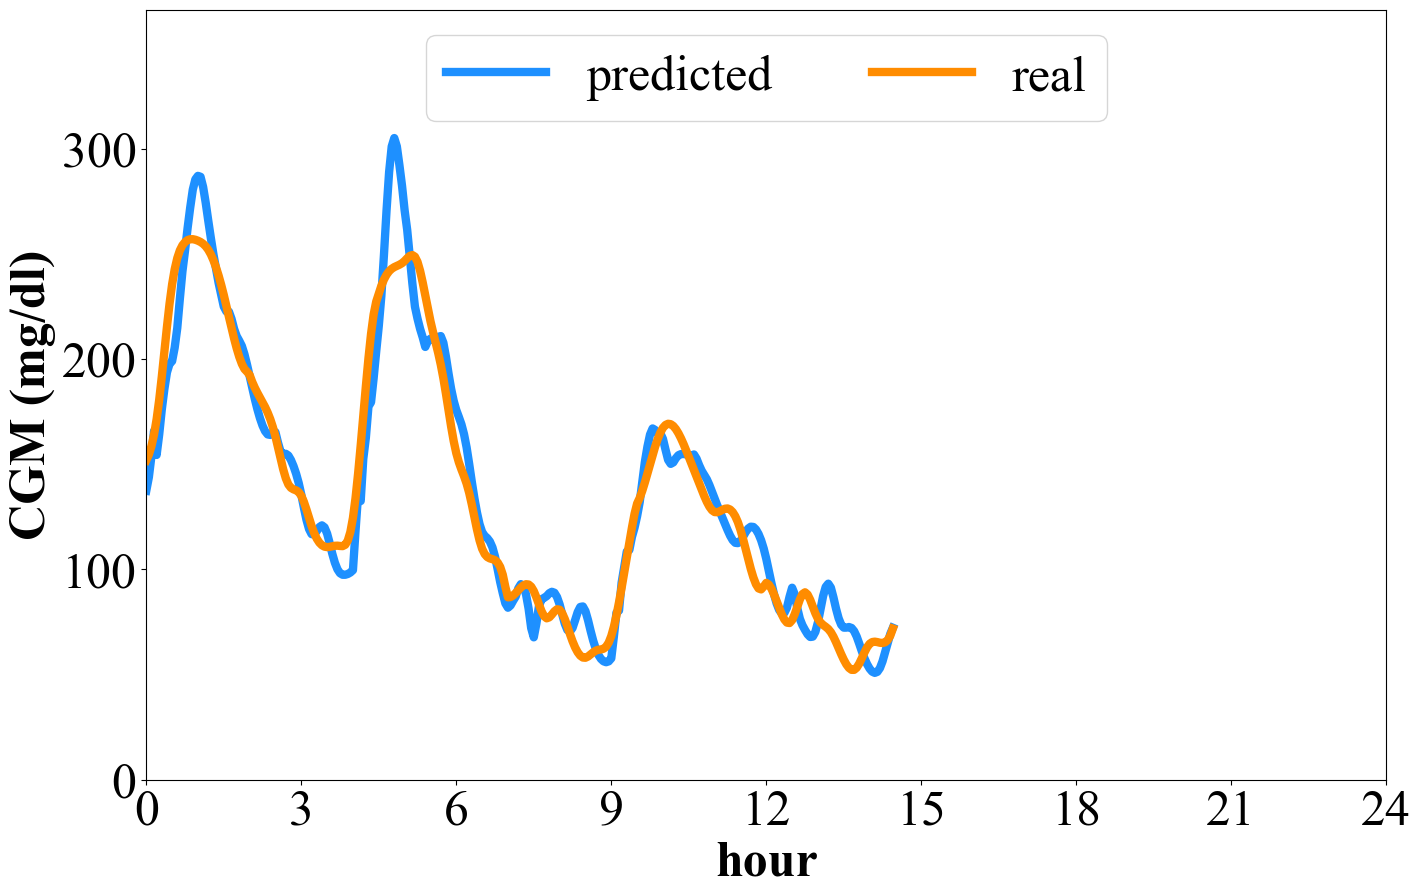

C:\Users\xinyi.yang\Desktop\group meeting\adult#004.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 20ms/step
RMSE value of the global model: 17.5994
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 566.7469 - mse: 566.7469
Epoch 1: val_loss improved from inf to 886.81030, saving model to Results/5_days_data_FDL/models\FDL_5_adult#004.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 68ms/step - loss: 566.7469 - mse: 566.7469 - val_loss: 886.8103 - val_mse: 886.8103
Epoch 2/10
39/40 [============================>.] - ETA: 0s - loss: 325.7070 - mse: 325.7070
Epoch 2: val_loss improved from 886.81030 to 618.45917, saving model to Results/5_days_data_FDL/models\FDL_5_adult#004.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 2s 59ms/step - loss: 325.3668 - mse: 325.3668 - val_loss: 618.4592 - val_mse: 618.4592
Epoch 3/10
40/40 [======

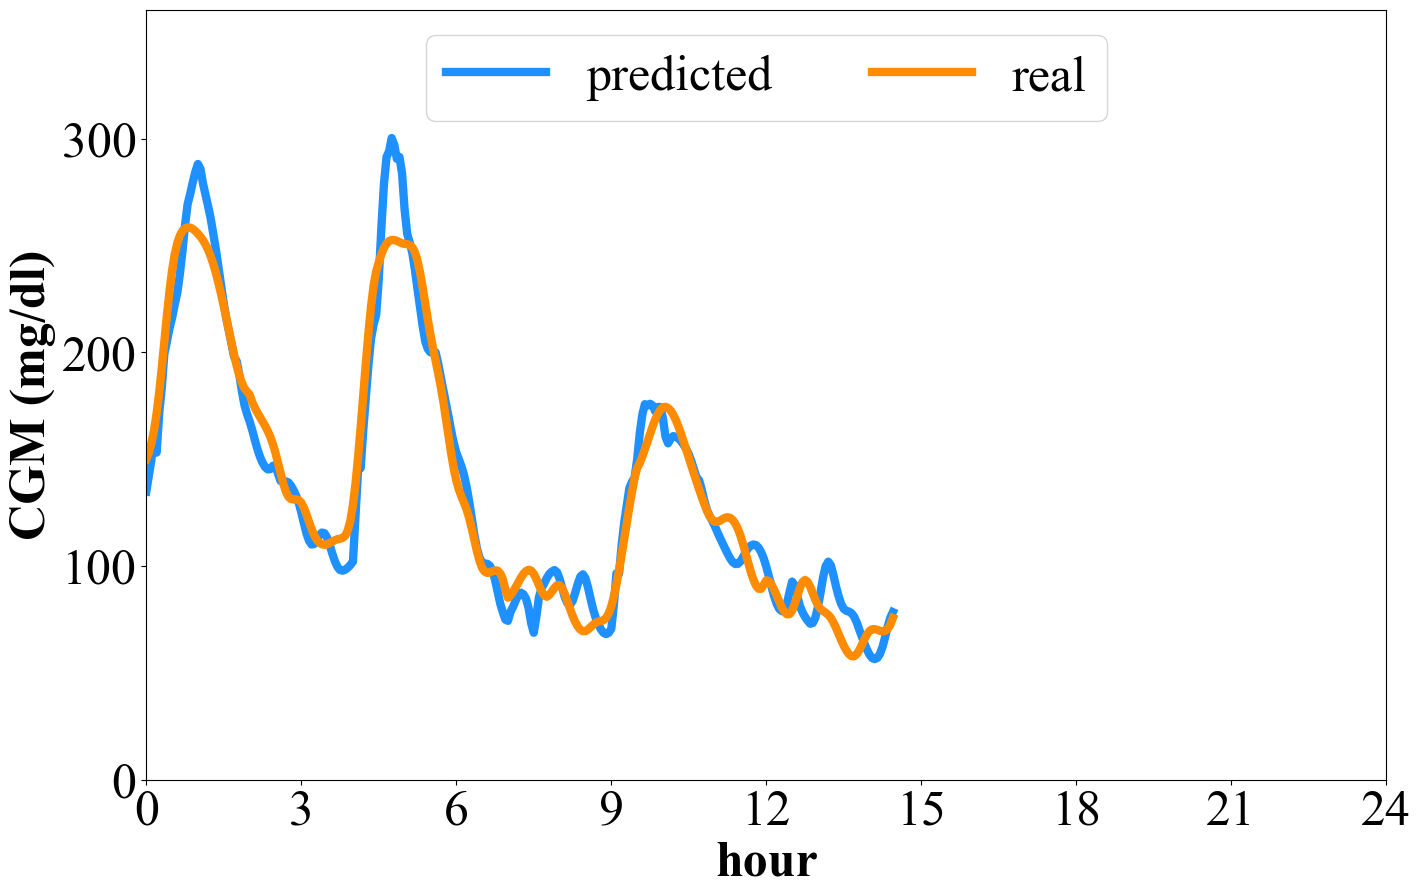

C:\Users\xinyi.yang\Desktop\group meeting\adult#005.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 18ms/step
RMSE value of the global model: 16.1929
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 313.4131 - mse: 313.4131
Epoch 1: val_loss improved from inf to 488.39429, saving model to Results/5_days_data_FDL/models\FDL_5_adult#005.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 62ms/step - loss: 313.4131 - mse: 313.4131 - val_loss: 488.3943 - val_mse: 488.3943
Epoch 2/10
39/40 [============================>.] - ETA: 0s - loss: 277.4580 - mse: 277.4580
Epoch 2: val_loss improved from 488.39429 to 380.45853, saving model to Results/5_days_data_FDL/models\FDL_5_adult#005.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 2s 53ms/step - loss: 277.1653 - mse: 277.1653 - val_loss: 380.4585 - val_mse: 380.4585
Epoch 3/10
39/40 [======

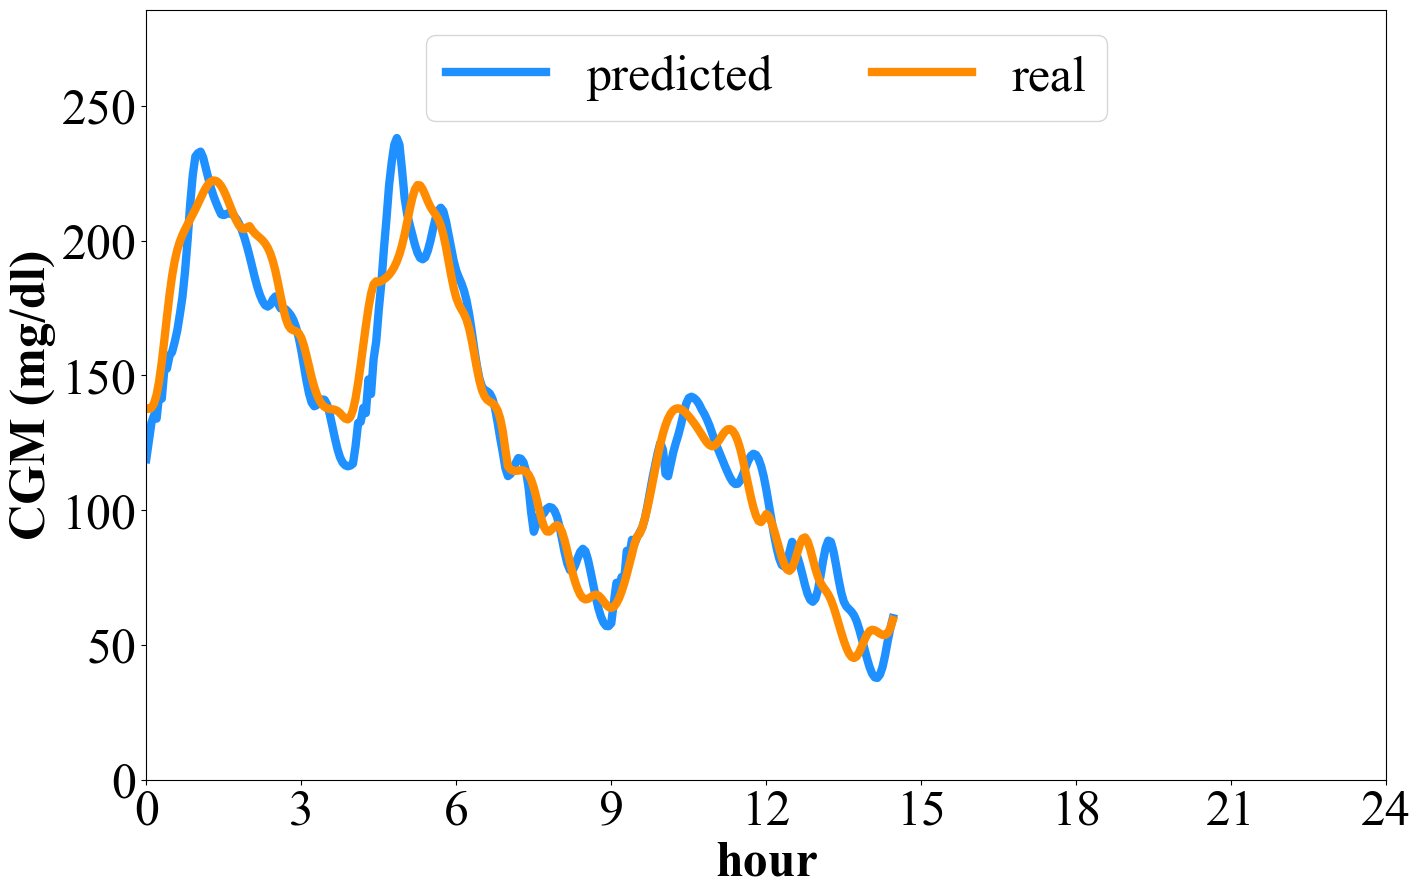

C:\Users\xinyi.yang\Desktop\group meeting\adult#006.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 18ms/step
RMSE value of the global model: 15.5301
Epoch 1/10
39/40 [============================>.] - ETA: 0s - loss: 312.8433 - mse: 312.8433
Epoch 1: val_loss improved from inf to 393.71909, saving model to Results/5_days_data_FDL/models\FDL_5_adult#006.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 57ms/step - loss: 312.4018 - mse: 312.4018 - val_loss: 393.7191 - val_mse: 393.7191
Epoch 2/10
39/40 [============================>.] - ETA: 0s - loss: 247.6763 - mse: 247.6763
Epoch 2: val_loss did not improve from 393.71909
40/40 [==============================] - 2s 49ms/step - loss: 247.4937 - mse: 247.4937 - val_loss: 448.6706 - val_mse: 448.6706
Epoch 3/10
39/40 [============================>.] - ETA: 0s - loss: 235.7838 - mse: 235.7838
Epoch 3: val_loss improved from 393.71909 to 291.79932, 

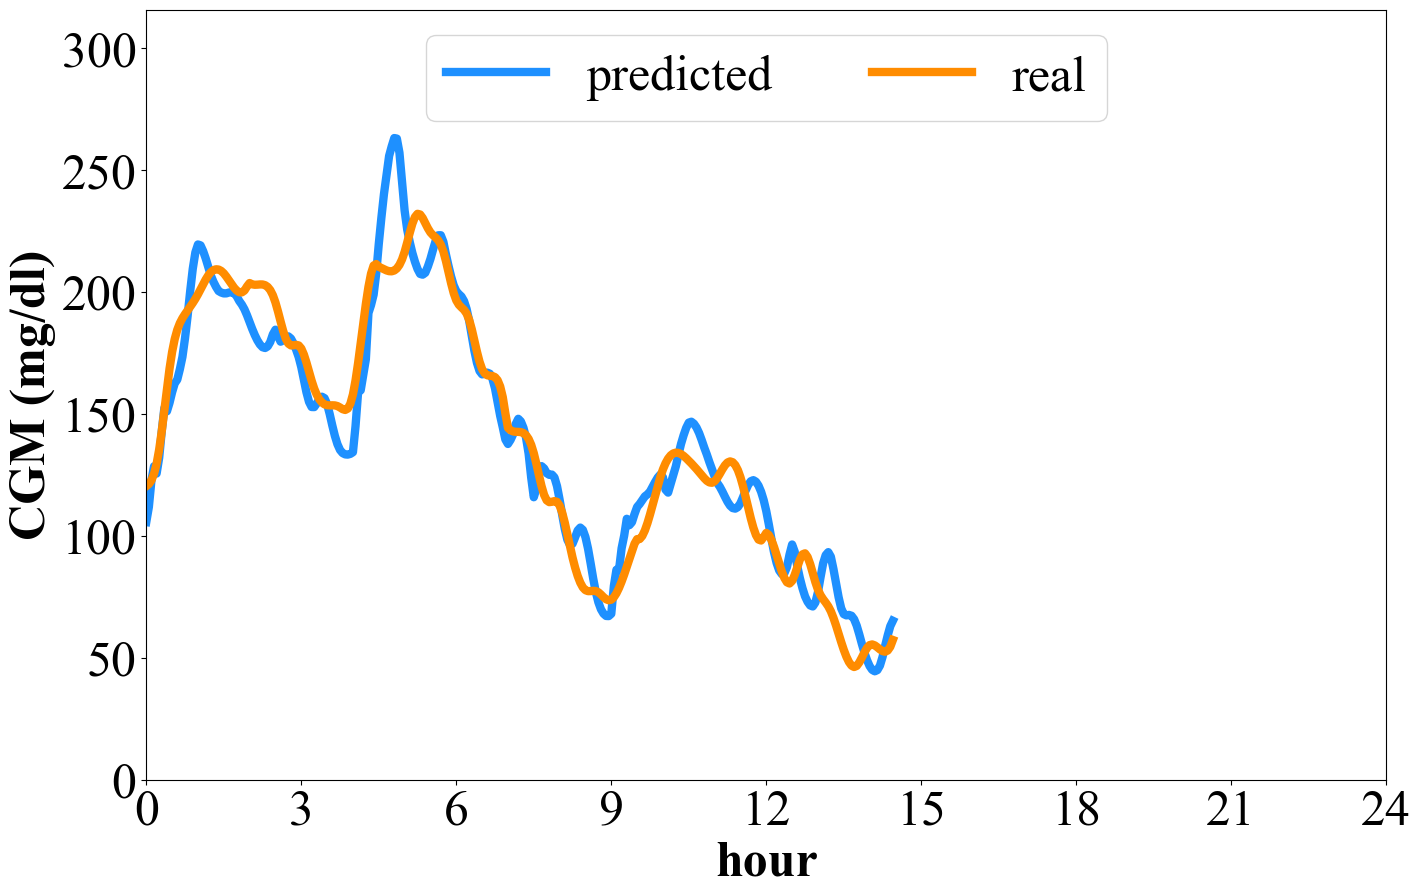

C:\Users\xinyi.yang\Desktop\group meeting\adult#007.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 21ms/step
RMSE value of the global model: 15.0469
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 282.9391 - mse: 282.9391
Epoch 1: val_loss improved from inf to 600.21893, saving model to Results/5_days_data_FDL/models\FDL_5_adult#007.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 85ms/step - loss: 282.9391 - mse: 282.9391 - val_loss: 600.2189 - val_mse: 600.2189
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 258.7469 - mse: 258.7469
Epoch 2: val_loss improved from 600.21893 to 327.97092, saving model to Results/5_days_data_FDL/models\FDL_5_adult#007.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 80ms/step - loss: 258.7469 - mse: 258.7469 - val_loss: 327.9709 - val_mse: 327.9709
Epoch 3/10
40/40 [======

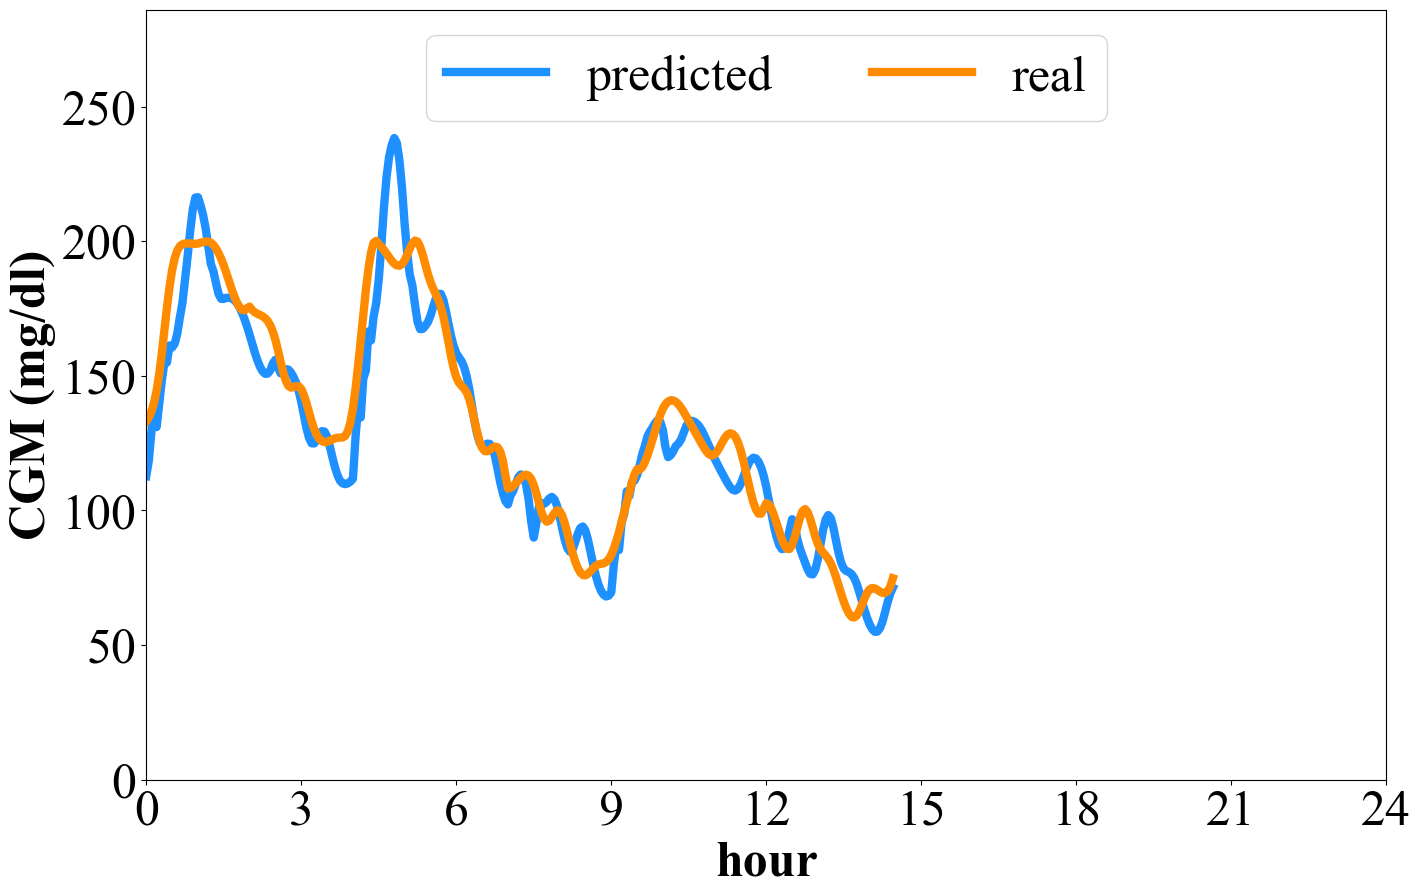

C:\Users\xinyi.yang\Desktop\group meeting\adult#008.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 22ms/step
RMSE value of the global model: 15.7131
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 280.1466 - mse: 280.1466
Epoch 1: val_loss improved from inf to 493.13443, saving model to Results/5_days_data_FDL/models\FDL_5_adult#008.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 78ms/step - loss: 280.1466 - mse: 280.1466 - val_loss: 493.1344 - val_mse: 493.1344
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 243.5821 - mse: 243.5821
Epoch 2: val_loss improved from 493.13443 to 353.00476, saving model to Results/5_days_data_FDL/models\FDL_5_adult#008.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 70ms/step - loss: 243.5821 - mse: 243.5821 - val_loss: 353.0048 - val_mse: 353.0048
Epoch 3/10
40/40 [======

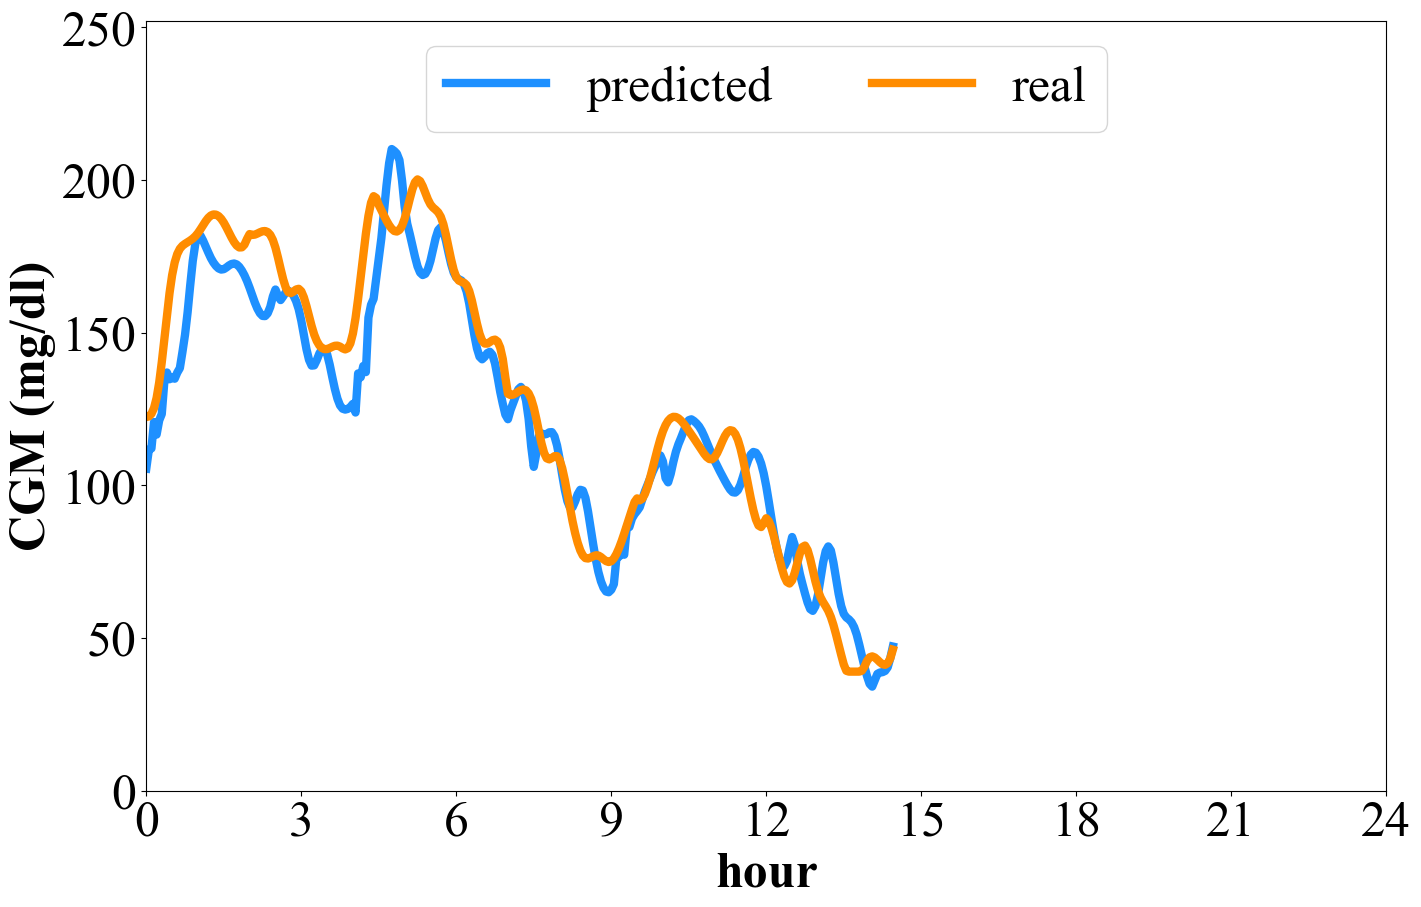

C:\Users\xinyi.yang\Desktop\group meeting\adult#009.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 21ms/step
RMSE value of the global model: 16.8920
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 321.3604 - mse: 321.3604
Epoch 1: val_loss improved from inf to 409.60190, saving model to Results/5_days_data_FDL/models\FDL_5_adult#009.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 78ms/step - loss: 321.3604 - mse: 321.3604 - val_loss: 409.6019 - val_mse: 409.6019
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 247.1123 - mse: 247.1123
Epoch 2: val_loss improved from 409.60190 to 345.76590, saving model to Results/5_days_data_FDL/models\FDL_5_adult#009.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 70ms/step - loss: 247.1123 - mse: 247.1123 - val_loss: 345.7659 - val_mse: 345.7659
Epoch 3/10
40/40 [======

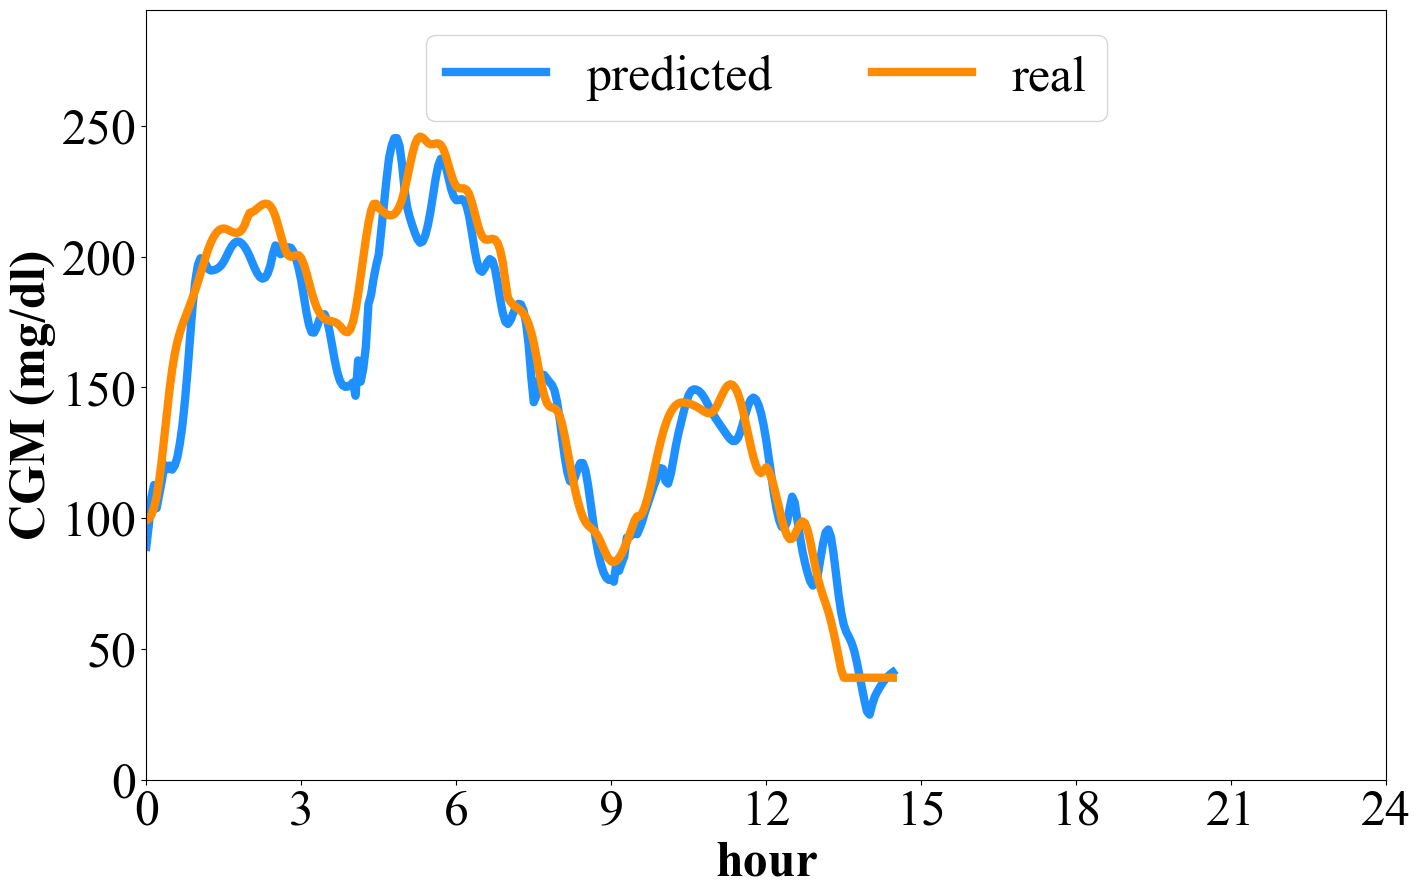

C:\Users\xinyi.yang\Desktop\group meeting\adult#010.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 21ms/step
RMSE value of the global model: 16.5939
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 494.3737 - mse: 494.3737
Epoch 1: val_loss improved from inf to 562.70953, saving model to Results/5_days_data_FDL/models\FDL_5_adult#010.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 75ms/step - loss: 494.3737 - mse: 494.3737 - val_loss: 562.7095 - val_mse: 562.7095
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 329.9001 - mse: 329.9001
Epoch 2: val_loss improved from 562.70953 to 414.41528, saving model to Results/5_days_data_FDL/models\FDL_5_adult#010.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 65ms/step - loss: 329.9001 - mse: 329.9001 - val_loss: 414.4153 - val_mse: 414.4153
Epoch 3/10
40/40 [======

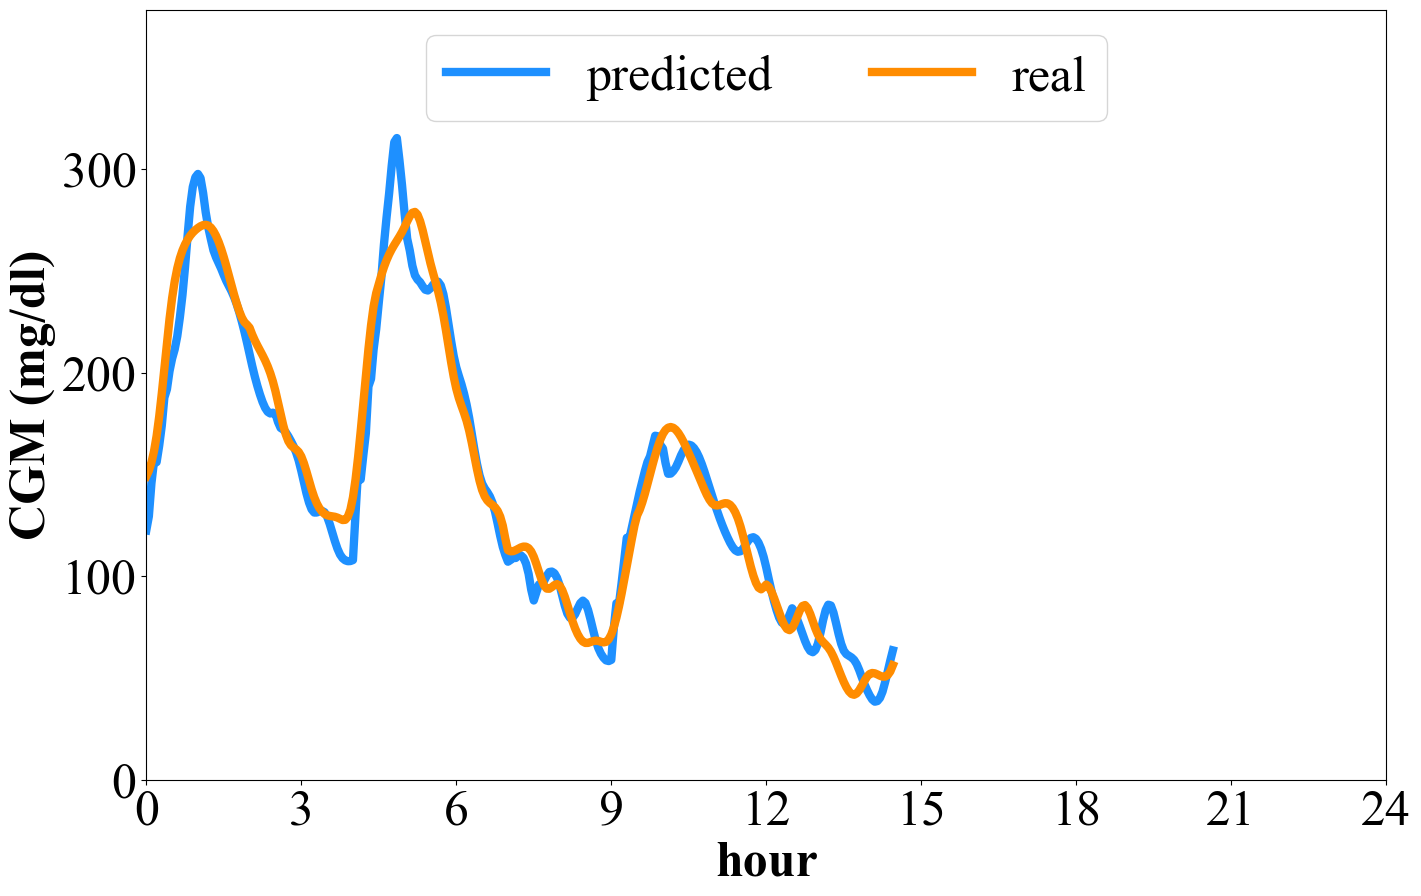

C:\Users\xinyi.yang\Desktop\group meeting\child#002.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 17ms/step
RMSE value of the global model: 19.7871
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 294.2737 - mse: 294.2737
Epoch 1: val_loss improved from inf to 533.12842, saving model to Results/5_days_data_FDL/models\FDL_5_child#002.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 81ms/step - loss: 294.2737 - mse: 294.2737 - val_loss: 533.1284 - val_mse: 533.1284
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 272.5106 - mse: 272.5106
Epoch 2: val_loss improved from 533.12842 to 351.34204, saving model to Results/5_days_data_FDL/models\FDL_5_child#002.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 74ms/step - loss: 272.5106 - mse: 272.5106 - val_loss: 351.3420 - val_mse: 351.3420
Epoch 3/10
40/40 [======

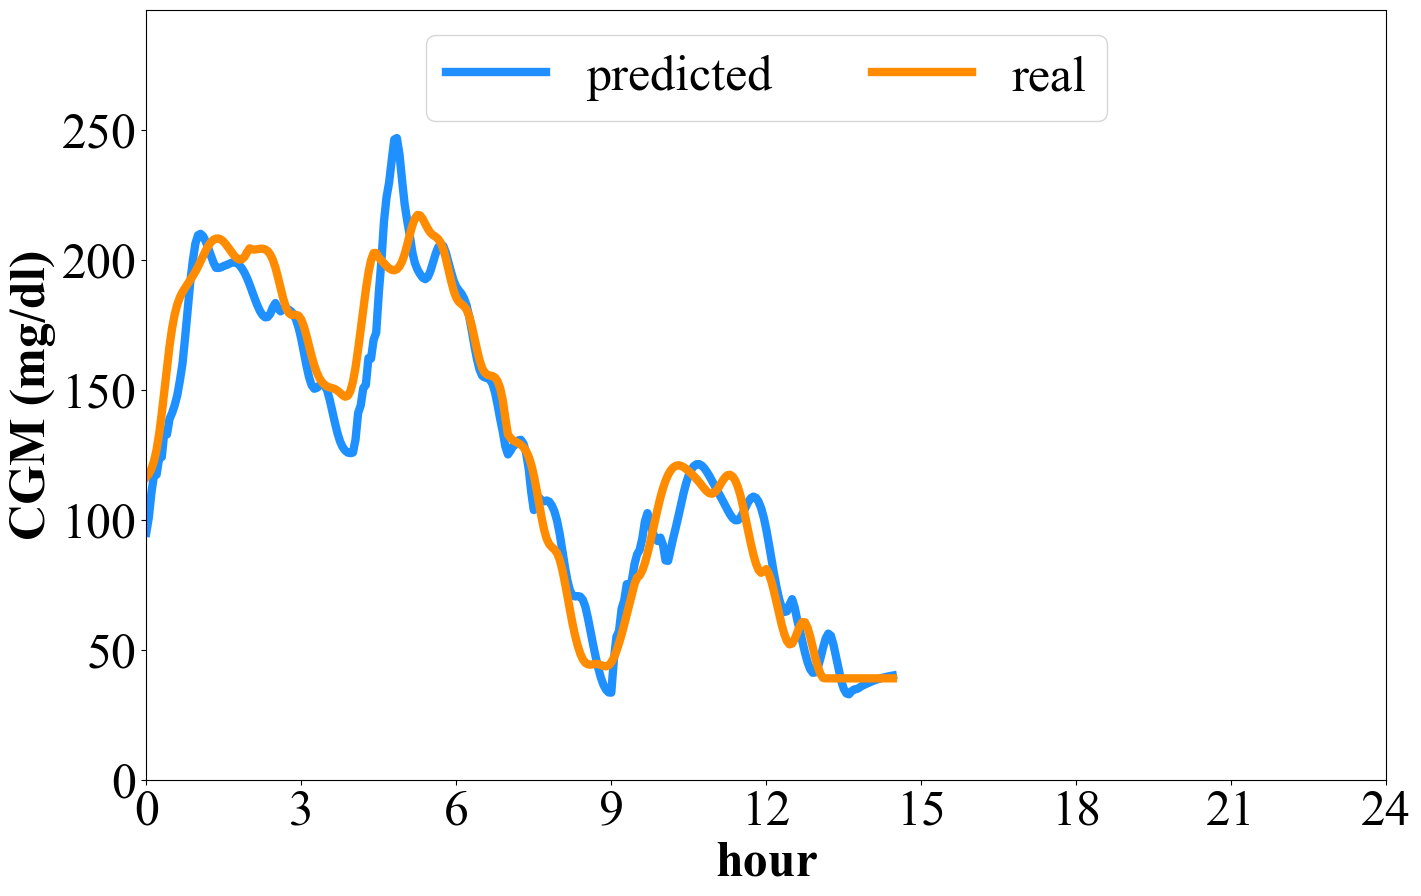

C:\Users\xinyi.yang\Desktop\group meeting\child#003.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 23ms/step
RMSE value of the global model: 26.2981
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 654.1361 - mse: 654.1361
Epoch 1: val_loss improved from inf to 749.42303, saving model to Results/5_days_data_FDL/models\FDL_5_child#003.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 82ms/step - loss: 654.1361 - mse: 654.1361 - val_loss: 749.4230 - val_mse: 749.4230
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 227.9404 - mse: 227.9404
Epoch 2: val_loss improved from 749.42303 to 398.47134, saving model to Results/5_days_data_FDL/models\FDL_5_child#003.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 75ms/step - loss: 227.9404 - mse: 227.9404 - val_loss: 398.4713 - val_mse: 398.4713
Epoch 3/10
40/40 [======

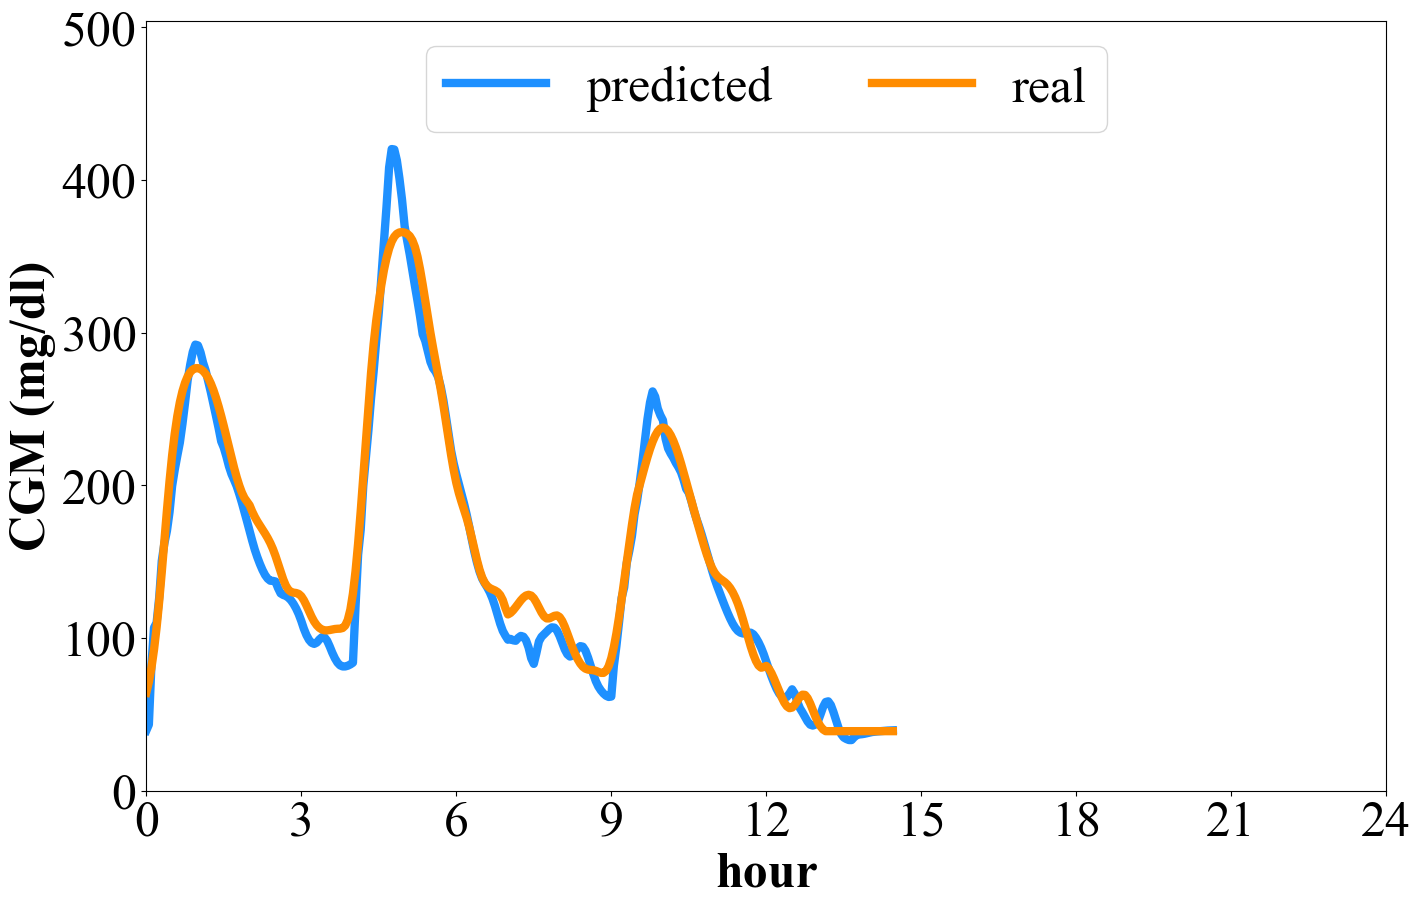

C:\Users\xinyi.yang\Desktop\group meeting\child#004.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 22ms/step
RMSE value of the global model: 27.7405
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 254.3244 - mse: 254.3244
Epoch 1: val_loss improved from inf to 190.75970, saving model to Results/5_days_data_FDL/models\FDL_5_child#004.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 84ms/step - loss: 254.3244 - mse: 254.3244 - val_loss: 190.7597 - val_mse: 190.7597
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 193.1064 - mse: 193.1064
Epoch 2: val_loss improved from 190.75970 to 118.03111, saving model to Results/5_days_data_FDL/models\FDL_5_child#004.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 77ms/step - loss: 193.1064 - mse: 193.1064 - val_loss: 118.0311 - val_mse: 118.0311
Epoch 3/10
40/40 [======

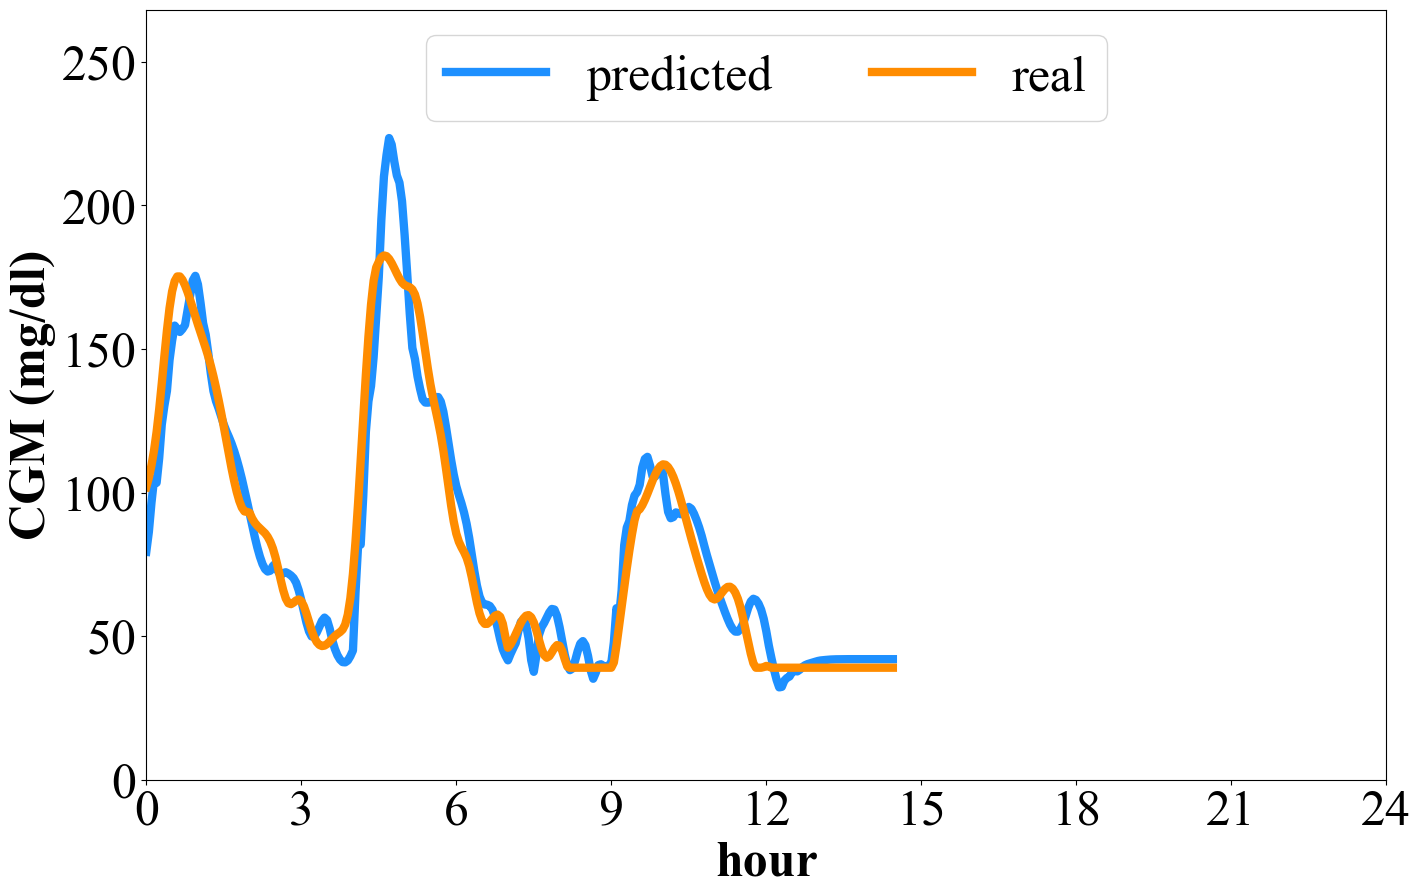

C:\Users\xinyi.yang\Desktop\group meeting\child#005.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 23ms/step
RMSE value of the global model: 21.0022
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 220.3295 - mse: 220.3295
Epoch 1: val_loss improved from inf to 250.92796, saving model to Results/5_days_data_FDL/models\FDL_5_child#005.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 83ms/step - loss: 220.3295 - mse: 220.3295 - val_loss: 250.9280 - val_mse: 250.9280
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 173.0356 - mse: 173.0356
Epoch 2: val_loss improved from 250.92796 to 230.98100, saving model to Results/5_days_data_FDL/models\FDL_5_child#005.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 76ms/step - loss: 173.0356 - mse: 173.0356 - val_loss: 230.9810 - val_mse: 230.9810
Epoch 3/10
40/40 [======

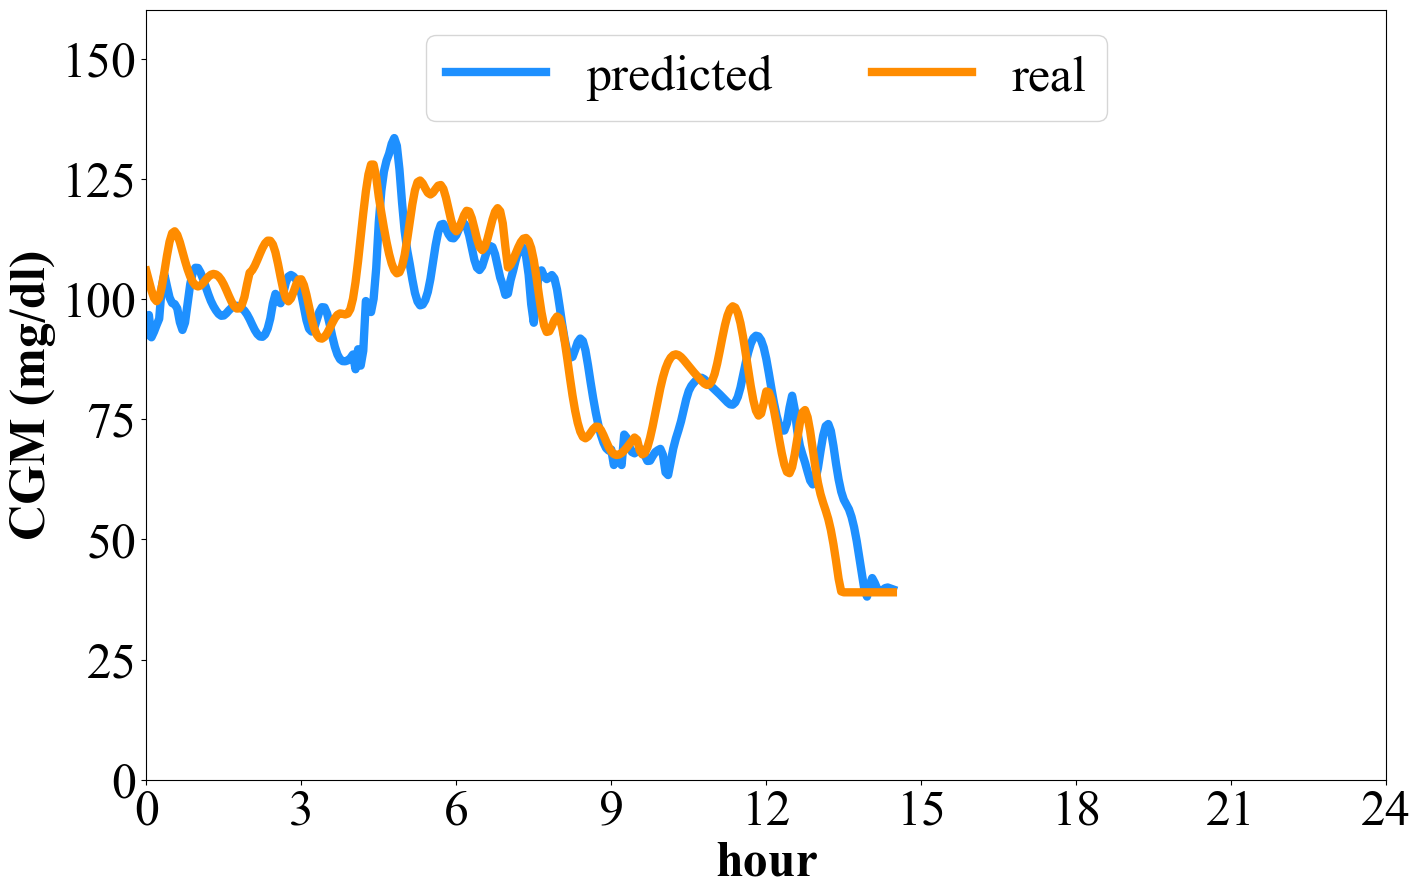

C:\Users\xinyi.yang\Desktop\group meeting\child#006.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 22ms/step
RMSE value of the global model: 25.0983
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 436.6670 - mse: 436.6670
Epoch 1: val_loss improved from inf to 446.09726, saving model to Results/5_days_data_FDL/models\FDL_5_child#006.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 73ms/step - loss: 436.6670 - mse: 436.6670 - val_loss: 446.0973 - val_mse: 446.0973
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 313.3968 - mse: 313.3968
Epoch 2: val_loss improved from 446.09726 to 319.48300, saving model to Results/5_days_data_FDL/models\FDL_5_child#006.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 2s 62ms/step - loss: 313.3968 - mse: 313.3968 - val_loss: 319.4830 - val_mse: 319.4830
Epoch 3/10
40/40 [======

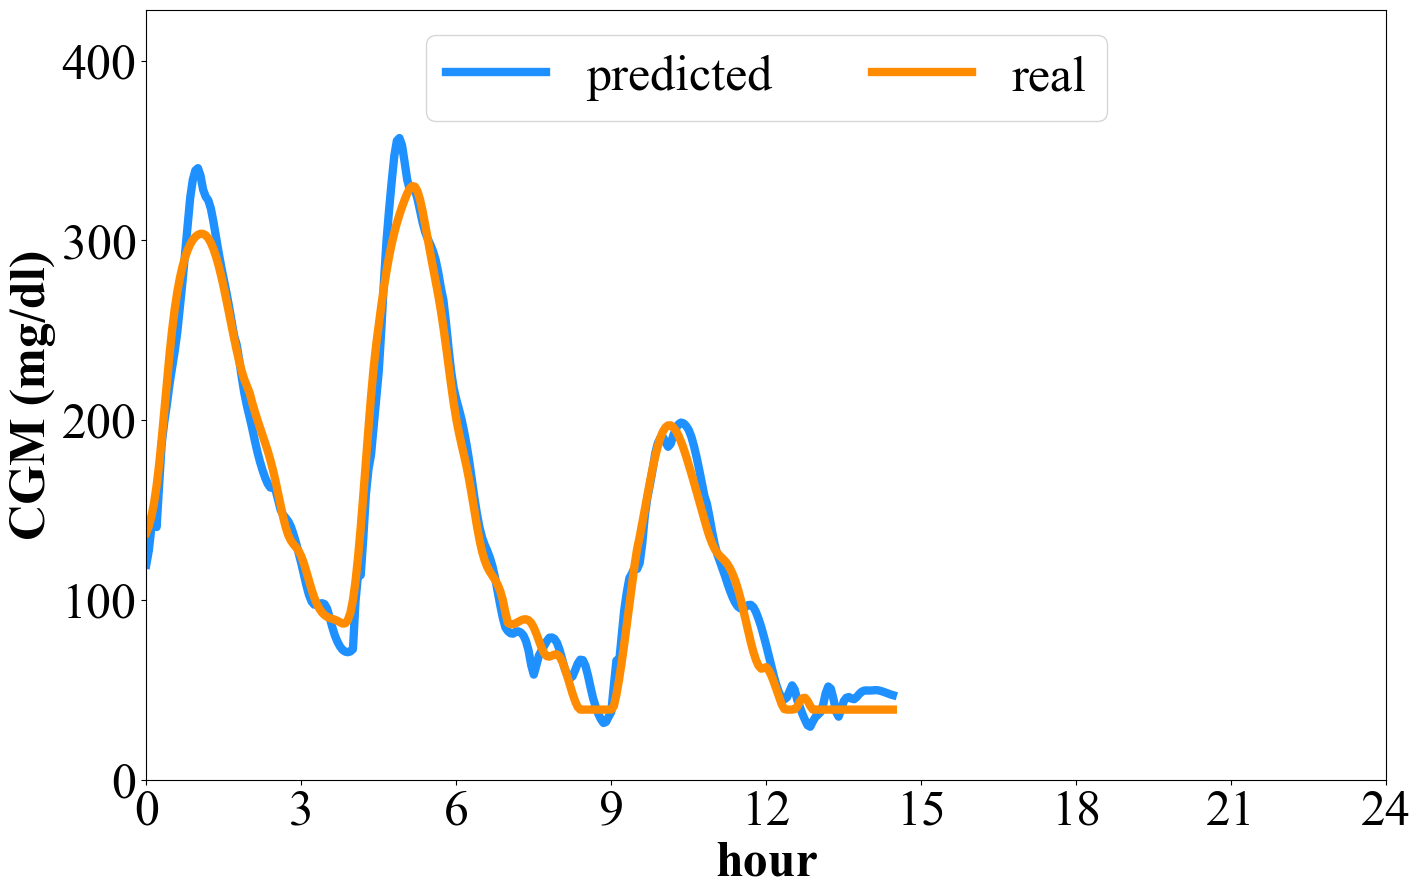

C:\Users\xinyi.yang\Desktop\group meeting\child#007.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 20ms/step
RMSE value of the global model: 28.0116
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 345.8292 - mse: 345.8292
Epoch 1: val_loss improved from inf to 159.49809, saving model to Results/5_days_data_FDL/models\FDL_5_child#007.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 88ms/step - loss: 345.8292 - mse: 345.8292 - val_loss: 159.4981 - val_mse: 159.4981
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 249.4290 - mse: 249.4290
Epoch 2: val_loss did not improve from 159.49809
40/40 [==============================] - 3s 74ms/step - loss: 249.4290 - mse: 249.4290 - val_loss: 171.3775 - val_mse: 171.3775
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 223.0488 - mse: 223.0488
Epoch 3: val_loss did not improve from 159.49809
40/40 [

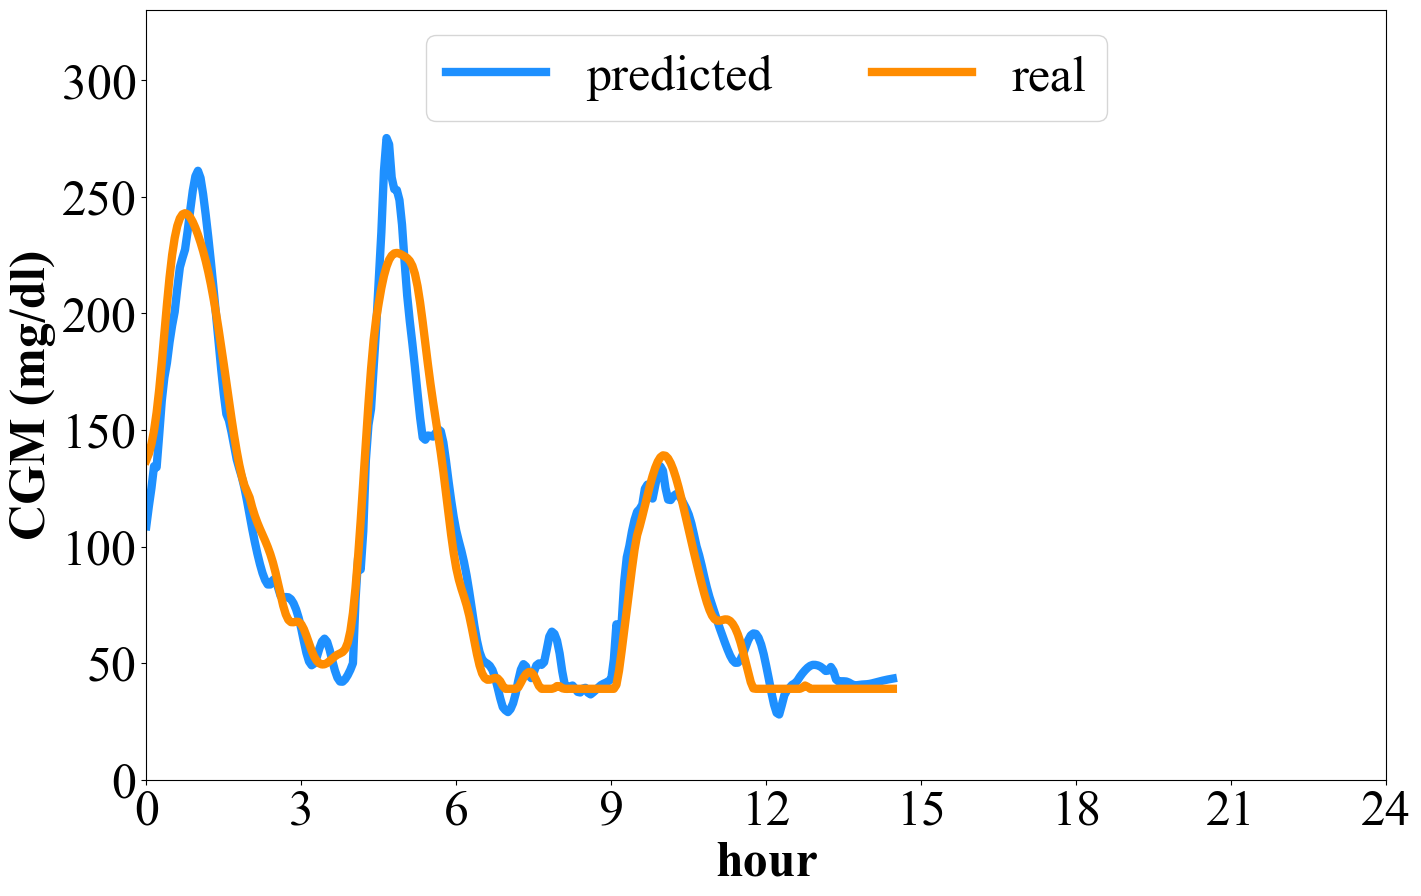

C:\Users\xinyi.yang\Desktop\group meeting\child#008.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 23ms/step
RMSE value of the global model: 60.7870
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 2463.1904 - mse: 2463.1904
Epoch 1: val_loss improved from inf to 1299.24902, saving model to Results/5_days_data_FDL/models\FDL_5_child#008.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 81ms/step - loss: 2463.1904 - mse: 2463.1904 - val_loss: 1299.2490 - val_mse: 1299.2490
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 932.7219 - mse: 932.7219
Epoch 2: val_loss did not improve from 1299.24902
40/40 [==============================] - 3s 75ms/step - loss: 932.7219 - mse: 932.7219 - val_loss: 1393.4061 - val_mse: 1393.4061
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 775.6391 - mse: 775.6391
Epoch 3: val_loss improved from 1299.24902 to 

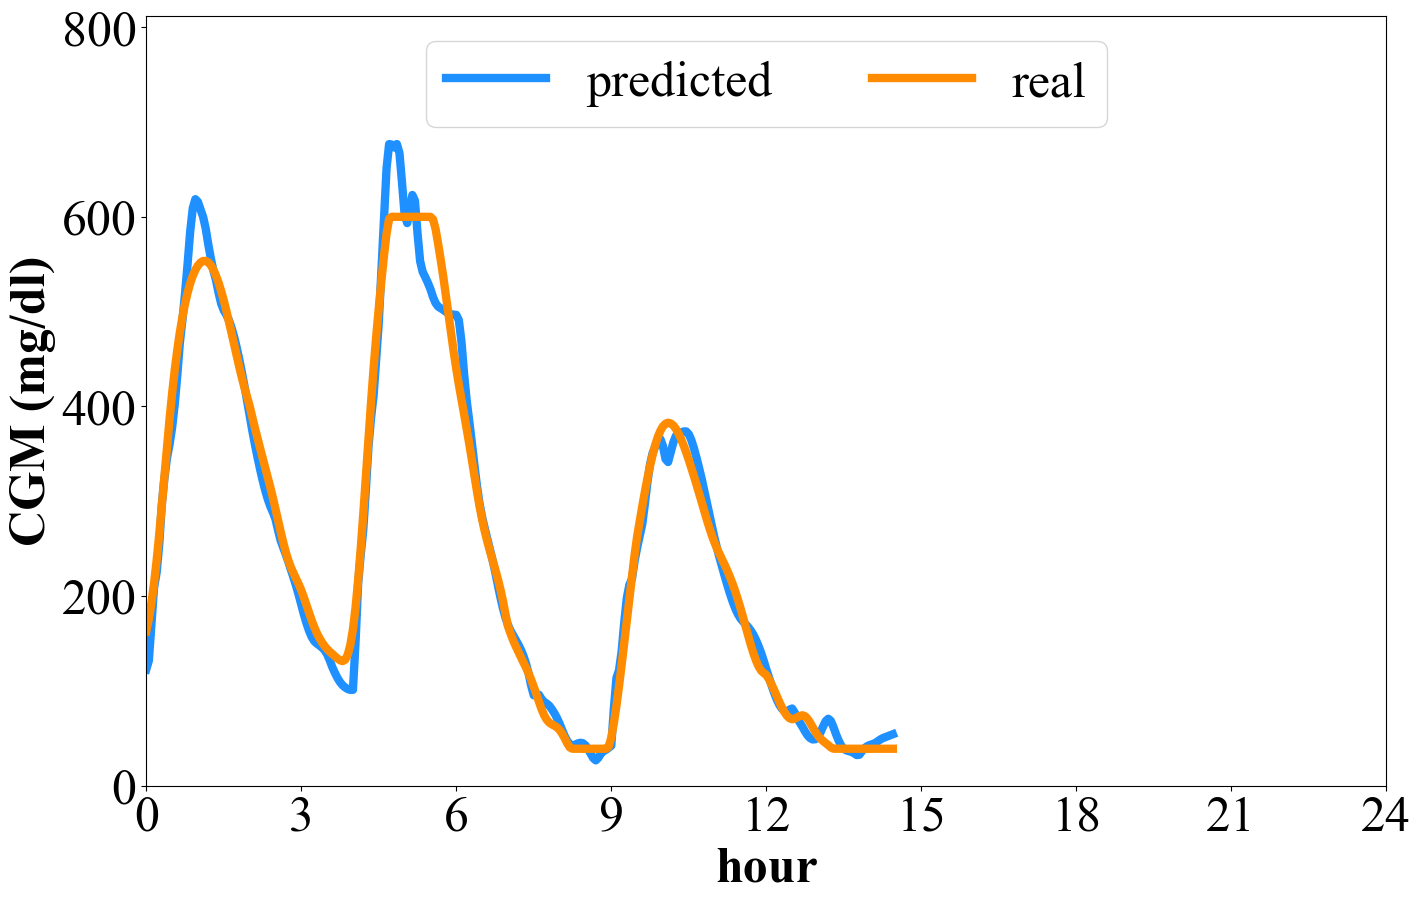

C:\Users\xinyi.yang\Desktop\group meeting\child#009.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 24ms/step
RMSE value of the global model: 33.5720
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 480.9644 - mse: 480.9644
Epoch 1: val_loss improved from inf to 415.35977, saving model to Results/5_days_data_FDL/models\FDL_5_child#009.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 84ms/step - loss: 480.9644 - mse: 480.9644 - val_loss: 415.3598 - val_mse: 415.3598
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 372.0879 - mse: 372.0879
Epoch 2: val_loss did not improve from 415.35977
40/40 [==============================] - 3s 75ms/step - loss: 372.0879 - mse: 372.0879 - val_loss: 1082.6625 - val_mse: 1082.6625
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 1061.8502 - mse: 1061.8502
Epoch 3: val_loss did not improve from 415.35977
40/

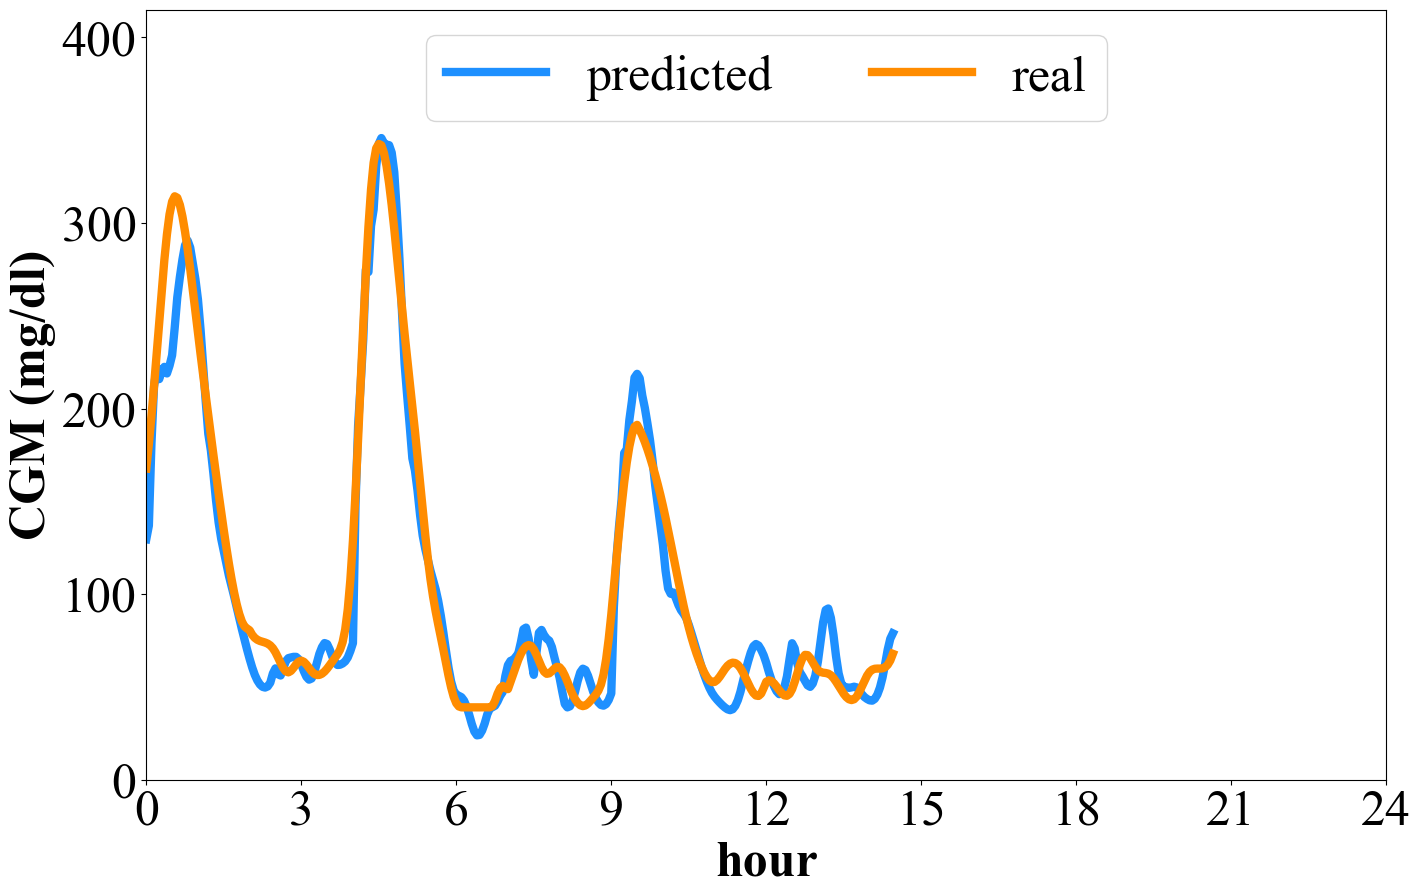

C:\Users\xinyi.yang\Desktop\group meeting\child#010.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 22ms/step
RMSE value of the global model: 28.3198
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 863.9862 - mse: 863.9862
Epoch 1: val_loss improved from inf to 717.52582, saving model to Results/5_days_data_FDL/models\FDL_5_child#010.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 77ms/step - loss: 863.9862 - mse: 863.9862 - val_loss: 717.5258 - val_mse: 717.5258
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 376.5197 - mse: 376.5197
Epoch 2: val_loss improved from 717.52582 to 383.61942, saving model to Results/5_days_data_FDL/models\FDL_5_child#010.csv_round_0_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 74ms/step - loss: 376.5197 - mse: 376.5197 - val_loss: 383.6194 - val_mse: 383.6194
Epoch 3/10
40/40 [======

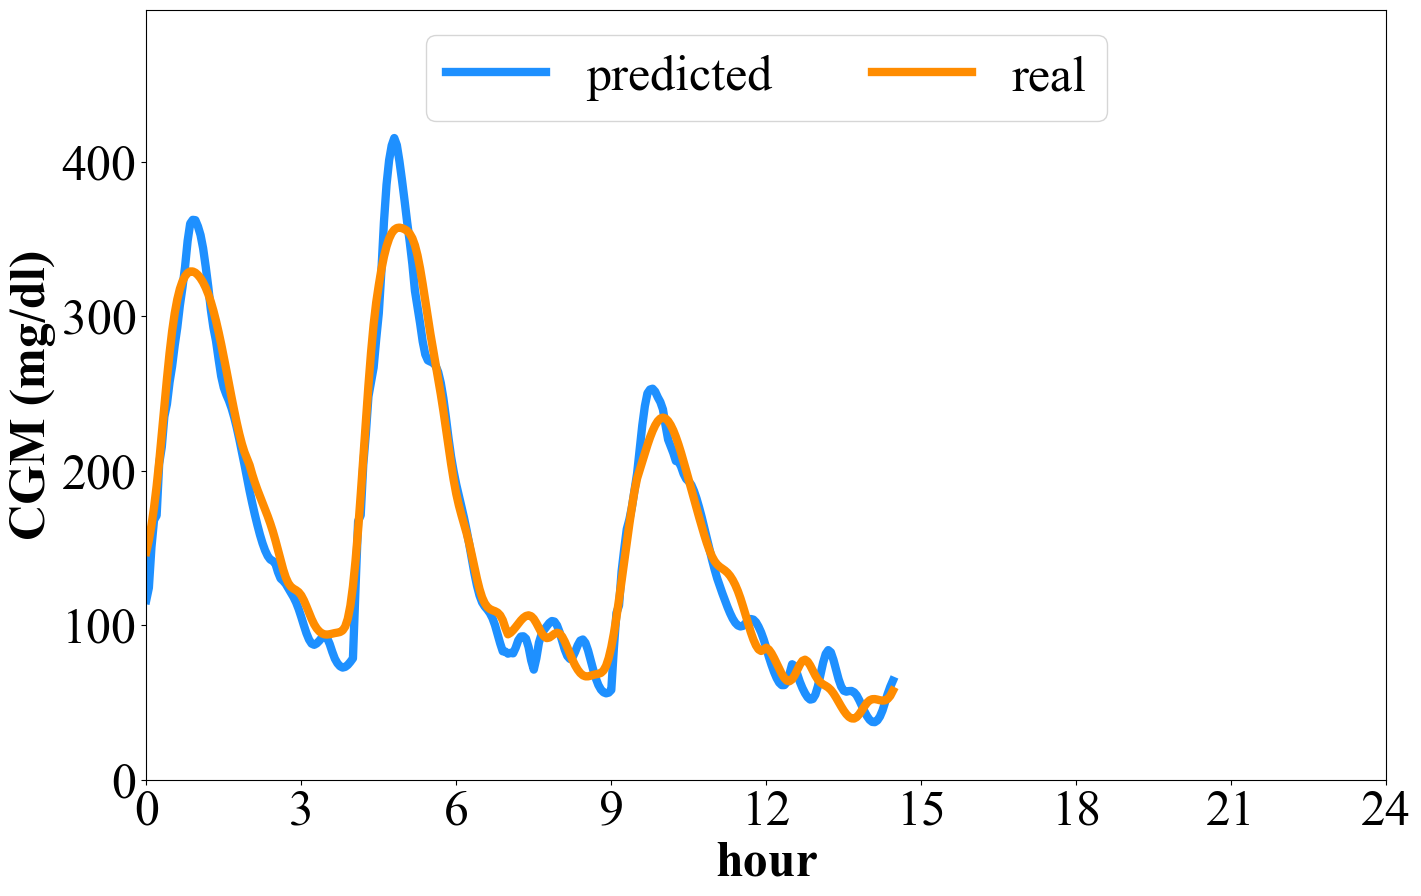

round: 1
C:\Users\xinyi.yang\Desktop\group meeting\adolescent#003.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 22ms/step
RMSE value of the global model: 17.1222
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 279.6259 - mse: 279.6259
Epoch 1: val_loss improved from inf to 309.02835, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#003.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 73ms/step - loss: 279.6259 - mse: 279.6259 - val_loss: 309.0284 - val_mse: 309.0284
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 207.5127 - mse: 207.5127
Epoch 2: val_loss did not improve from 309.02835
40/40 [==============================] - 3s 68ms/step - loss: 207.5127 - mse: 207.5127 - val_loss: 309.9790 - val_mse: 309.9790
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 507.7365 - mse: 507.7365
Epoch 3: val_loss did not improve fro

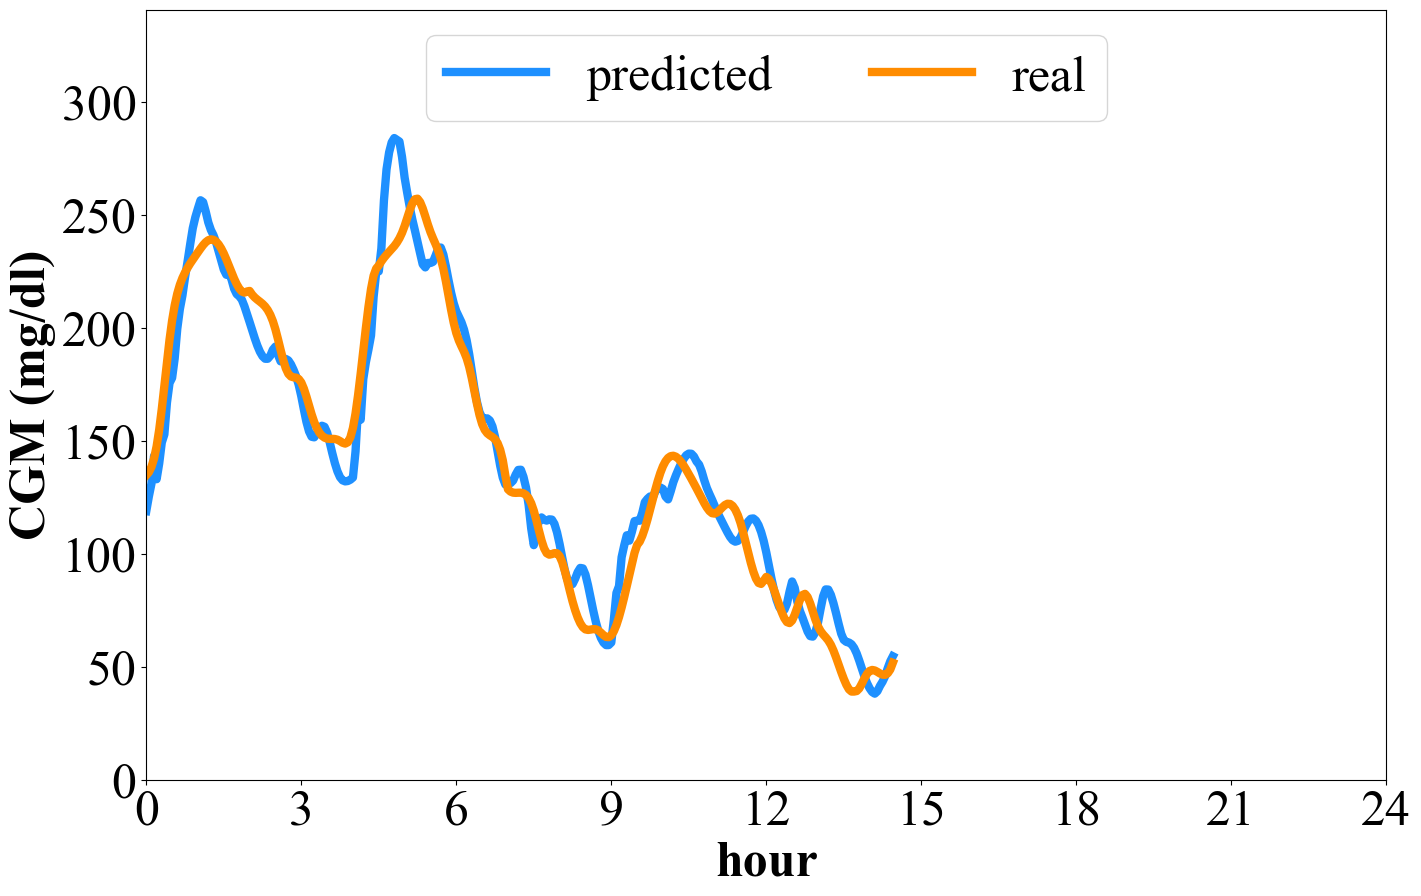

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#004.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 23ms/step
RMSE value of the global model: 19.0429
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 293.4593 - mse: 293.4593
Epoch 1: val_loss improved from inf to 281.84937, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#004.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 88ms/step - loss: 293.4593 - mse: 293.4593 - val_loss: 281.8494 - val_mse: 281.8494
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 208.9678 - mse: 208.9678
Epoch 2: val_loss improved from 281.84937 to 279.01242, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#004.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 83ms/step - loss: 208.9678 - mse: 208.9678 - val_loss: 279.0124 - val_mse: 279.0124
Epoch 3/1

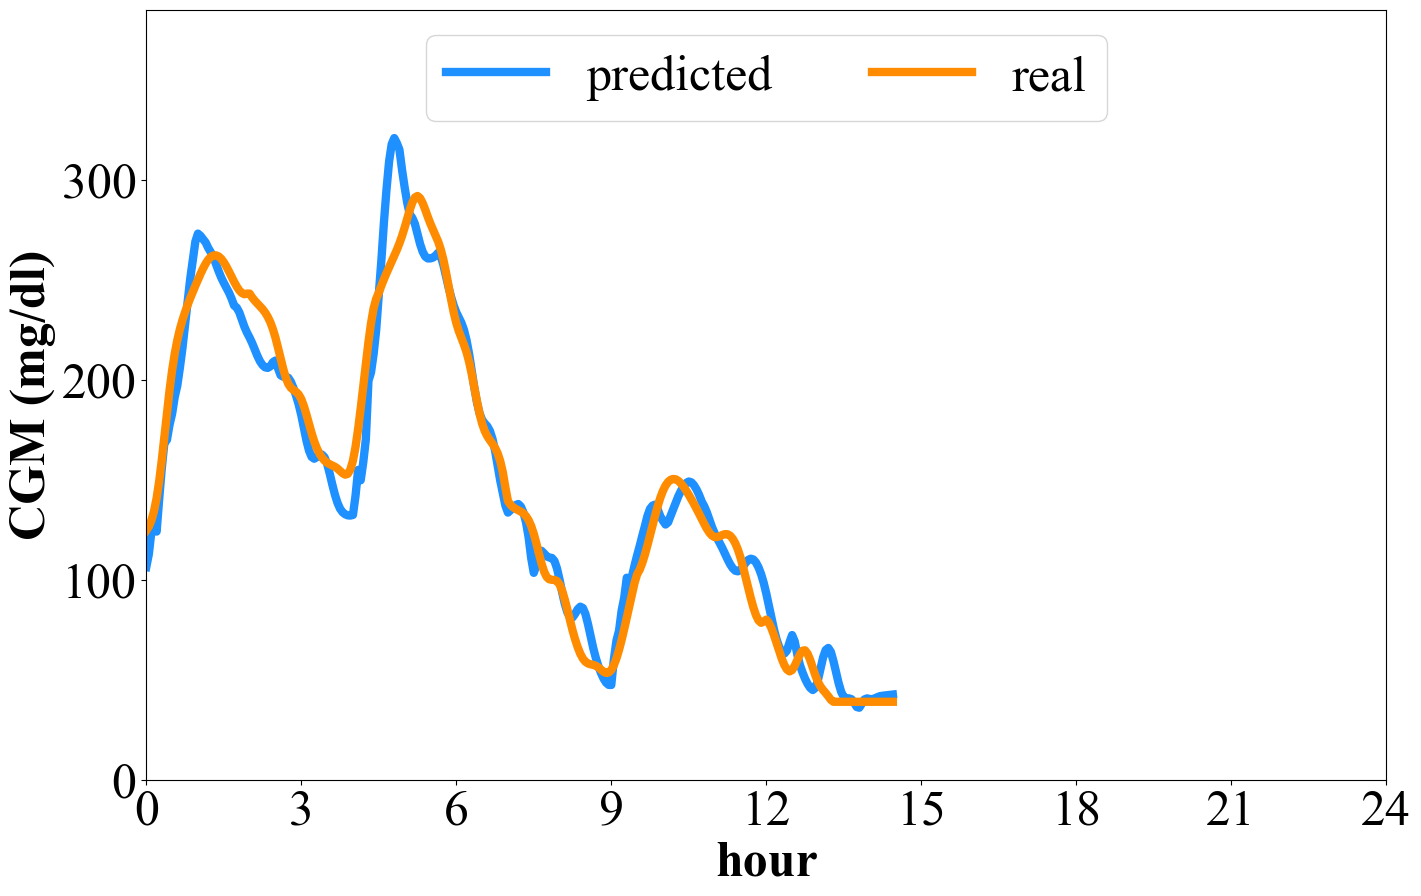

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#005.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 25ms/step
RMSE value of the global model: 18.7584
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 281.7696 - mse: 281.7696
Epoch 1: val_loss improved from inf to 468.49493, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#005.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 98ms/step - loss: 281.7696 - mse: 281.7696 - val_loss: 468.4949 - val_mse: 468.4949
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 228.7588 - mse: 228.7588
Epoch 2: val_loss improved from 468.49493 to 282.13489, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#005.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 84ms/step - loss: 228.7588 - mse: 228.7588 - val_loss: 282.1349 - val_mse: 282.1349
Epoch 3/1

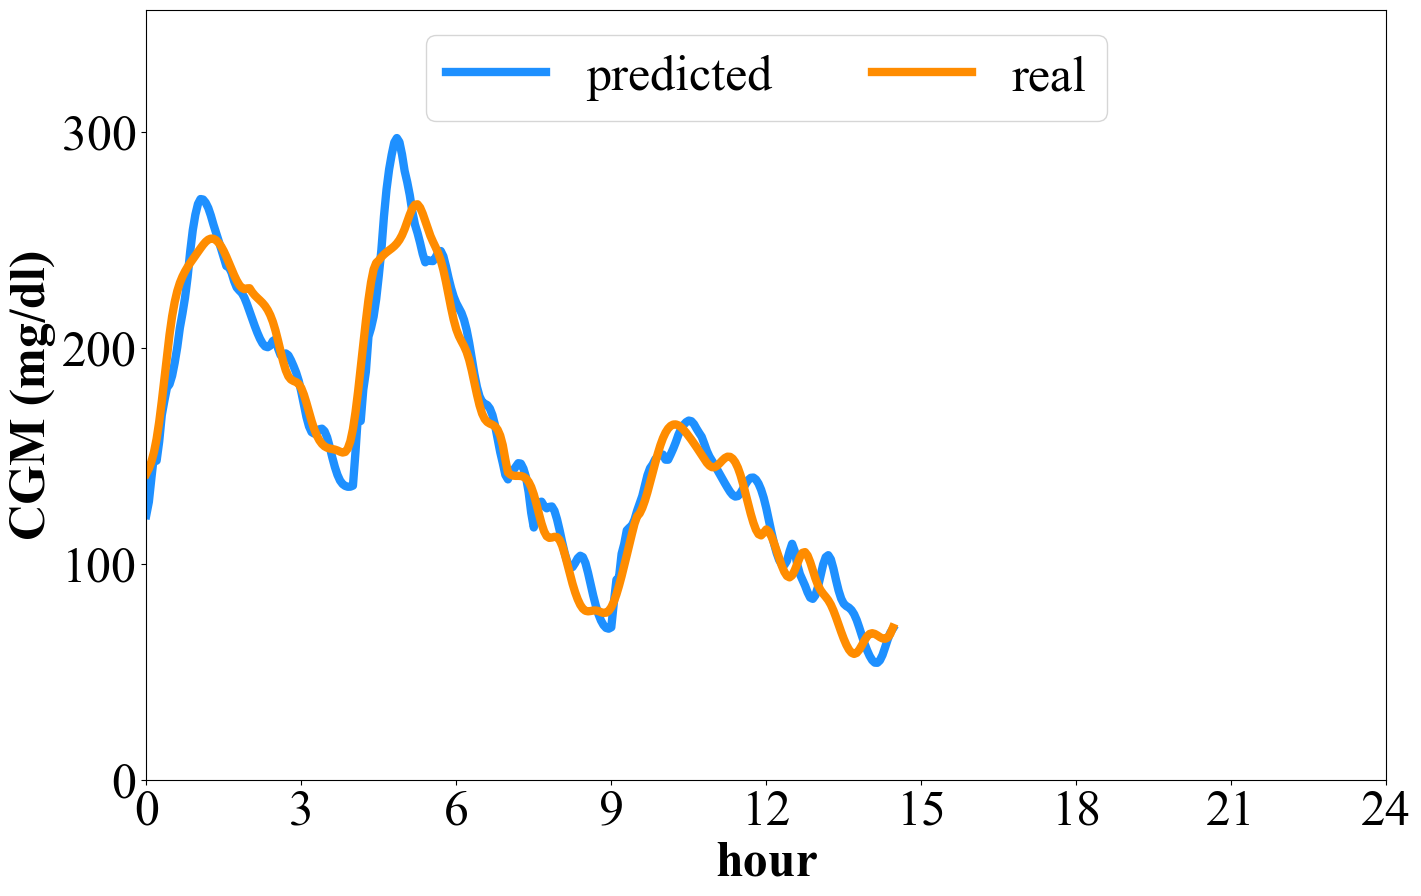

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#006.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 26ms/step
RMSE value of the global model: 16.7961
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 325.8506 - mse: 325.8506
Epoch 1: val_loss improved from inf to 293.98099, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#006.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 93ms/step - loss: 325.8506 - mse: 325.8506 - val_loss: 293.9810 - val_mse: 293.9810
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 260.6726 - mse: 260.6726
Epoch 2: val_loss improved from 293.98099 to 245.30595, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#006.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 87ms/step - loss: 260.6726 - mse: 260.6726 - val_loss: 245.3060 - val_mse: 245.3060
Epoch 3/1

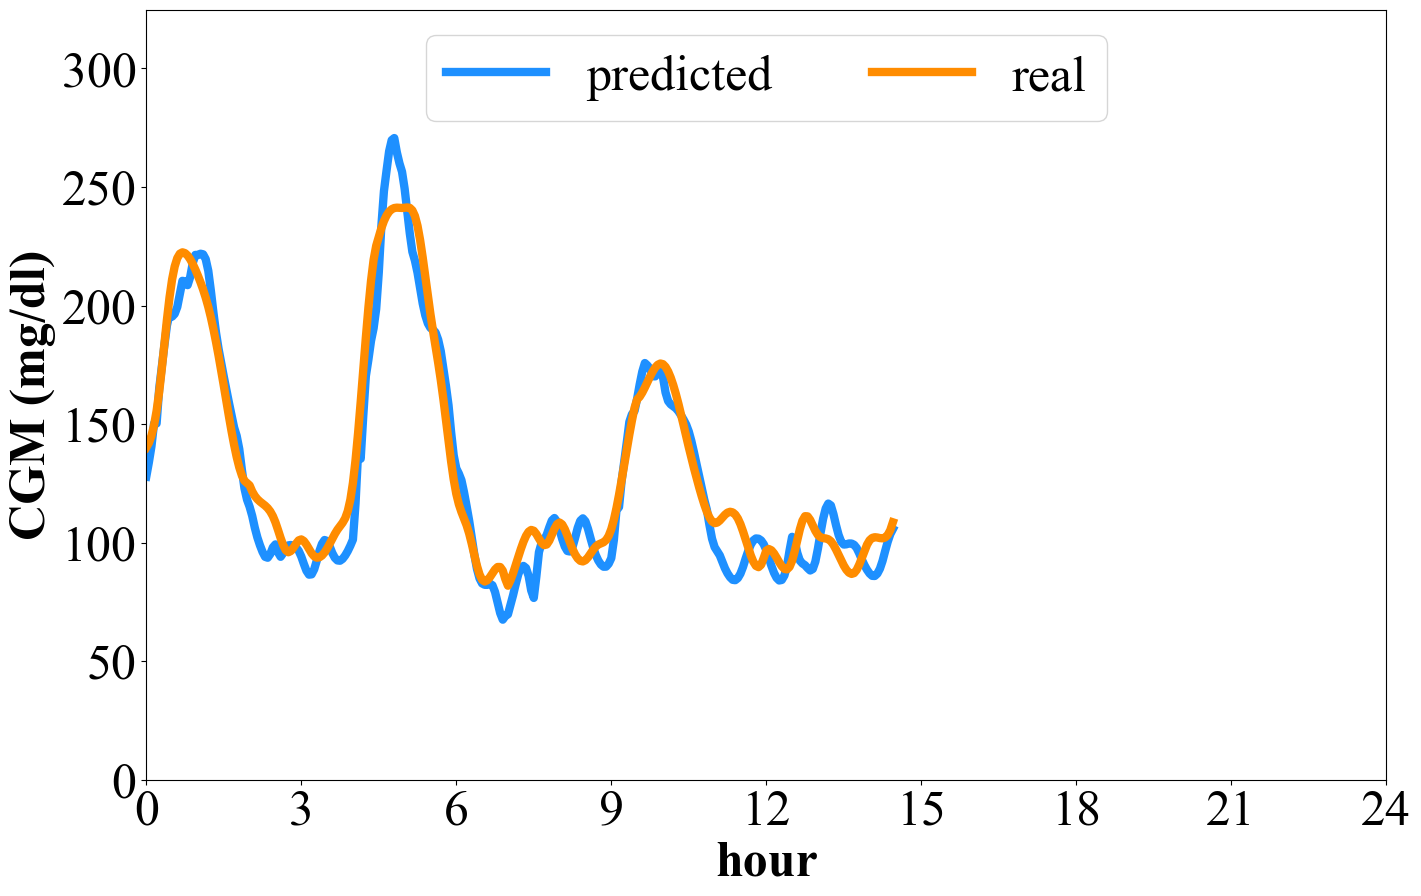

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#007.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 25ms/step
RMSE value of the global model: 32.3067
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 364.2460 - mse: 364.2460
Epoch 1: val_loss improved from inf to 469.69354, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#007.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 91ms/step - loss: 364.2460 - mse: 364.2460 - val_loss: 469.6935 - val_mse: 469.6935
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 253.6980 - mse: 253.6980
Epoch 2: val_loss improved from 469.69354 to 386.93460, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#007.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 89ms/step - loss: 253.6980 - mse: 253.6980 - val_loss: 386.9346 - val_mse: 386.9346
Epoch 3/1

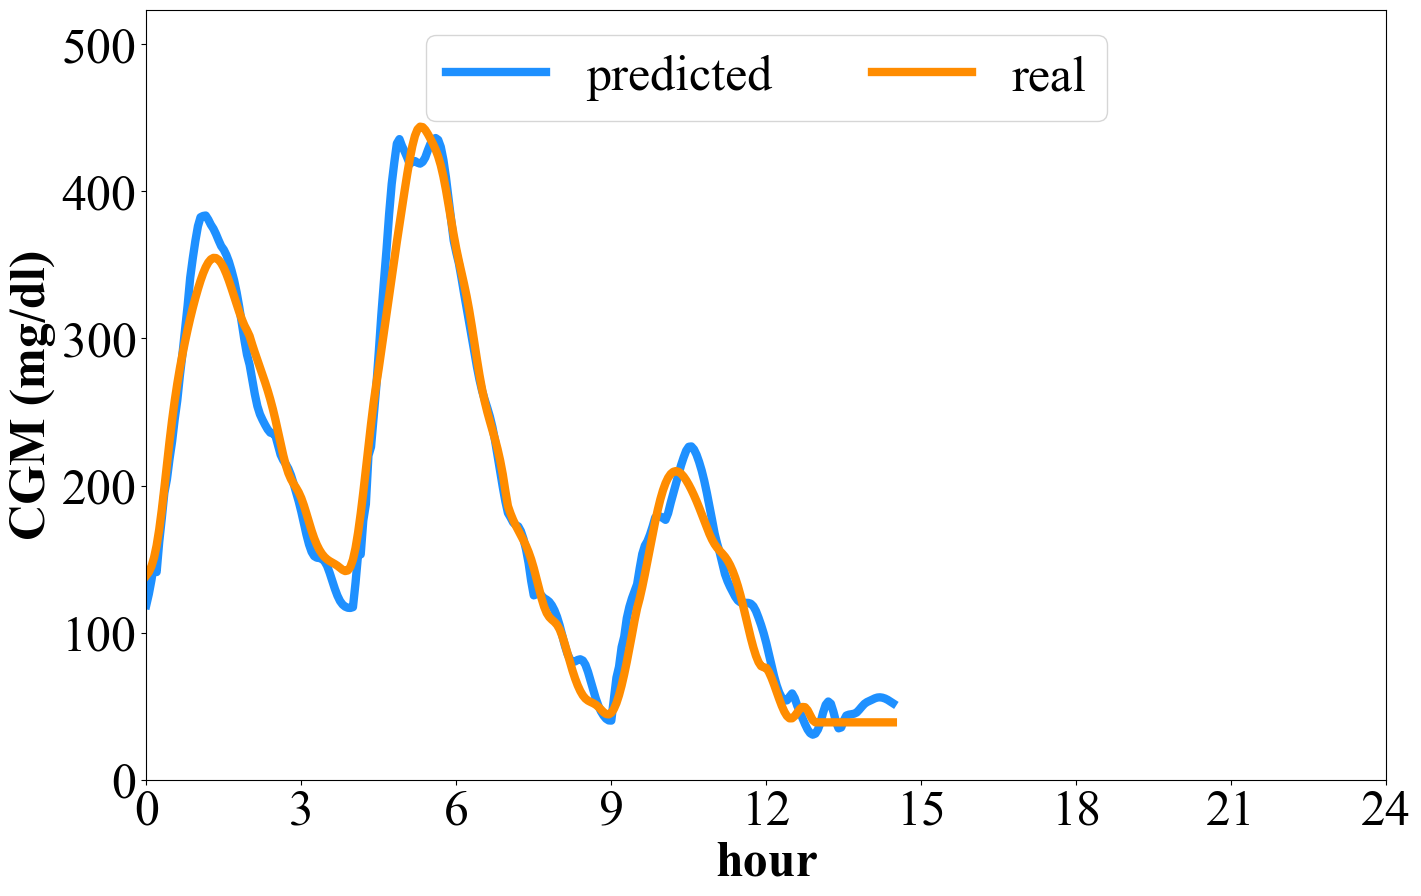

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#008.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 24ms/step
RMSE value of the global model: 28.3742
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 401.3483 - mse: 401.3483
Epoch 1: val_loss improved from inf to 1203.29956, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#008.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 90ms/step - loss: 401.3483 - mse: 401.3483 - val_loss: 1203.2996 - val_mse: 1203.2996
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 338.7788 - mse: 338.7788
Epoch 2: val_loss improved from 1203.29956 to 431.11664, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#008.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 83ms/step - loss: 338.7788 - mse: 338.7788 - val_loss: 431.1166 - val_mse: 431.1166
Epoch

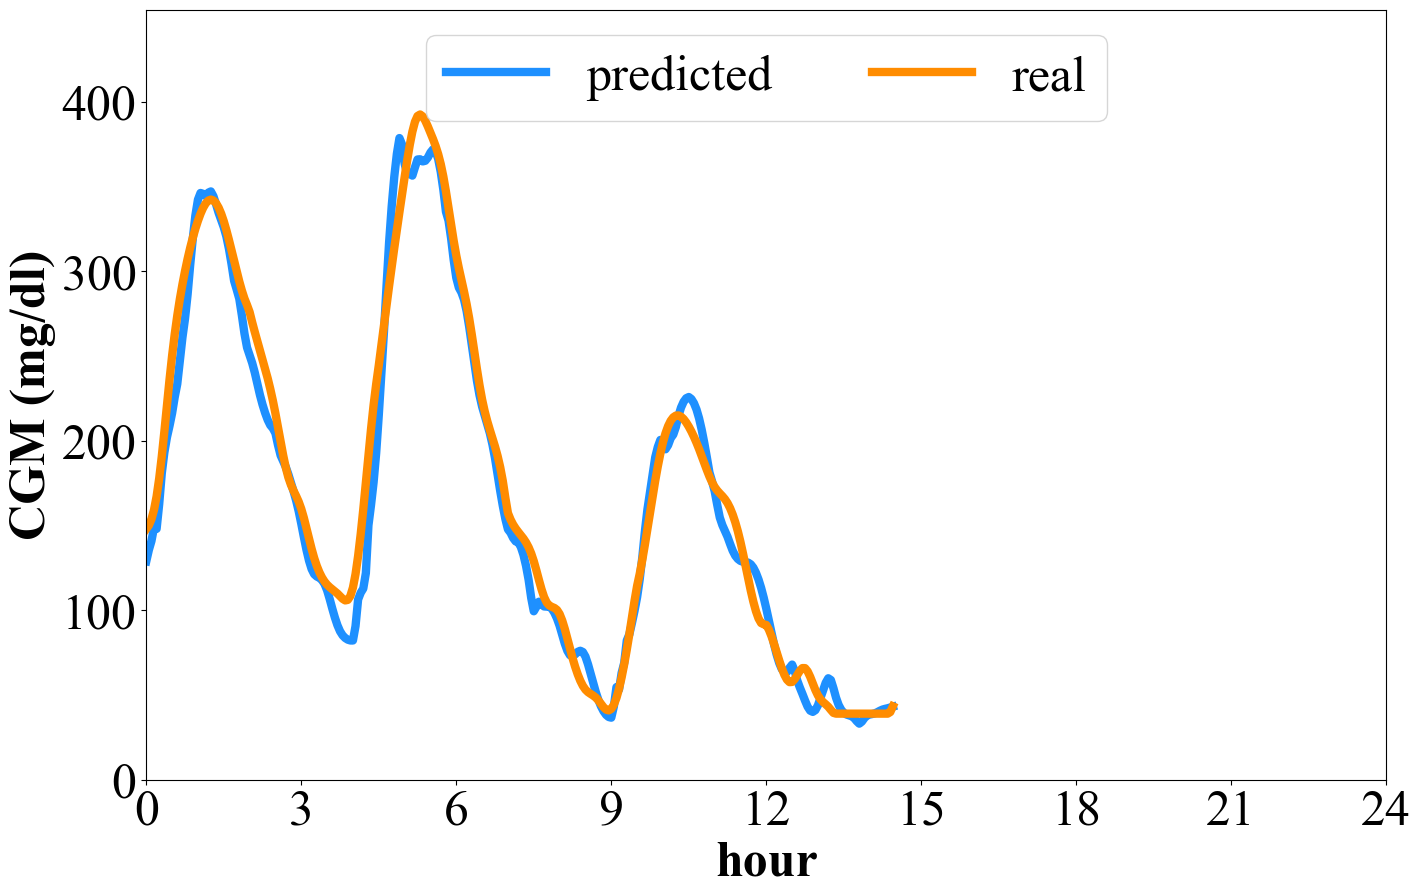

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#009.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 26ms/step
RMSE value of the global model: 18.9304
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 392.8334 - mse: 392.8334
Epoch 1: val_loss improved from inf to 347.96548, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#009.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 96ms/step - loss: 392.8334 - mse: 392.8334 - val_loss: 347.9655 - val_mse: 347.9655
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 225.5629 - mse: 225.5629
Epoch 2: val_loss improved from 347.96548 to 298.70911, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#009.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 92ms/step - loss: 225.5629 - mse: 225.5629 - val_loss: 298.7091 - val_mse: 298.7091
Epoch 3/1

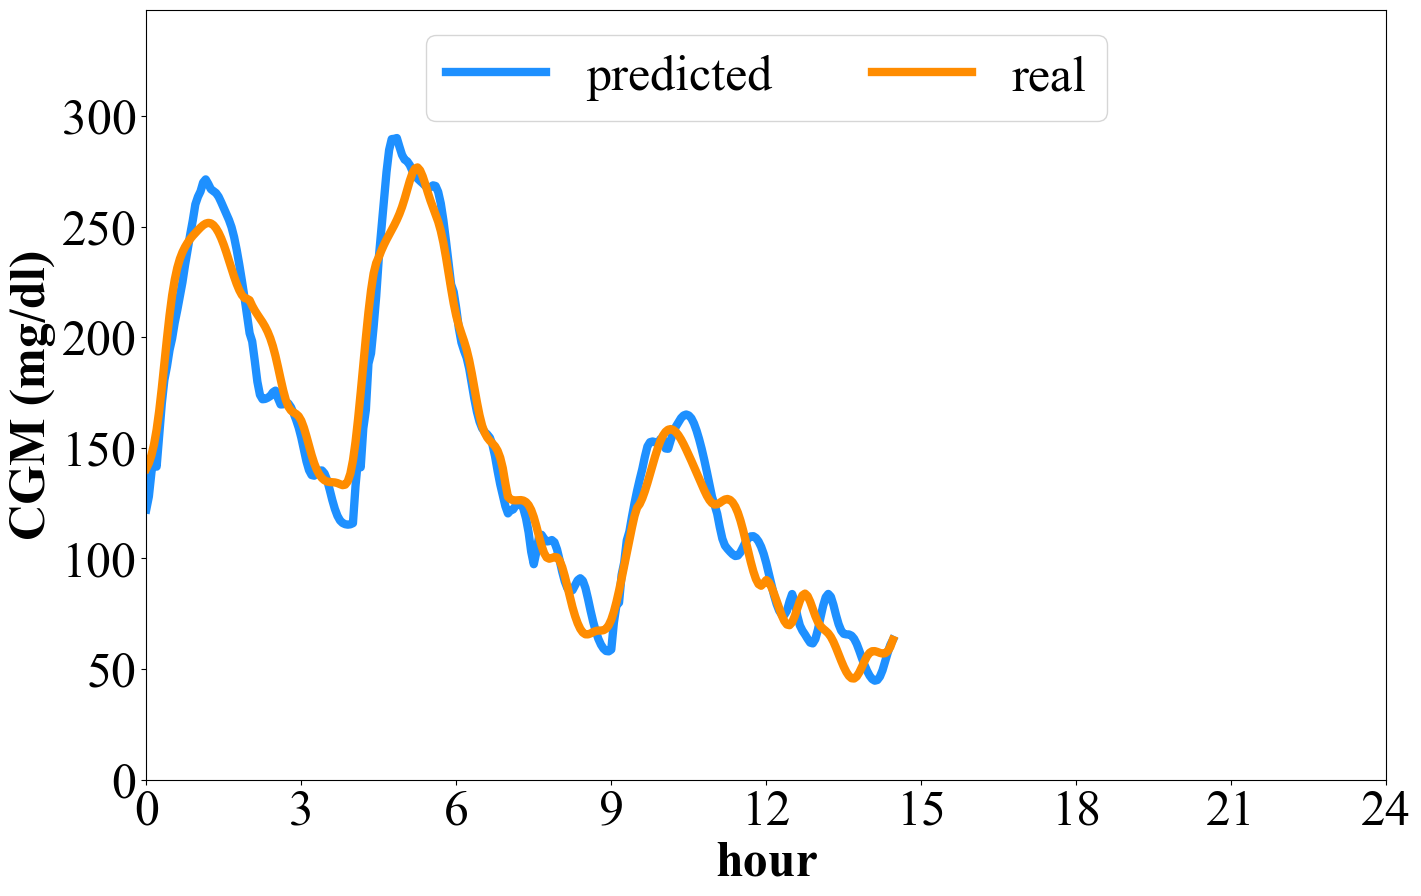

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#010.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 27ms/step
RMSE value of the global model: 16.4064
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 223.8719 - mse: 223.8719
Epoch 1: val_loss improved from inf to 266.60989, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#010.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 96ms/step - loss: 223.8719 - mse: 223.8719 - val_loss: 266.6099 - val_mse: 266.6099
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 193.4720 - mse: 193.4720
Epoch 2: val_loss did not improve from 266.60989
40/40 [==============================] - 3s 84ms/step - loss: 193.4720 - mse: 193.4720 - val_loss: 303.0365 - val_mse: 303.0365
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 196.5888 - mse: 196.5888
Epoch 3: val_loss did not improve from 266.609

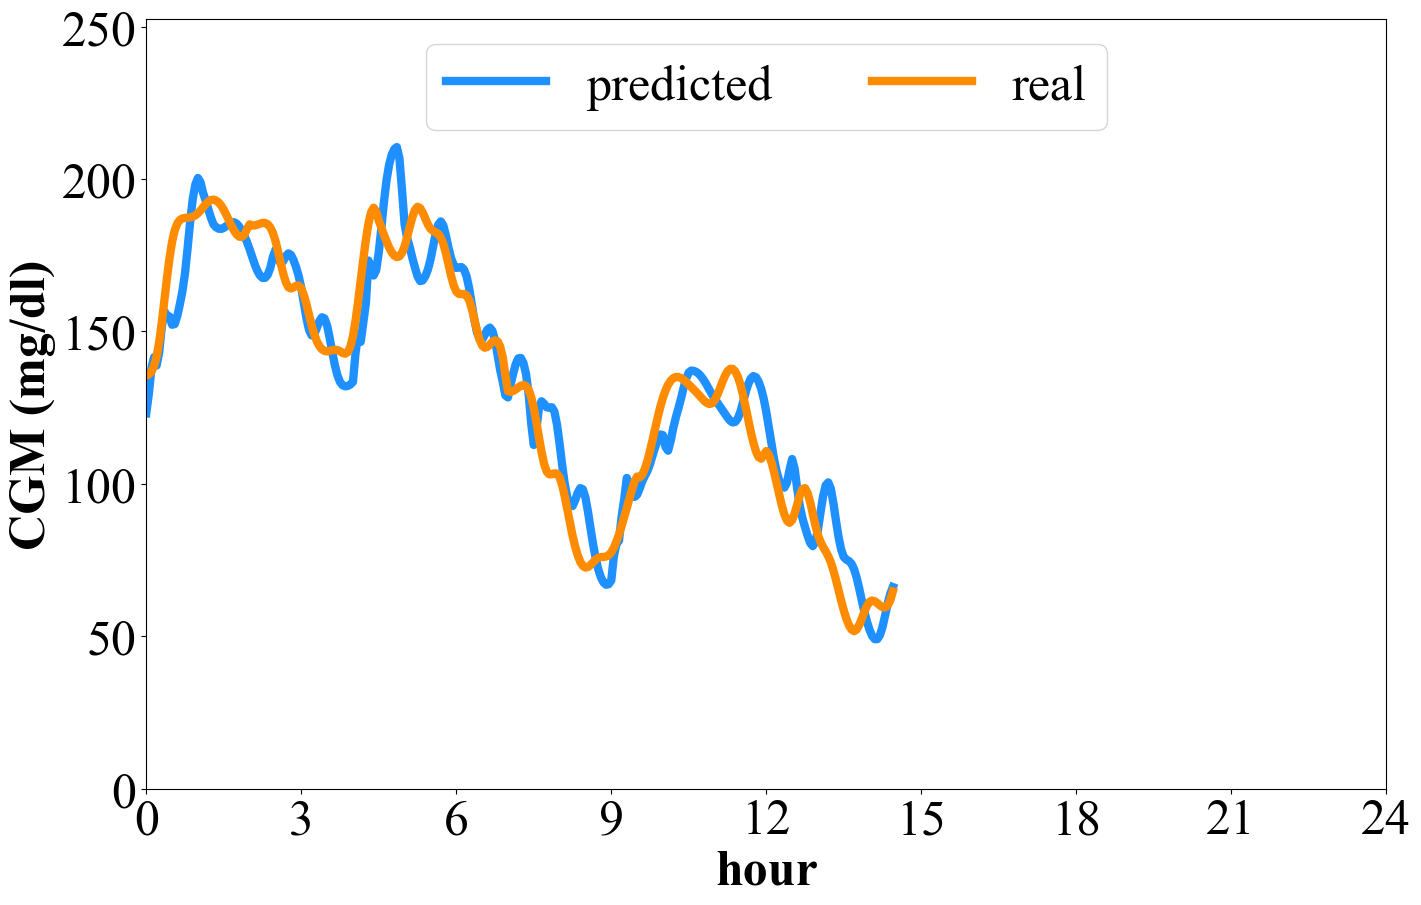

C:\Users\xinyi.yang\Desktop\group meeting\adult#003.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 24ms/step
RMSE value of the global model: 17.2957
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 309.5940 - mse: 309.5940
Epoch 1: val_loss improved from inf to 335.13583, saving model to Results/5_days_data_FDL/models\FDL_5_adult#003.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 95ms/step - loss: 309.5940 - mse: 309.5940 - val_loss: 335.1358 - val_mse: 335.1358
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 241.9305 - mse: 241.9305
Epoch 2: val_loss improved from 335.13583 to 295.57227, saving model to Results/5_days_data_FDL/models\FDL_5_adult#003.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 89ms/step - loss: 241.9305 - mse: 241.9305 - val_loss: 295.5723 - val_mse: 295.5723
Epoch 3/10
40/40 [======

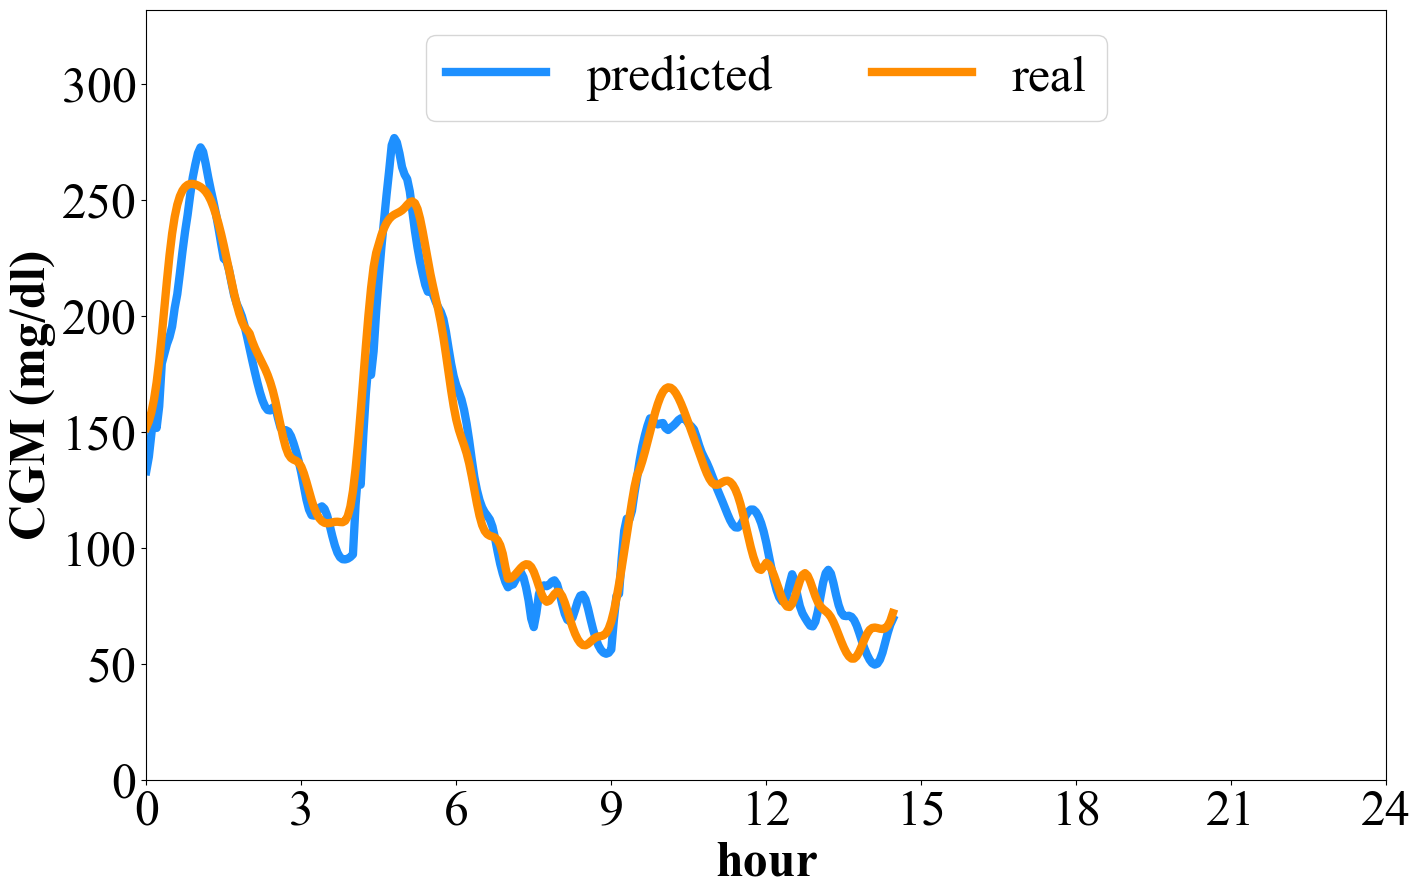

C:\Users\xinyi.yang\Desktop\group meeting\adult#004.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 24ms/step
RMSE value of the global model: 18.7571
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 323.4131 - mse: 323.4131
Epoch 1: val_loss improved from inf to 378.80527, saving model to Results/5_days_data_FDL/models\FDL_5_adult#004.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 89ms/step - loss: 323.4131 - mse: 323.4131 - val_loss: 378.8053 - val_mse: 378.8053
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 274.7000 - mse: 274.7000
Epoch 2: val_loss improved from 378.80527 to 288.69589, saving model to Results/5_days_data_FDL/models\FDL_5_adult#004.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 83ms/step - loss: 274.7000 - mse: 274.7000 - val_loss: 288.6959 - val_mse: 288.6959
Epoch 3/10
40/40 [======

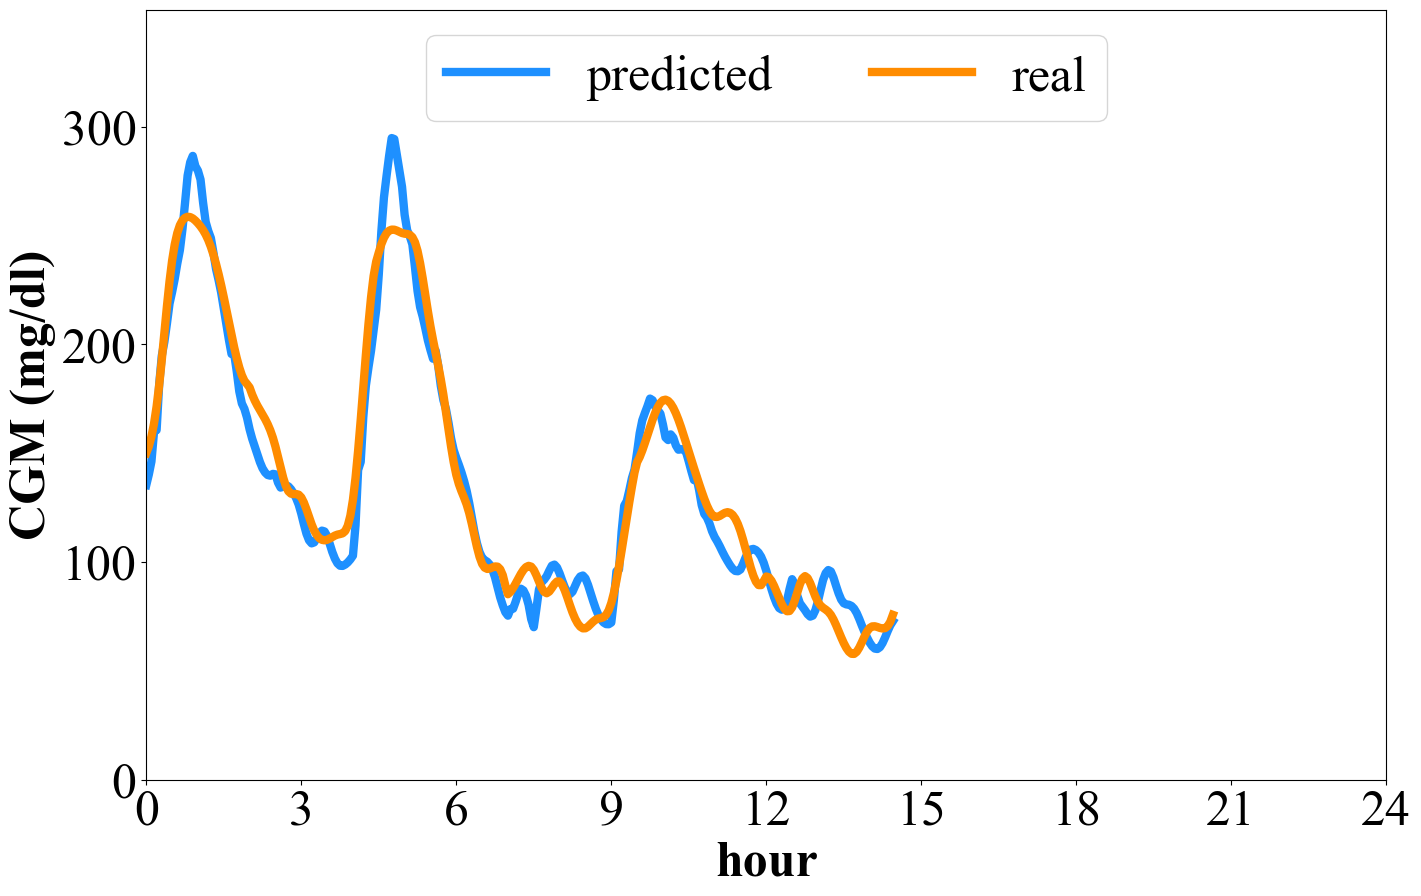

C:\Users\xinyi.yang\Desktop\group meeting\adult#005.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 25ms/step
RMSE value of the global model: 16.4047
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 254.4218 - mse: 254.4218
Epoch 1: val_loss improved from inf to 258.89917, saving model to Results/5_days_data_FDL/models\FDL_5_adult#005.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 105ms/step - loss: 254.4218 - mse: 254.4218 - val_loss: 258.8992 - val_mse: 258.8992
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 209.6795 - mse: 209.6795
Epoch 2: val_loss did not improve from 258.89917
40/40 [==============================] - 4s 93ms/step - loss: 209.6795 - mse: 209.6795 - val_loss: 281.0444 - val_mse: 281.0444
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 202.6661 - mse: 202.6661
Epoch 3: val_loss did not improve from 258.89917
40/40 

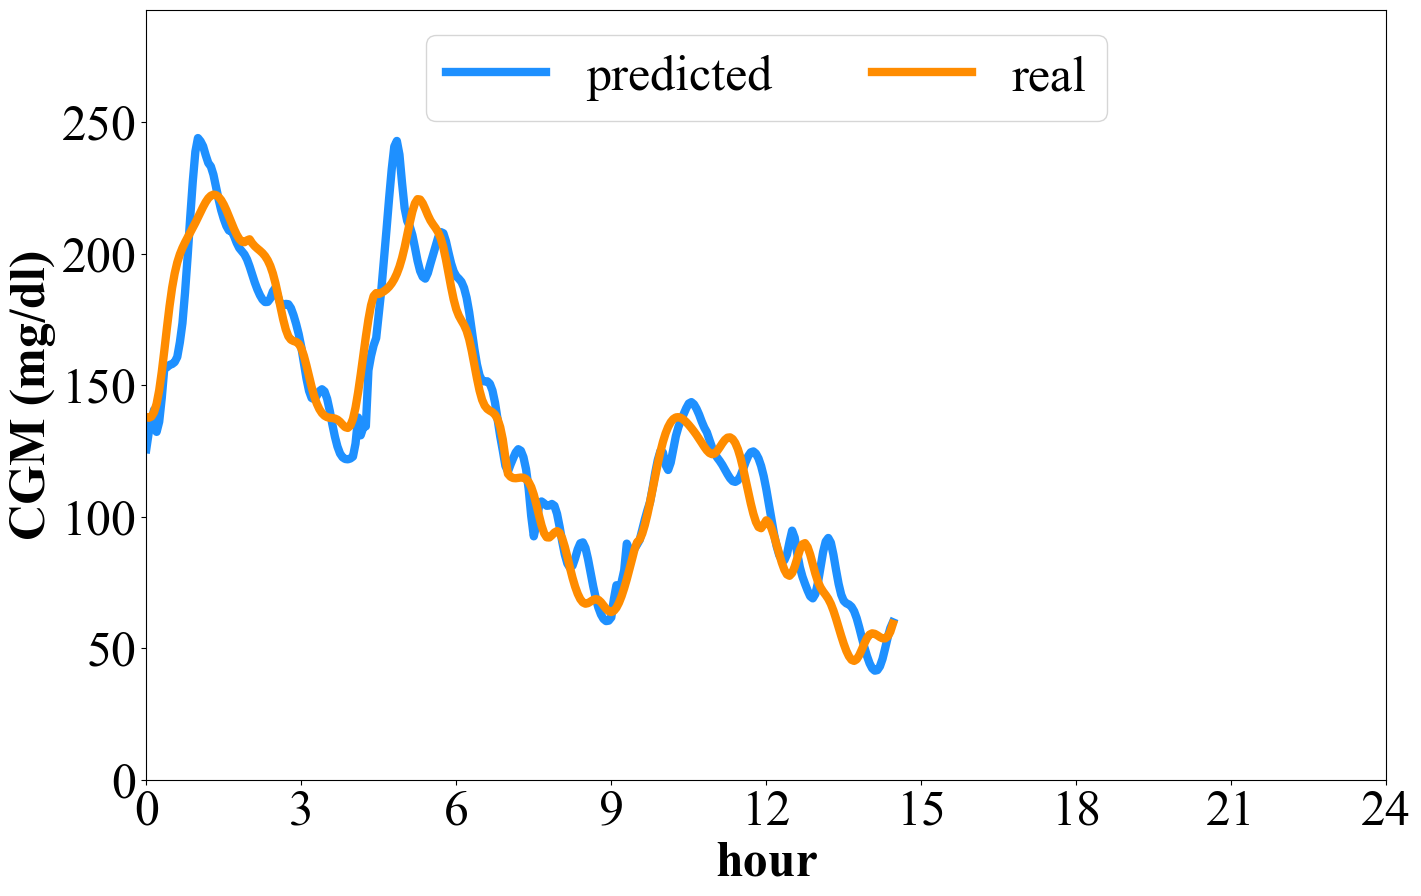

C:\Users\xinyi.yang\Desktop\group meeting\adult#006.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 26ms/step
RMSE value of the global model: 16.6395
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 243.7367 - mse: 243.7367
Epoch 1: val_loss improved from inf to 283.96582, saving model to Results/5_days_data_FDL/models\FDL_5_adult#006.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 97ms/step - loss: 243.7367 - mse: 243.7367 - val_loss: 283.9658 - val_mse: 283.9658
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 196.4026 - mse: 196.4026
Epoch 2: val_loss did not improve from 283.96582
40/40 [==============================] - 4s 92ms/step - loss: 196.4026 - mse: 196.4026 - val_loss: 286.5192 - val_mse: 286.5192
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 196.5343 - mse: 196.5343
Epoch 3: val_loss improved from 283.96582 to 270.12546, 

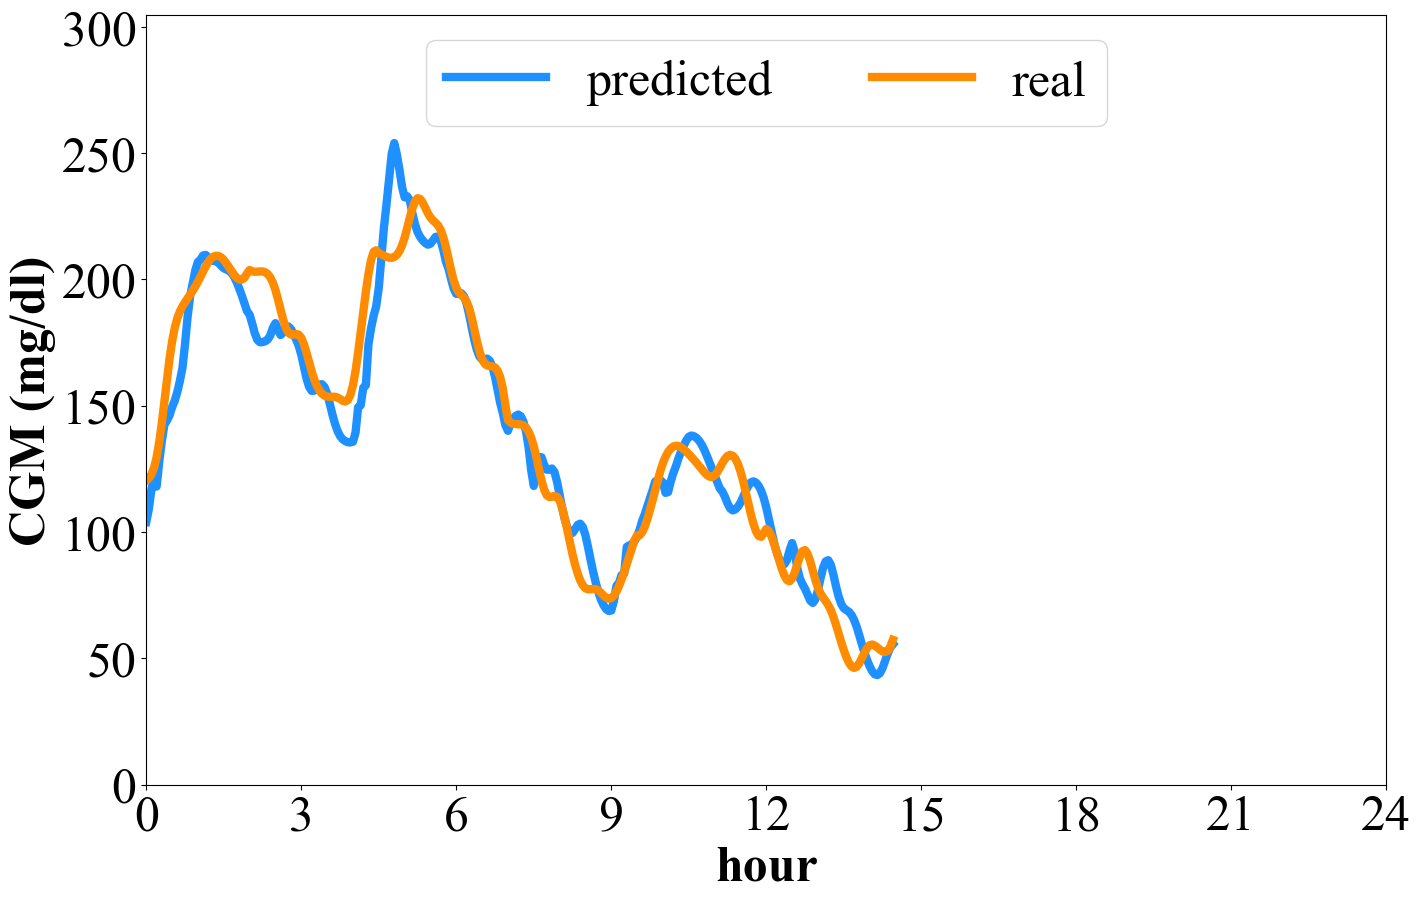

C:\Users\xinyi.yang\Desktop\group meeting\adult#007.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 27ms/step
RMSE value of the global model: 15.5538
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 237.5673 - mse: 237.5673
Epoch 1: val_loss improved from inf to 309.37744, saving model to Results/5_days_data_FDL/models\FDL_5_adult#007.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 99ms/step - loss: 237.5673 - mse: 237.5673 - val_loss: 309.3774 - val_mse: 309.3774
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 196.7052 - mse: 196.7052
Epoch 2: val_loss improved from 309.37744 to 266.39810, saving model to Results/5_days_data_FDL/models\FDL_5_adult#007.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 86ms/step - loss: 196.7052 - mse: 196.7052 - val_loss: 266.3981 - val_mse: 266.3981
Epoch 3/10
40/40 [======

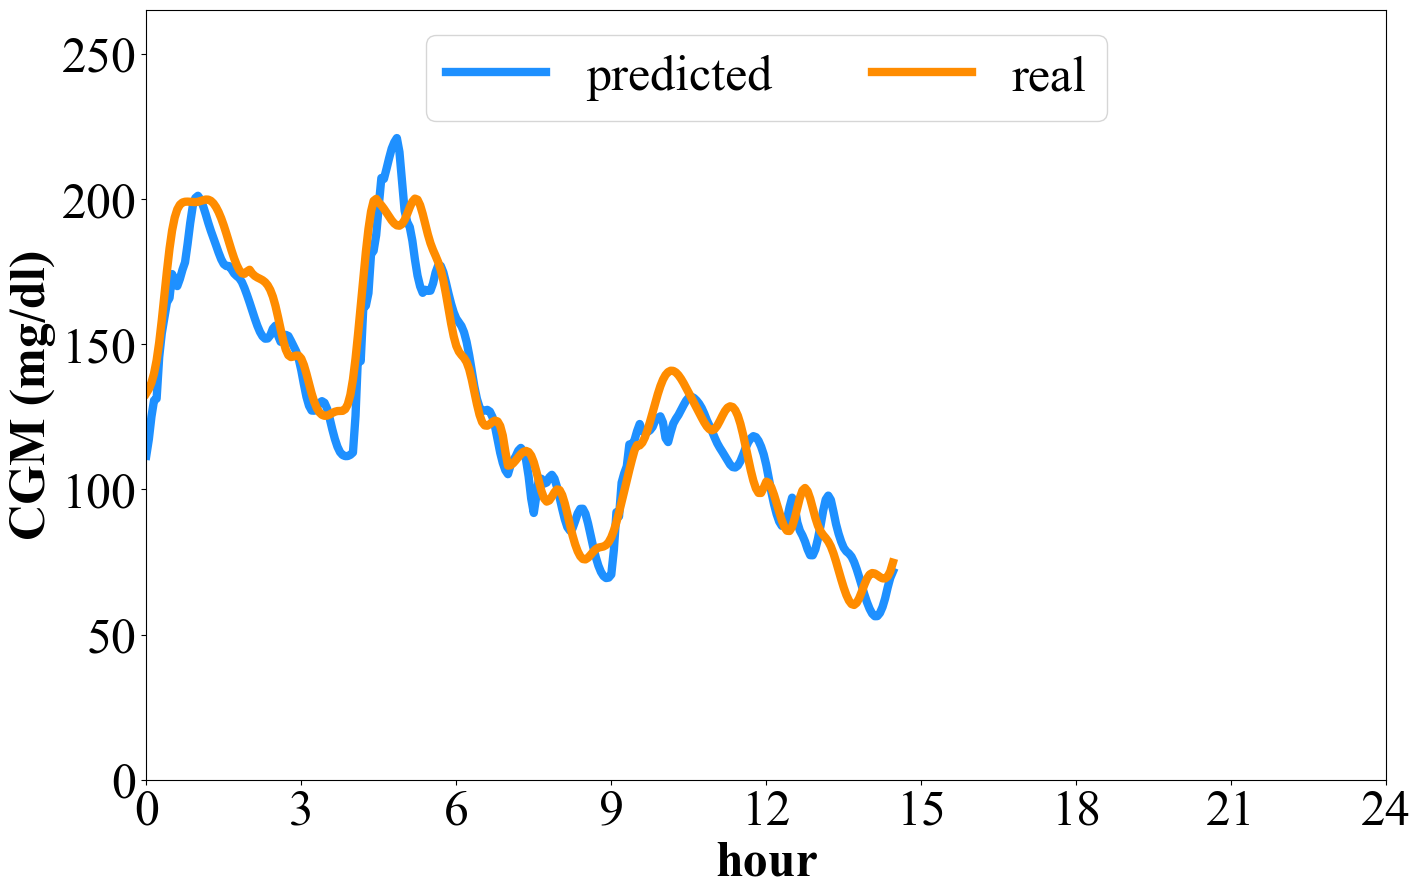

C:\Users\xinyi.yang\Desktop\group meeting\adult#008.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 24ms/step
RMSE value of the global model: 15.5966
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 234.3446 - mse: 234.3446
Epoch 1: val_loss improved from inf to 295.94836, saving model to Results/5_days_data_FDL/models\FDL_5_adult#008.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 95ms/step - loss: 234.3446 - mse: 234.3446 - val_loss: 295.9484 - val_mse: 295.9484
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 186.0266 - mse: 186.0266
Epoch 2: val_loss improved from 295.94836 to 267.21457, saving model to Results/5_days_data_FDL/models\FDL_5_adult#008.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 88ms/step - loss: 186.0266 - mse: 186.0266 - val_loss: 267.2146 - val_mse: 267.2146
Epoch 3/10
40/40 [======

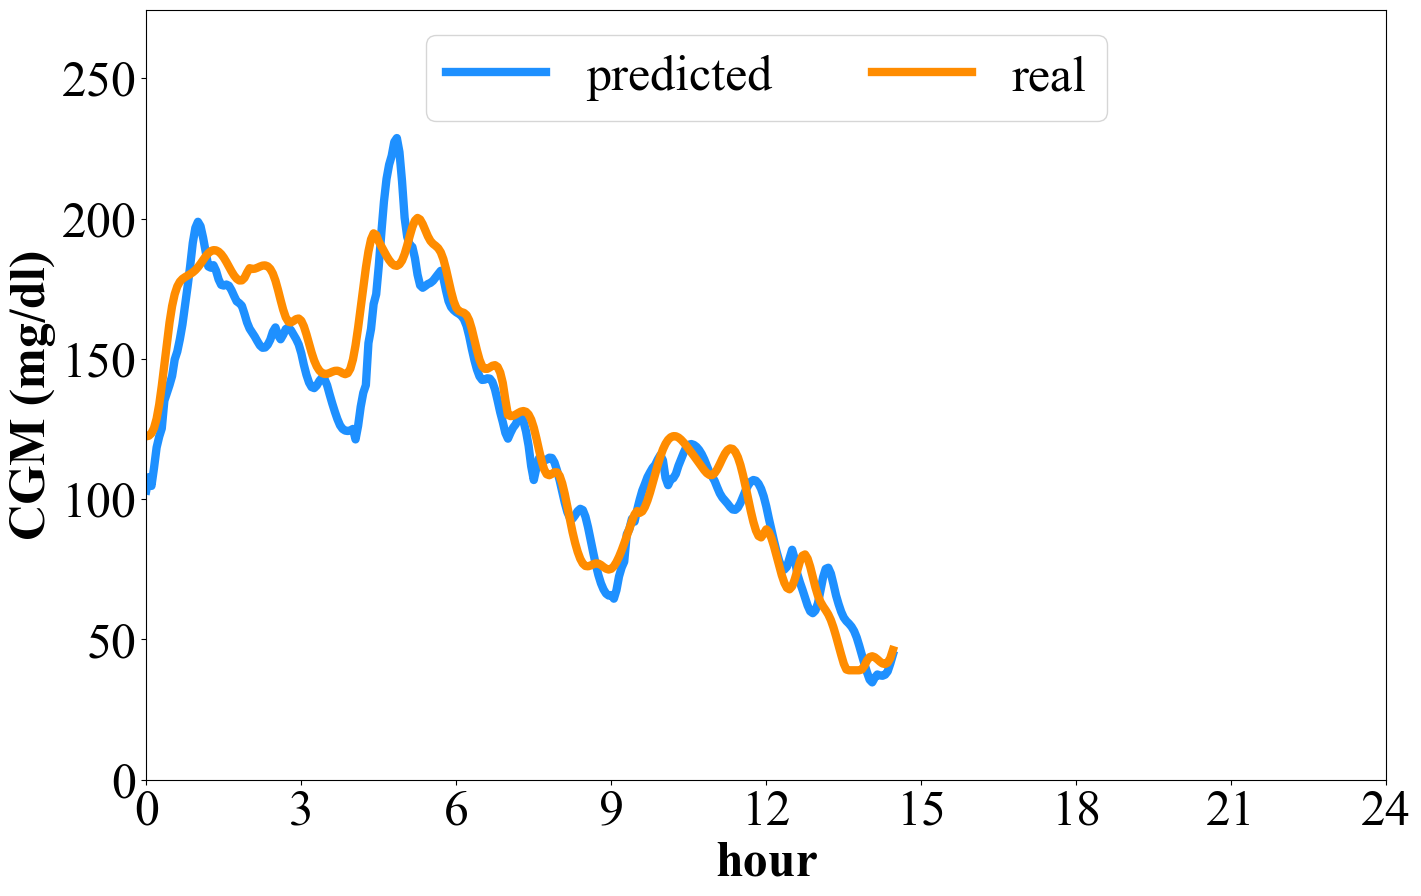

C:\Users\xinyi.yang\Desktop\group meeting\adult#009.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 25ms/step
RMSE value of the global model: 19.0173
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 256.3423 - mse: 256.3423
Epoch 1: val_loss improved from inf to 248.08488, saving model to Results/5_days_data_FDL/models\FDL_5_adult#009.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 91ms/step - loss: 256.3423 - mse: 256.3423 - val_loss: 248.0849 - val_mse: 248.0849
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 191.7144 - mse: 191.7144
Epoch 2: val_loss did not improve from 248.08488
40/40 [==============================] - 3s 85ms/step - loss: 191.7144 - mse: 191.7144 - val_loss: 275.3823 - val_mse: 275.3823
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 178.0853 - mse: 178.0853
Epoch 3: val_loss did not improve from 248.08488
40/40 [

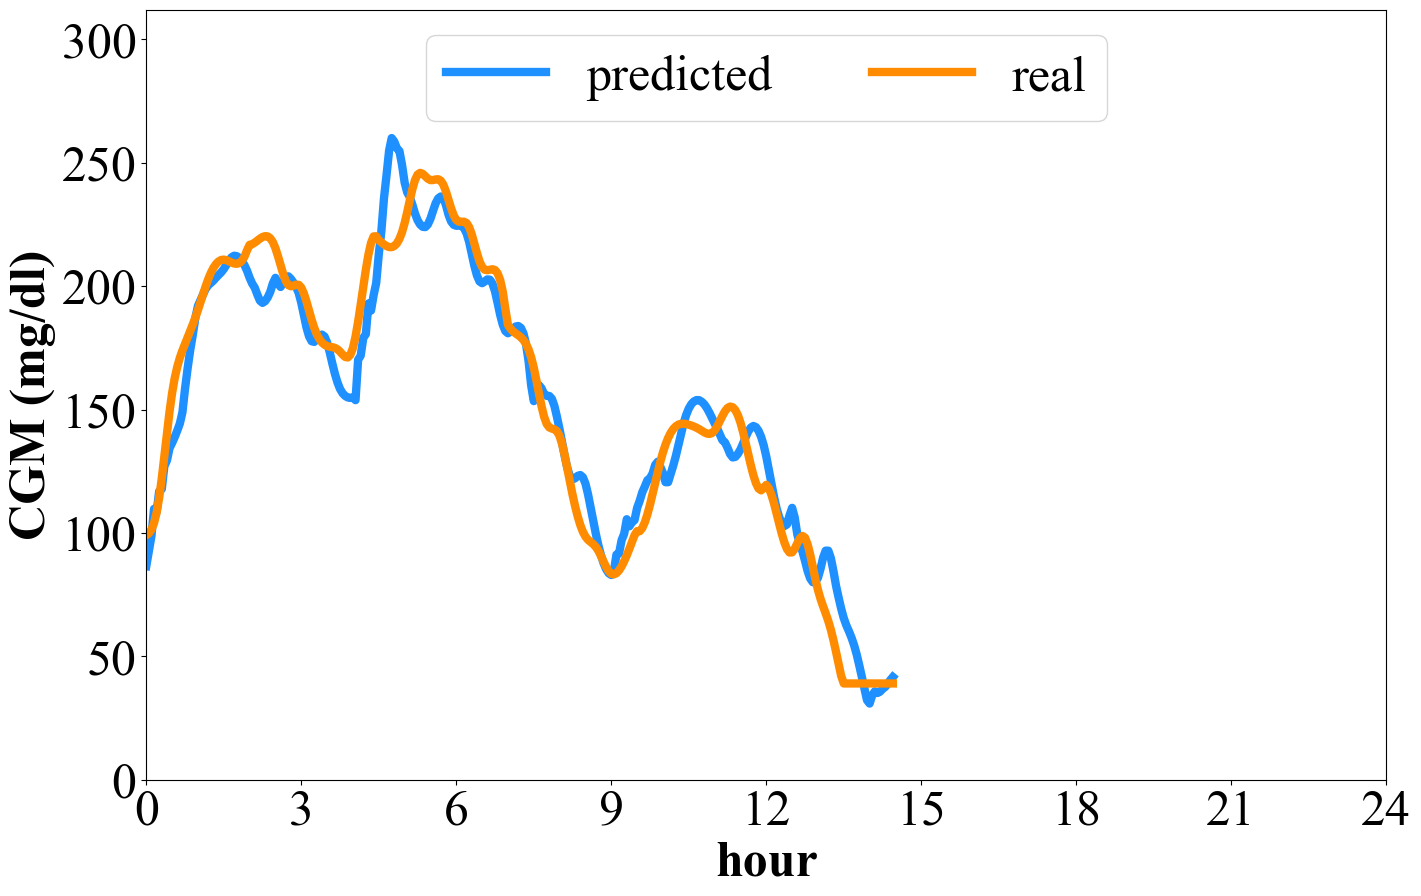

C:\Users\xinyi.yang\Desktop\group meeting\adult#010.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 24ms/step
RMSE value of the global model: 18.3941
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 298.7575 - mse: 298.7575
Epoch 1: val_loss improved from inf to 423.54260, saving model to Results/5_days_data_FDL/models\FDL_5_adult#010.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 96ms/step - loss: 298.7575 - mse: 298.7575 - val_loss: 423.5426 - val_mse: 423.5426
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 248.2027 - mse: 248.2027
Epoch 2: val_loss improved from 423.54260 to 327.93900, saving model to Results/5_days_data_FDL/models\FDL_5_adult#010.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 87ms/step - loss: 248.2027 - mse: 248.2027 - val_loss: 327.9390 - val_mse: 327.9390
Epoch 3/10
40/40 [======

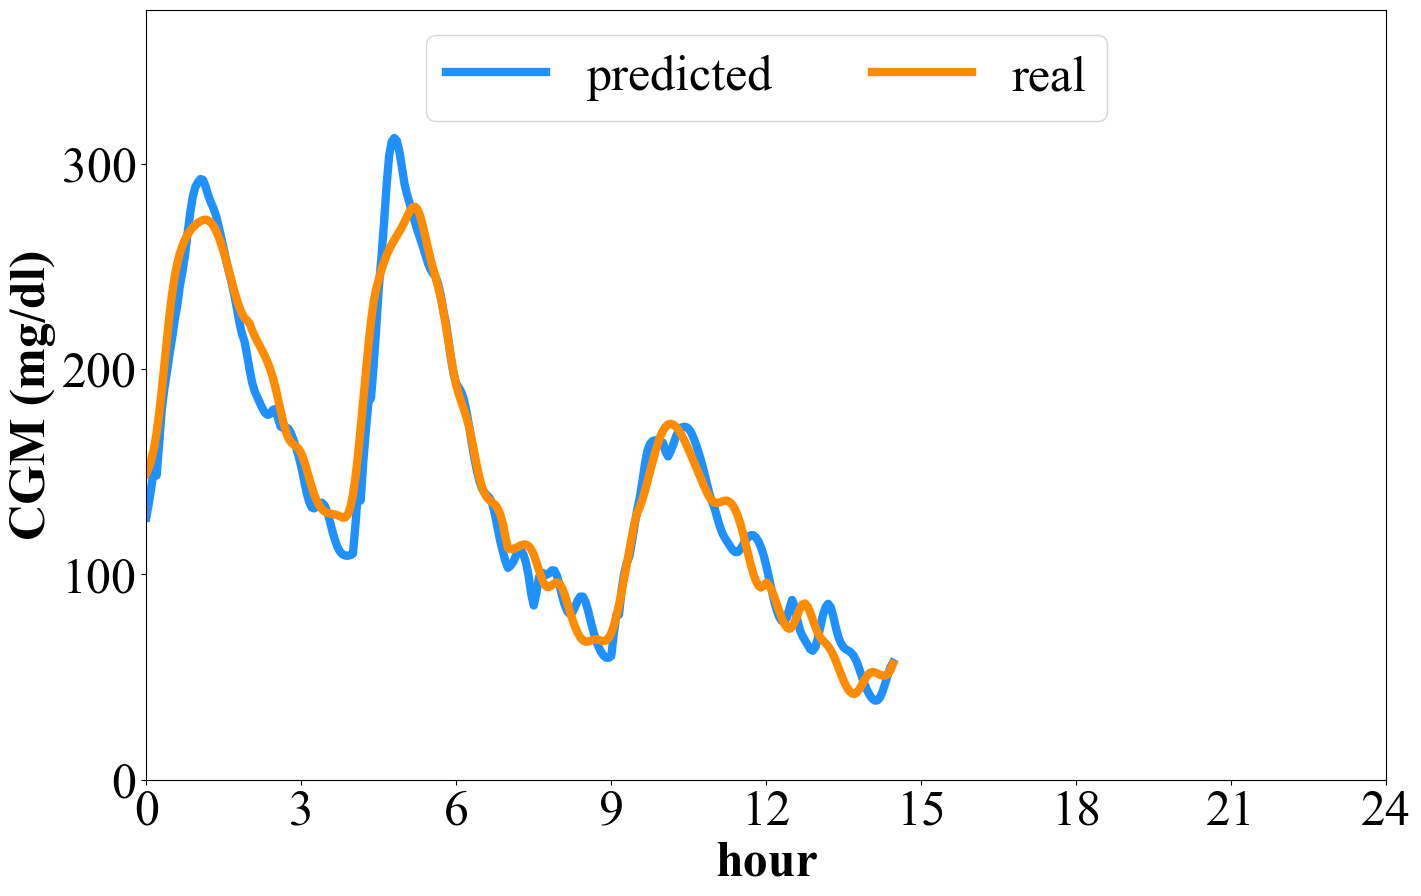

C:\Users\xinyi.yang\Desktop\group meeting\child#002.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 25ms/step
RMSE value of the global model: 16.5182
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 284.9508 - mse: 284.9508
Epoch 1: val_loss improved from inf to 322.30878, saving model to Results/5_days_data_FDL/models\FDL_5_child#002.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 93ms/step - loss: 284.9508 - mse: 284.9508 - val_loss: 322.3088 - val_mse: 322.3088
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 201.3342 - mse: 201.3342
Epoch 2: val_loss improved from 322.30878 to 274.60861, saving model to Results/5_days_data_FDL/models\FDL_5_child#002.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 87ms/step - loss: 201.3342 - mse: 201.3342 - val_loss: 274.6086 - val_mse: 274.6086
Epoch 3/10
40/40 [======

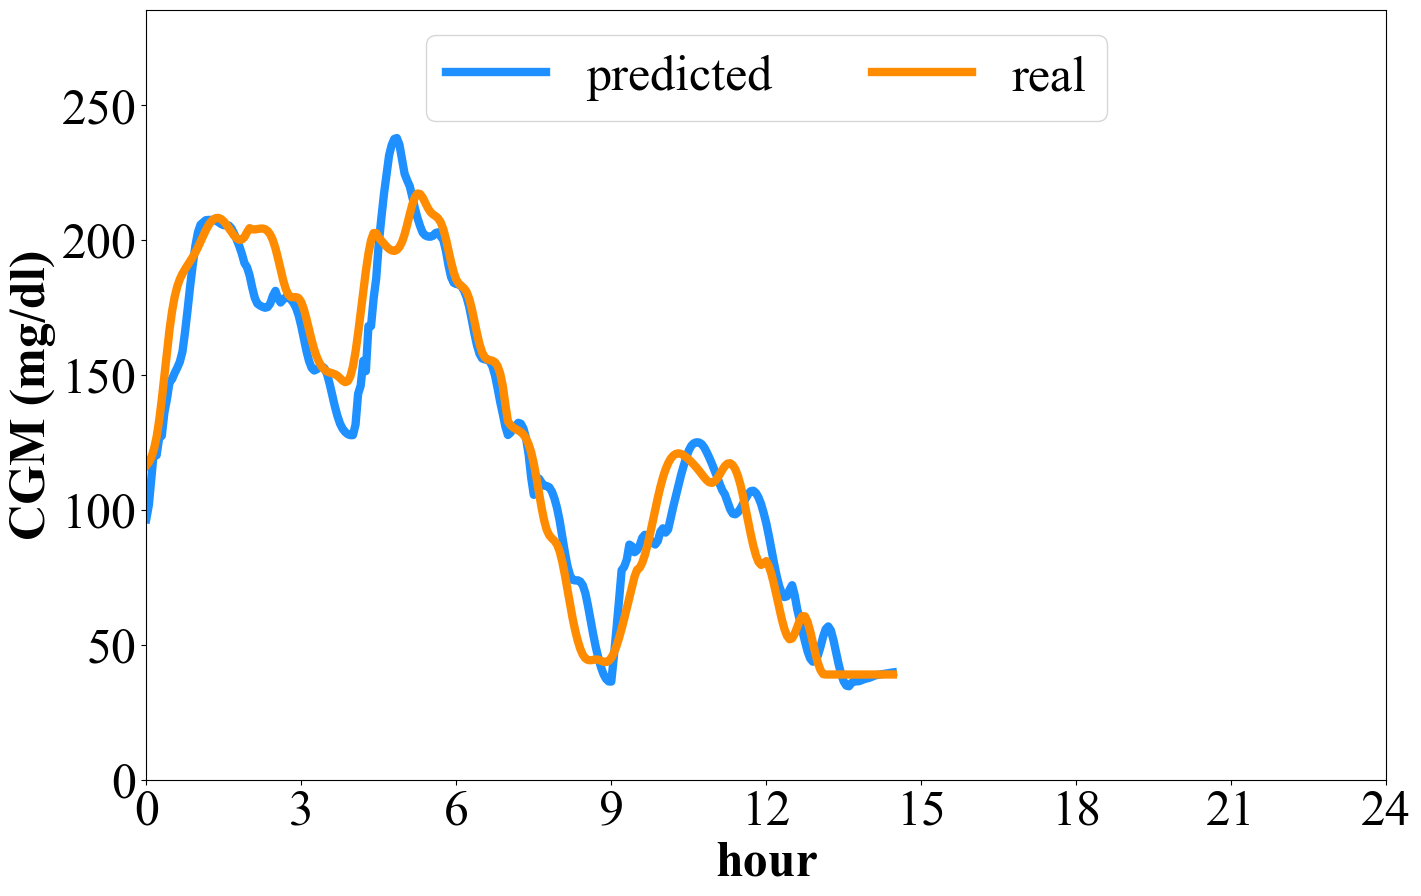

C:\Users\xinyi.yang\Desktop\group meeting\child#003.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 24ms/step
RMSE value of the global model: 29.3298
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 901.0948 - mse: 901.0948
Epoch 1: val_loss improved from inf to 895.78882, saving model to Results/5_days_data_FDL/models\FDL_5_child#003.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 94ms/step - loss: 901.0948 - mse: 901.0948 - val_loss: 895.7888 - val_mse: 895.7888
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 325.5433 - mse: 325.5433
Epoch 2: val_loss improved from 895.78882 to 265.74103, saving model to Results/5_days_data_FDL/models\FDL_5_child#003.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 90ms/step - loss: 325.5433 - mse: 325.5433 - val_loss: 265.7410 - val_mse: 265.7410
Epoch 3/10
40/40 [======

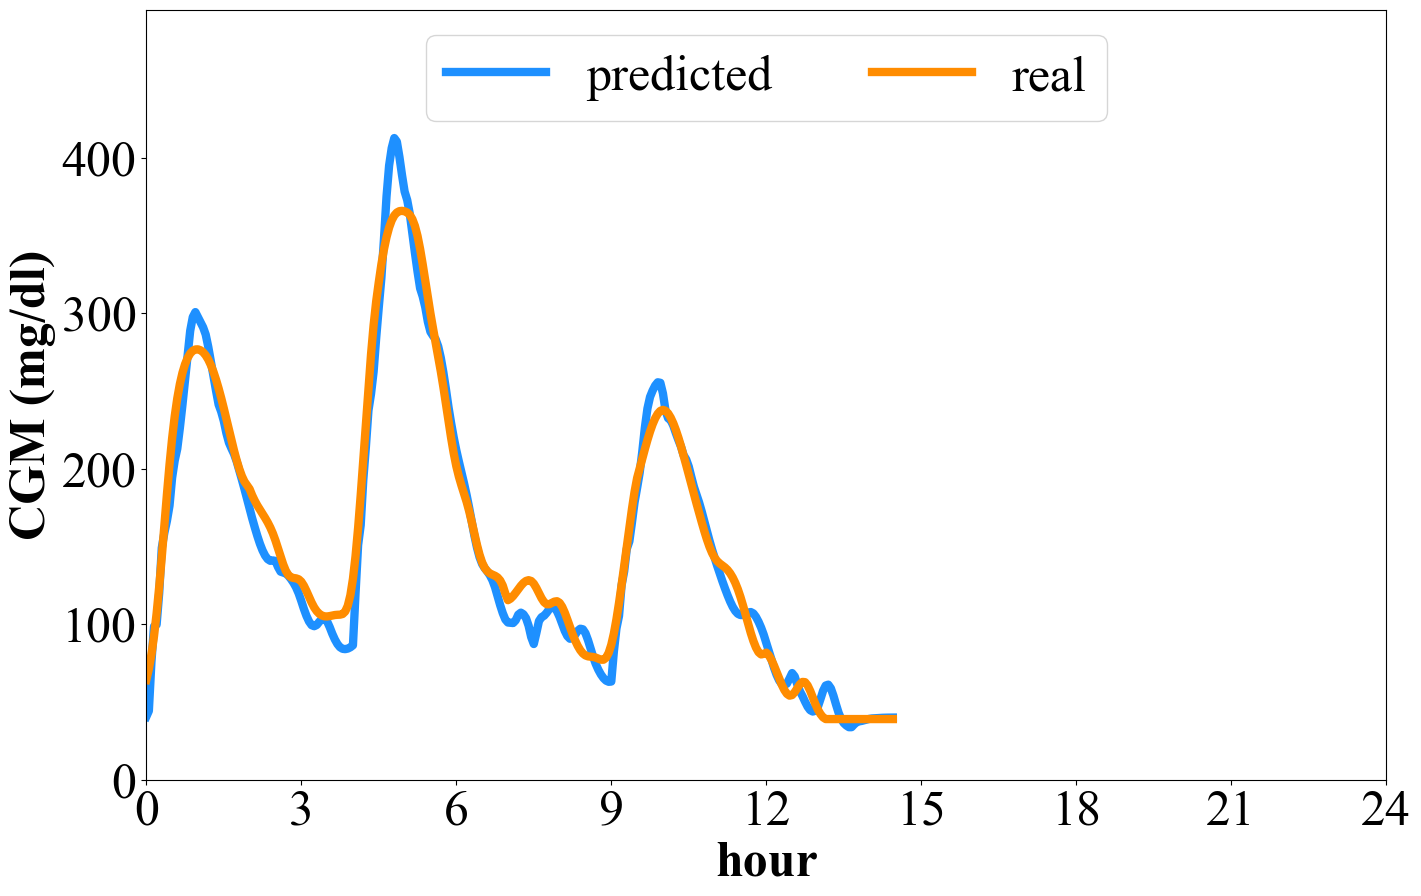

C:\Users\xinyi.yang\Desktop\group meeting\child#004.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 25ms/step
RMSE value of the global model: 12.9330
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 208.0294 - mse: 208.0294
Epoch 1: val_loss improved from inf to 124.02314, saving model to Results/5_days_data_FDL/models\FDL_5_child#004.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 87ms/step - loss: 208.0294 - mse: 208.0294 - val_loss: 124.0231 - val_mse: 124.0231
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 162.9432 - mse: 162.9432
Epoch 2: val_loss did not improve from 124.02314
40/40 [==============================] - 3s 81ms/step - loss: 162.9432 - mse: 162.9432 - val_loss: 141.6253 - val_mse: 141.6253
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 165.8232 - mse: 165.8232
Epoch 3: val_loss did not improve from 124.02314
40/40 [

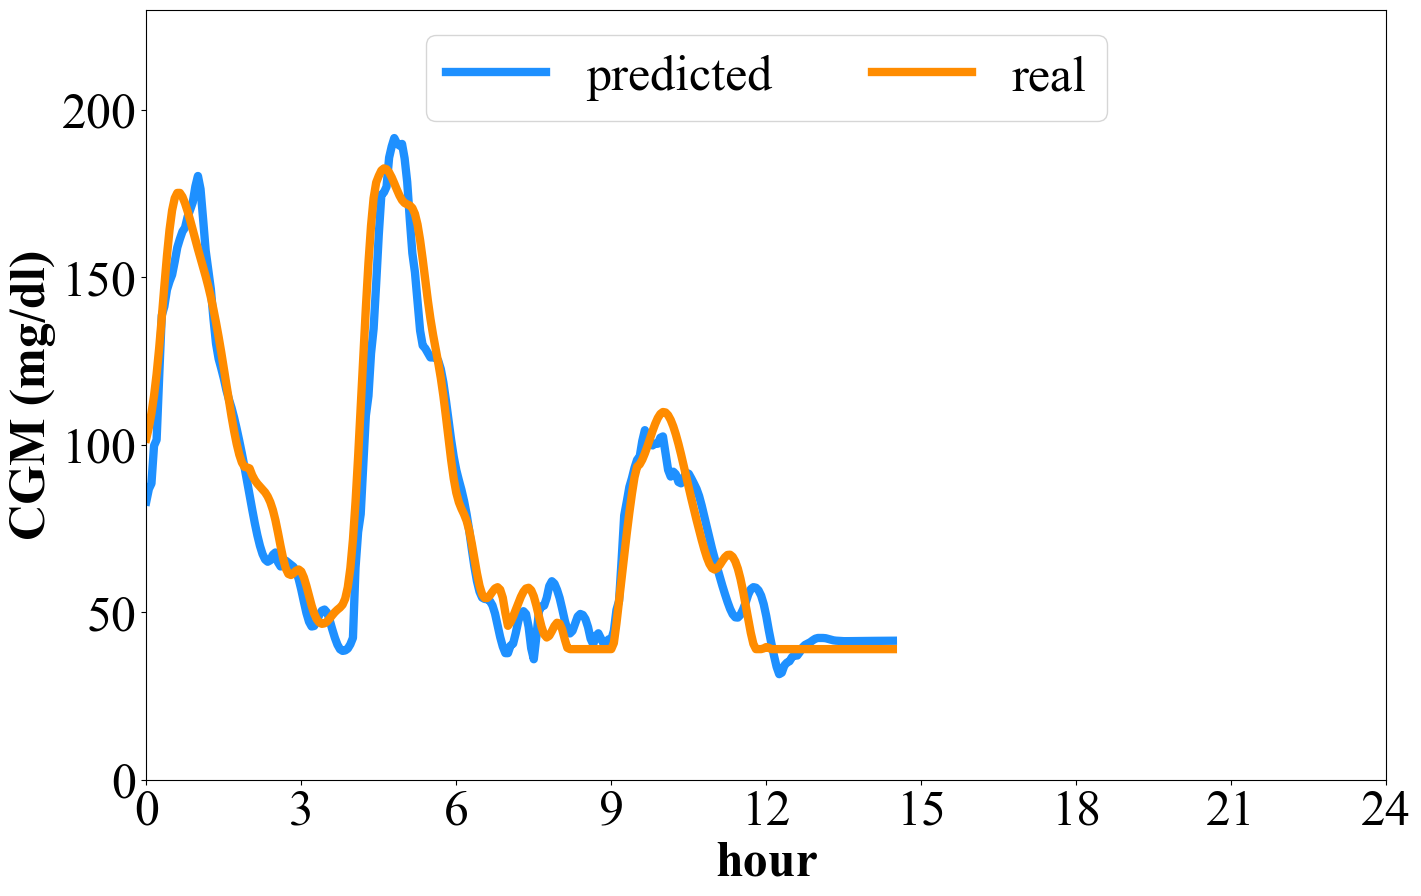

C:\Users\xinyi.yang\Desktop\group meeting\child#005.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 26ms/step
RMSE value of the global model: 17.9462
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 181.0362 - mse: 181.0362
Epoch 1: val_loss improved from inf to 207.52753, saving model to Results/5_days_data_FDL/models\FDL_5_child#005.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 90ms/step - loss: 181.0362 - mse: 181.0362 - val_loss: 207.5275 - val_mse: 207.5275
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 163.3847 - mse: 163.3847
Epoch 2: val_loss improved from 207.52753 to 183.56114, saving model to Results/5_days_data_FDL/models\FDL_5_child#005.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 84ms/step - loss: 163.3847 - mse: 163.3847 - val_loss: 183.5611 - val_mse: 183.5611
Epoch 3/10
40/40 [======

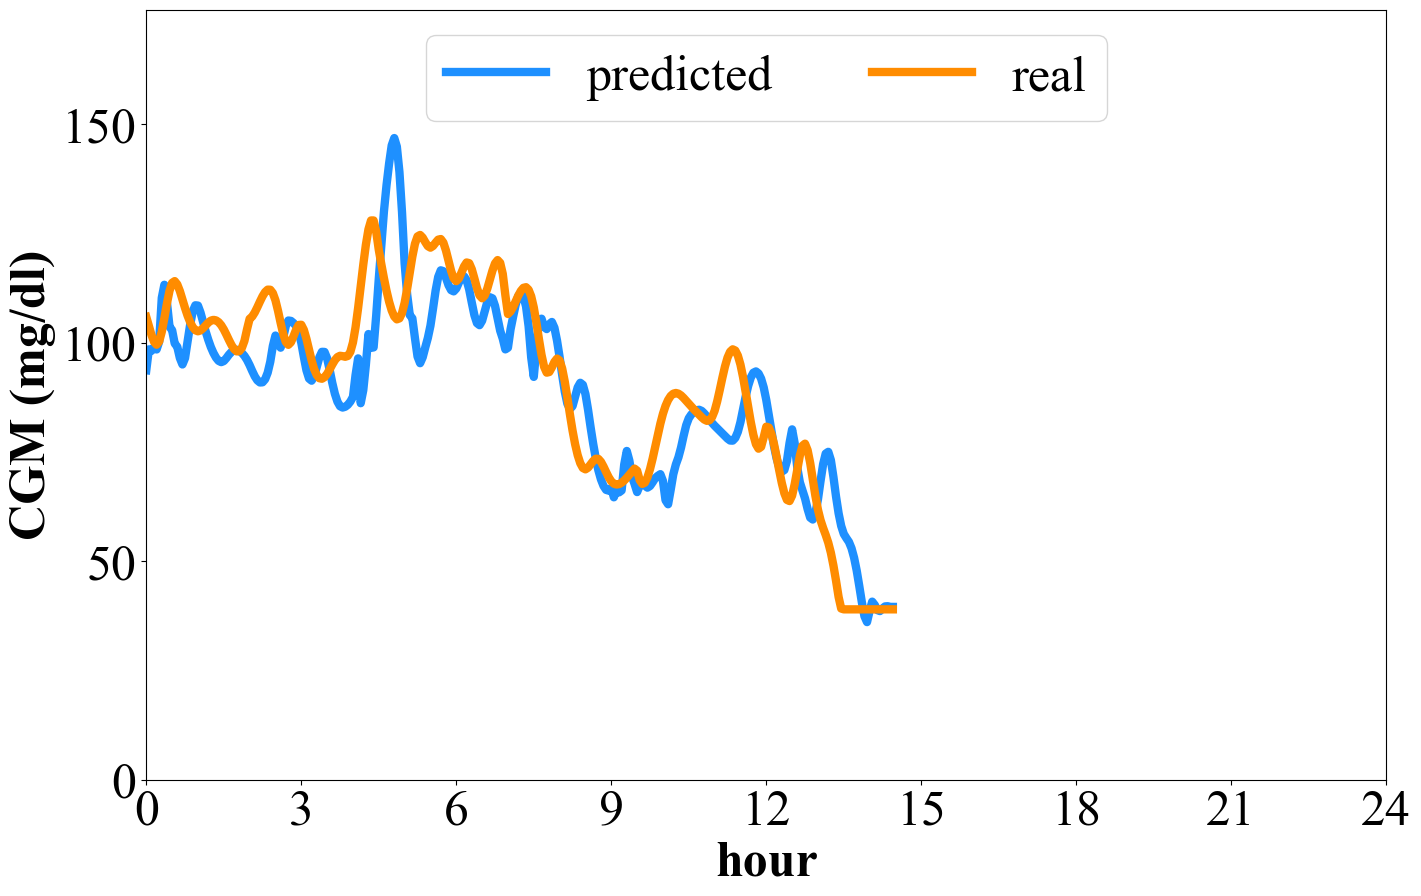

C:\Users\xinyi.yang\Desktop\group meeting\child#006.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 24ms/step
RMSE value of the global model: 23.8838
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 360.5975 - mse: 360.5975
Epoch 1: val_loss improved from inf to 400.94522, saving model to Results/5_days_data_FDL/models\FDL_5_child#006.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 107ms/step - loss: 360.5975 - mse: 360.5975 - val_loss: 400.9452 - val_mse: 400.9452
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 265.7152 - mse: 265.7152
Epoch 2: val_loss improved from 400.94522 to 205.68359, saving model to Results/5_days_data_FDL/models\FDL_5_child#006.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 101ms/step - loss: 265.7152 - mse: 265.7152 - val_loss: 205.6836 - val_mse: 205.6836
Epoch 3/10
40/40 [====

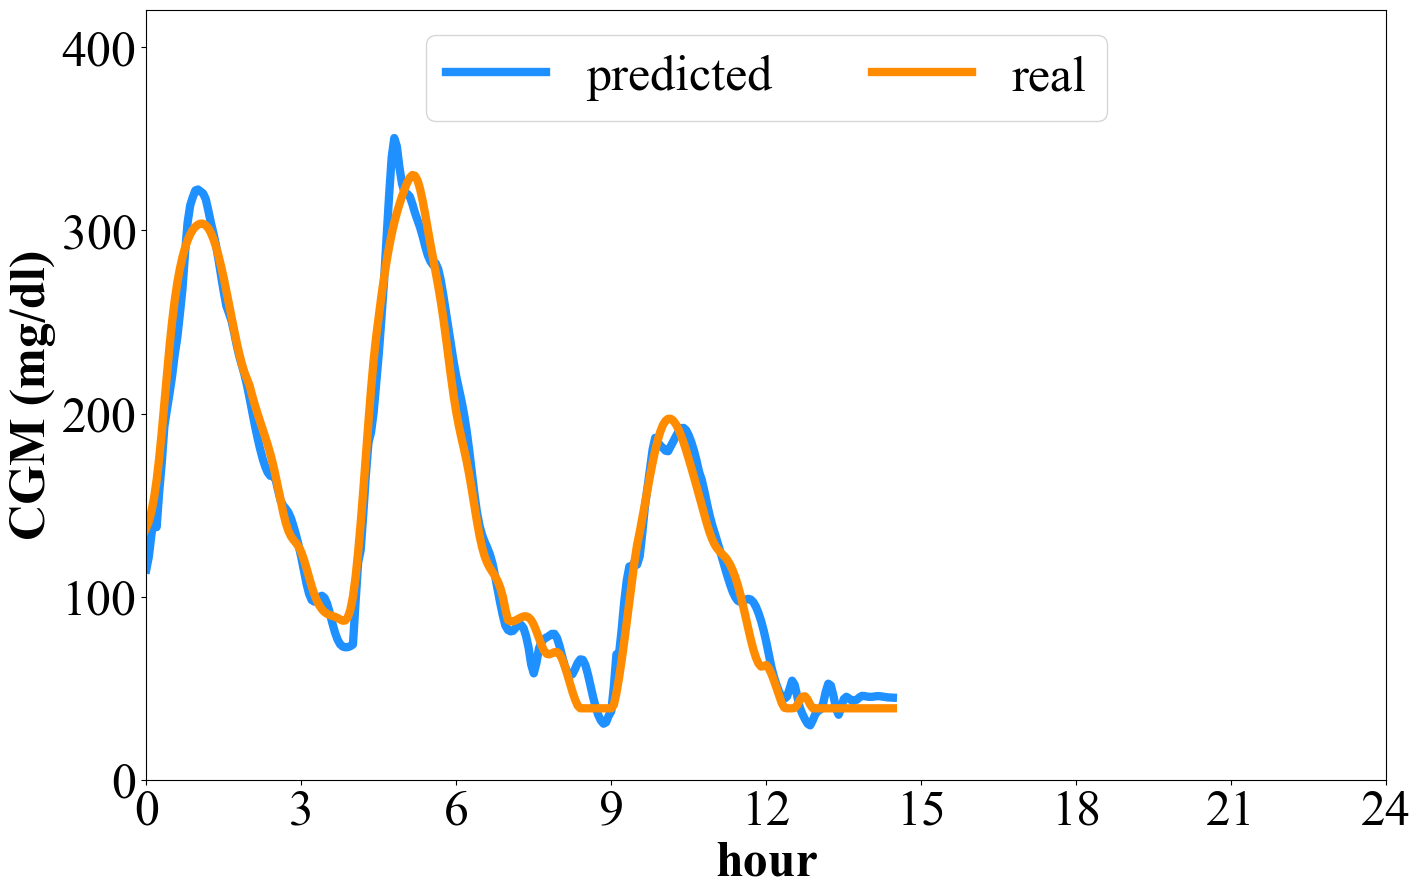

C:\Users\xinyi.yang\Desktop\group meeting\child#007.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 29ms/step
RMSE value of the global model: 15.7300
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 317.2128 - mse: 317.2128
Epoch 1: val_loss improved from inf to 205.16940, saving model to Results/5_days_data_FDL/models\FDL_5_child#007.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 103ms/step - loss: 317.2128 - mse: 317.2128 - val_loss: 205.1694 - val_mse: 205.1694
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 221.9286 - mse: 221.9286
Epoch 2: val_loss improved from 205.16940 to 180.22054, saving model to Results/5_days_data_FDL/models\FDL_5_child#007.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 94ms/step - loss: 221.9286 - mse: 221.9286 - val_loss: 180.2205 - val_mse: 180.2205
Epoch 3/10
40/40 [=====

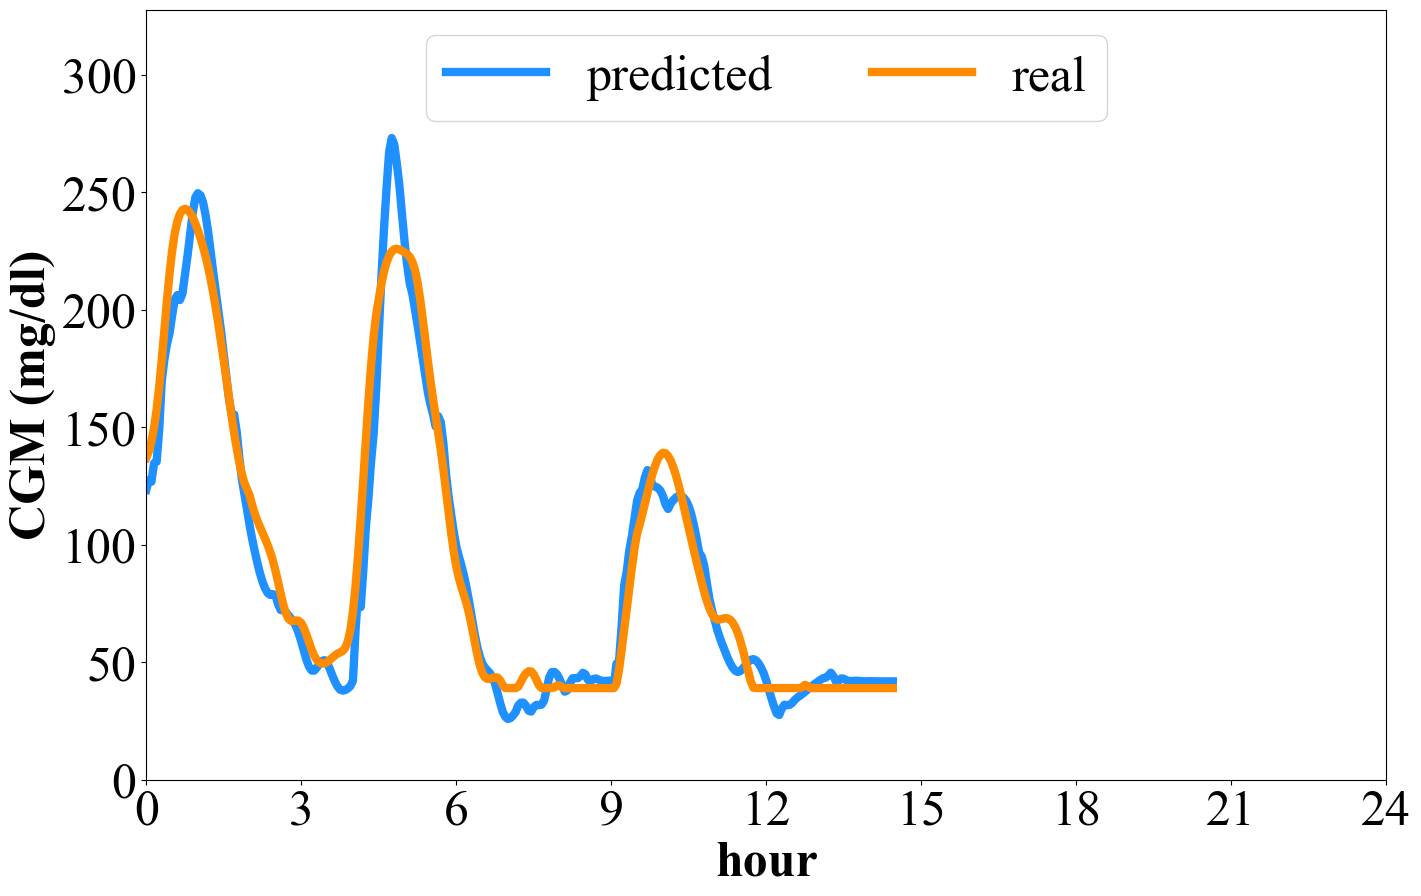

C:\Users\xinyi.yang\Desktop\group meeting\child#008.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 26ms/step
RMSE value of the global model: 67.1377
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 4134.5537 - mse: 4134.5537
Epoch 1: val_loss improved from inf to 2441.64038, saving model to Results/5_days_data_FDL/models\FDL_5_child#008.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 103ms/step - loss: 4134.5537 - mse: 4134.5537 - val_loss: 2441.6404 - val_mse: 2441.6404
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 953.3947 - mse: 953.3947
Epoch 2: val_loss improved from 2441.64038 to 1067.19360, saving model to Results/5_days_data_FDL/models\FDL_5_child#008.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 94ms/step - loss: 953.3947 - mse: 953.3947 - val_loss: 1067.1936 - val_mse: 1067.1936
Epoch 3/10
4

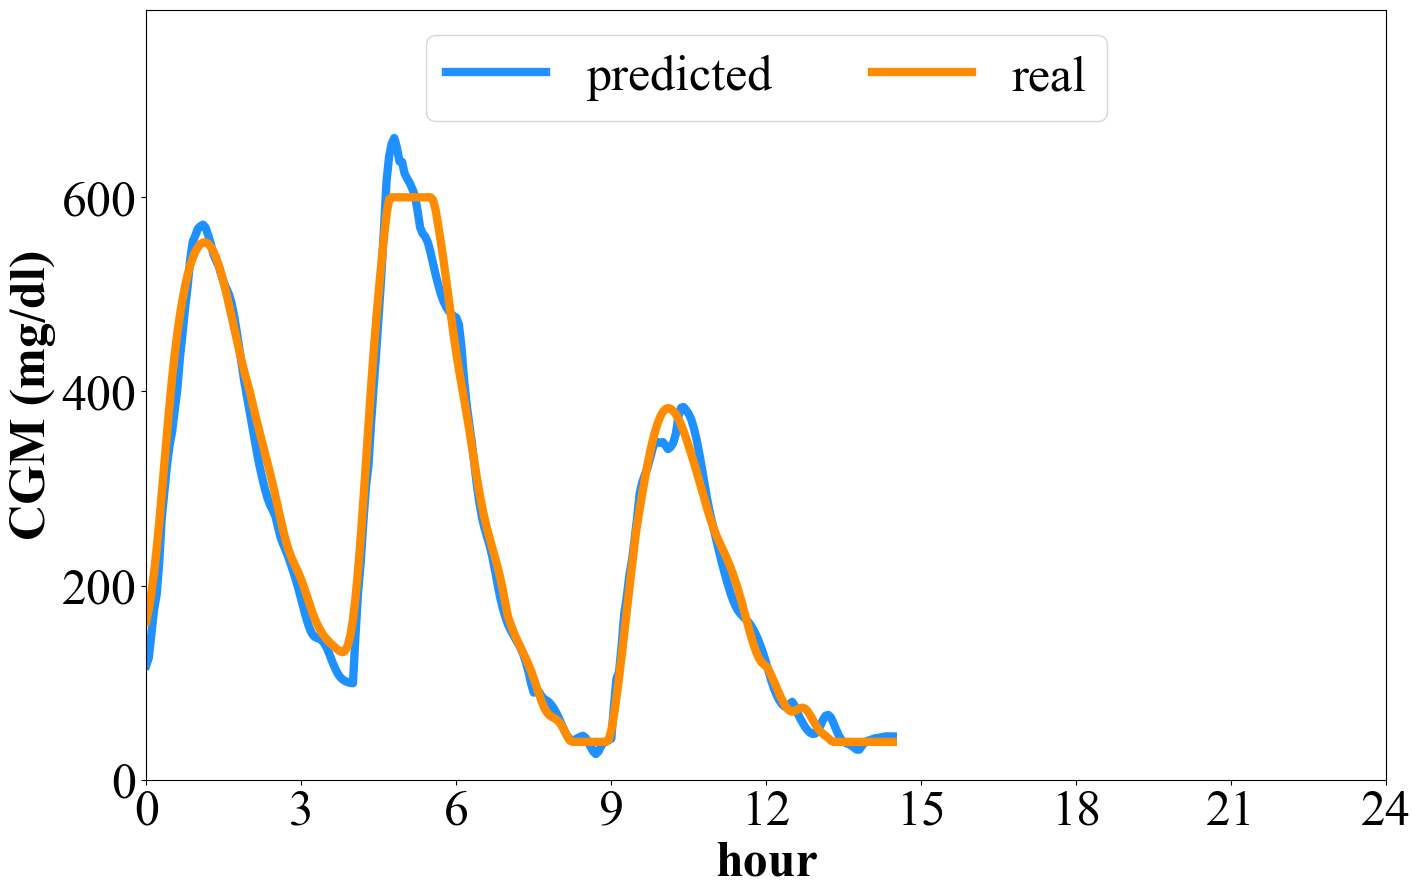

C:\Users\xinyi.yang\Desktop\group meeting\child#009.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 28ms/step
RMSE value of the global model: 42.6952
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 520.0425 - mse: 520.0425
Epoch 1: val_loss improved from inf to 389.63086, saving model to Results/5_days_data_FDL/models\FDL_5_child#009.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 101ms/step - loss: 520.0425 - mse: 520.0425 - val_loss: 389.6309 - val_mse: 389.6309
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 272.7158 - mse: 272.7158
Epoch 2: val_loss improved from 389.63086 to 257.88788, saving model to Results/5_days_data_FDL/models\FDL_5_child#009.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 89ms/step - loss: 272.7158 - mse: 272.7158 - val_loss: 257.8879 - val_mse: 257.8879
Epoch 3/10
40/40 [=====

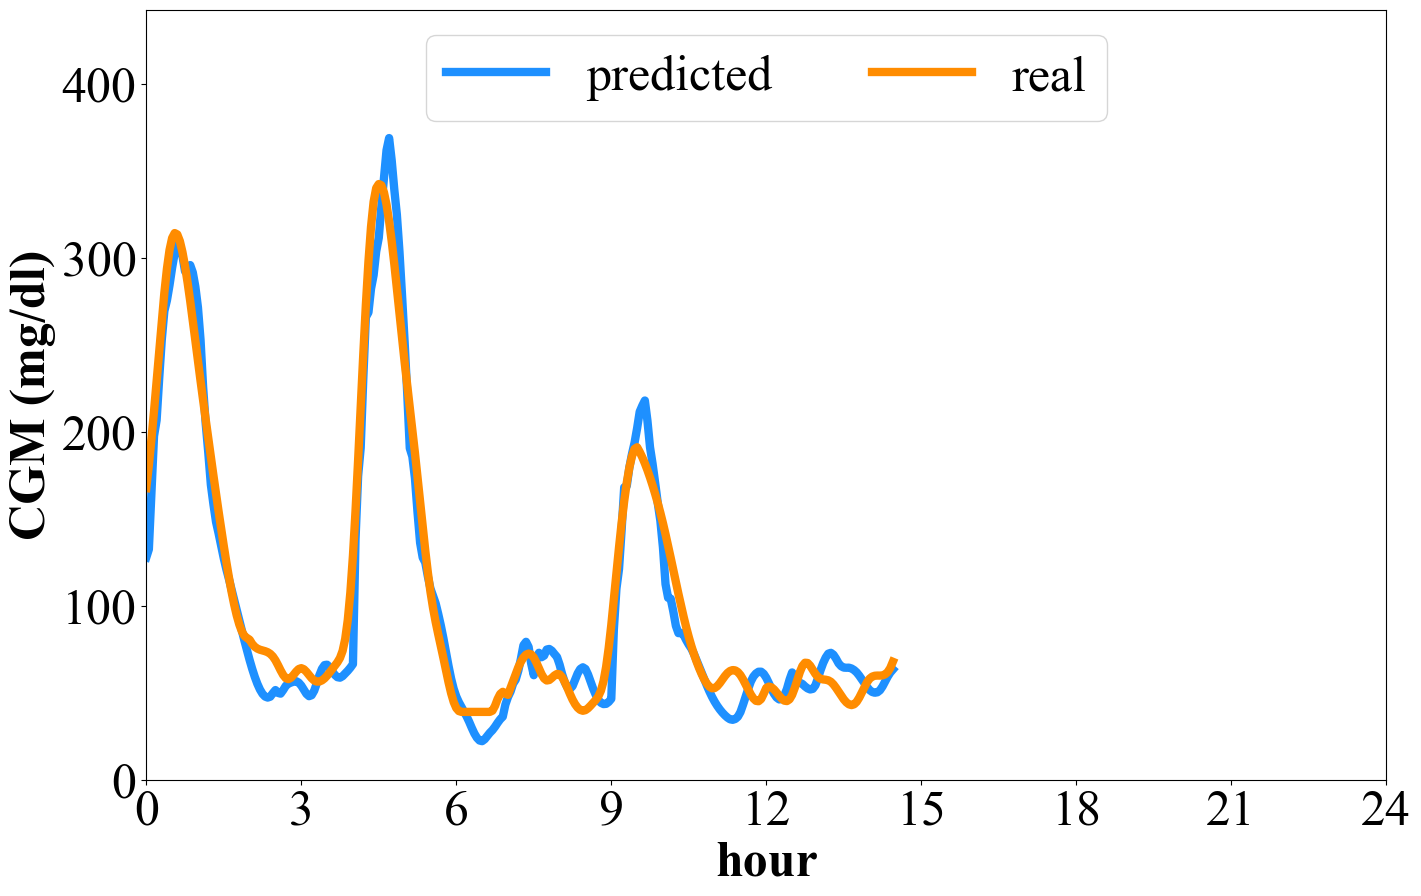

C:\Users\xinyi.yang\Desktop\group meeting\child#010.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 26ms/step
RMSE value of the global model: 30.1685
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 580.6575 - mse: 580.6575
Epoch 1: val_loss improved from inf to 320.89102, saving model to Results/5_days_data_FDL/models\FDL_5_child#010.csv_round_1_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 89ms/step - loss: 580.6575 - mse: 580.6575 - val_loss: 320.8910 - val_mse: 320.8910
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 297.9497 - mse: 297.9497
Epoch 2: val_loss did not improve from 320.89102
40/40 [==============================] - 3s 87ms/step - loss: 297.9497 - mse: 297.9497 - val_loss: 369.7023 - val_mse: 369.7023
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 263.4561 - mse: 263.4561
Epoch 3: val_loss did not improve from 320.89102
40/40 [

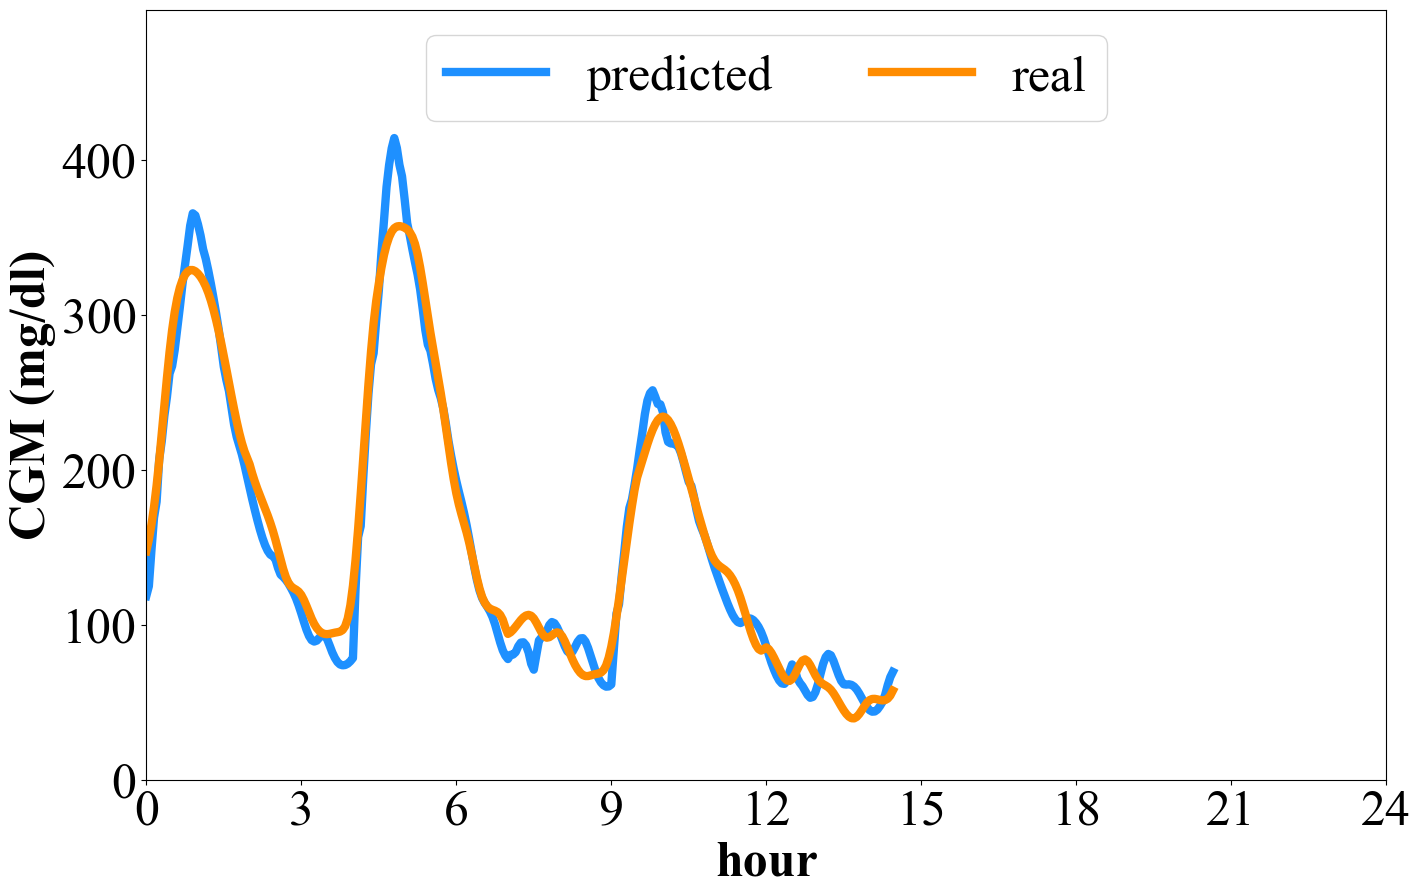

round: 2
C:\Users\xinyi.yang\Desktop\group meeting\adolescent#003.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 29ms/step
RMSE value of the global model: 16.5673
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 235.3207 - mse: 235.3207
Epoch 1: val_loss improved from inf to 247.83440, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#003.csv_round_2_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 97ms/step - loss: 235.3207 - mse: 235.3207 - val_loss: 247.8344 - val_mse: 247.8344
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 183.7110 - mse: 183.7110
Epoch 2: val_loss improved from 247.83440 to 231.01112, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#003.csv_round_2_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 92ms/step - loss: 183.7110 - mse: 183.7110 - val_loss: 231.0111 - val_mse: 231.0111


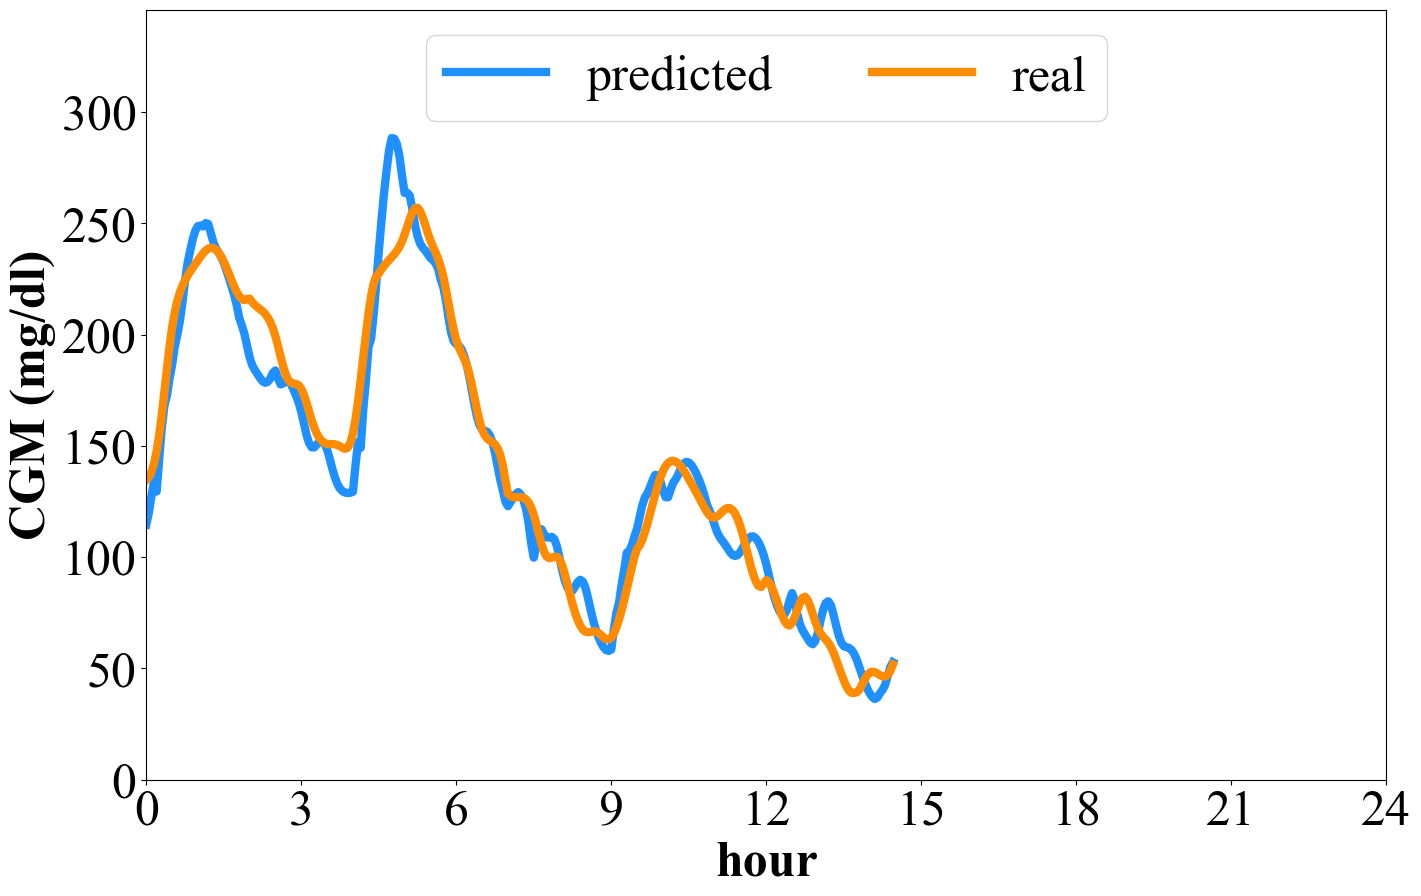

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#004.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 25ms/step
RMSE value of the global model: 18.5438
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 267.7119 - mse: 267.7119
Epoch 1: val_loss improved from inf to 299.34567, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#004.csv_round_2_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 5s 87ms/step - loss: 267.7119 - mse: 267.7119 - val_loss: 299.3457 - val_mse: 299.3457
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 189.9337 - mse: 189.9337
Epoch 2: val_loss improved from 299.34567 to 272.71295, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#004.csv_round_2_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 81ms/step - loss: 189.9337 - mse: 189.9337 - val_loss: 272.7130 - val_mse: 272.7130
Epoch 3/1

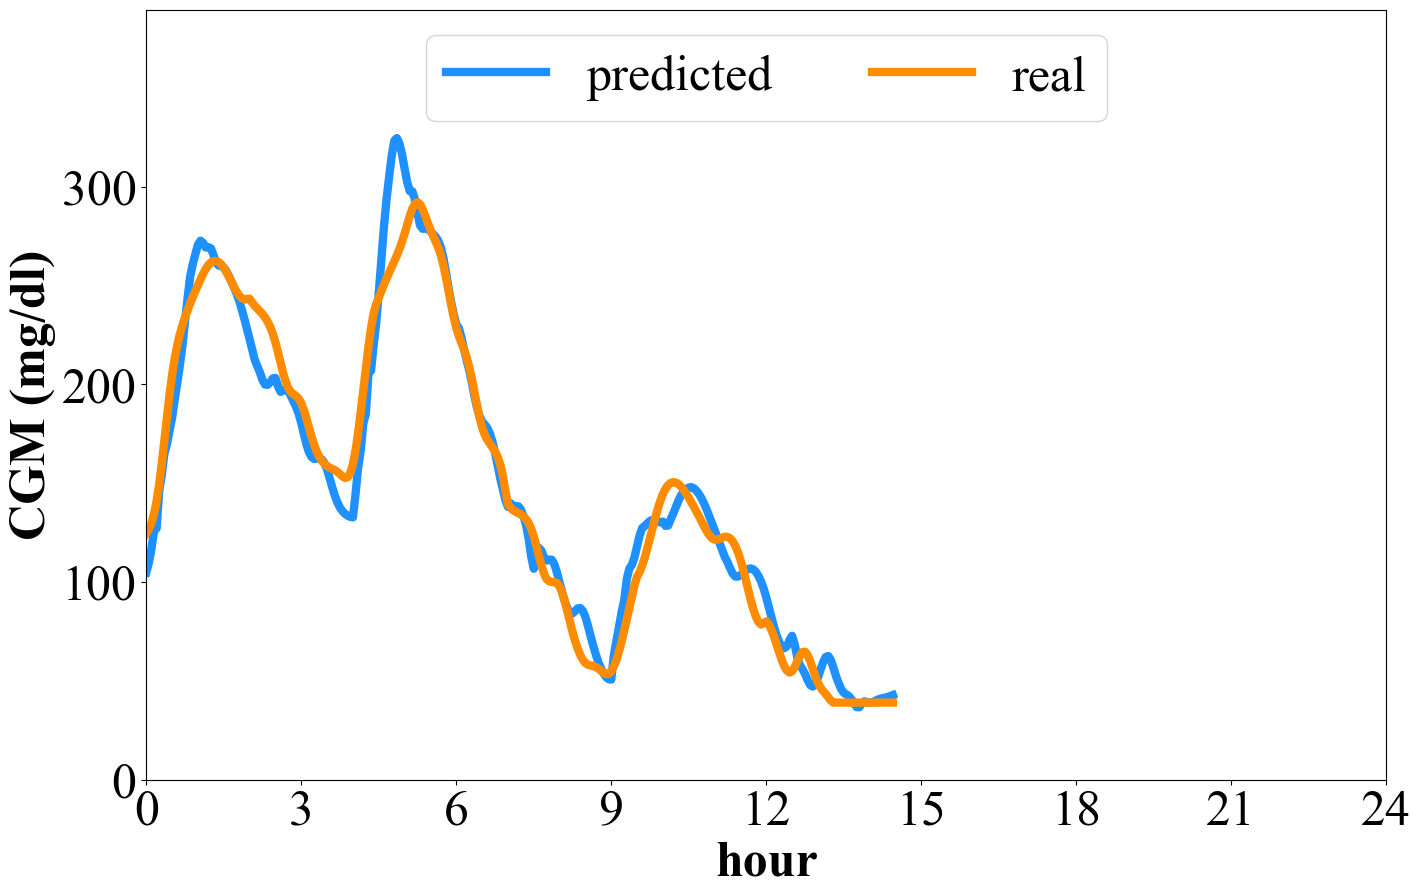

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#005.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 24ms/step
RMSE value of the global model: 18.5573
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 233.5098 - mse: 233.5098
Epoch 1: val_loss improved from inf to 276.56711, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#005.csv_round_2_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 83ms/step - loss: 233.5098 - mse: 233.5098 - val_loss: 276.5671 - val_mse: 276.5671
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 270.7722 - mse: 270.7722
Epoch 2: val_loss improved from 276.56711 to 247.25197, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#005.csv_round_2_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 79ms/step - loss: 270.7722 - mse: 270.7722 - val_loss: 247.2520 - val_mse: 247.2520
Epoch 3/1

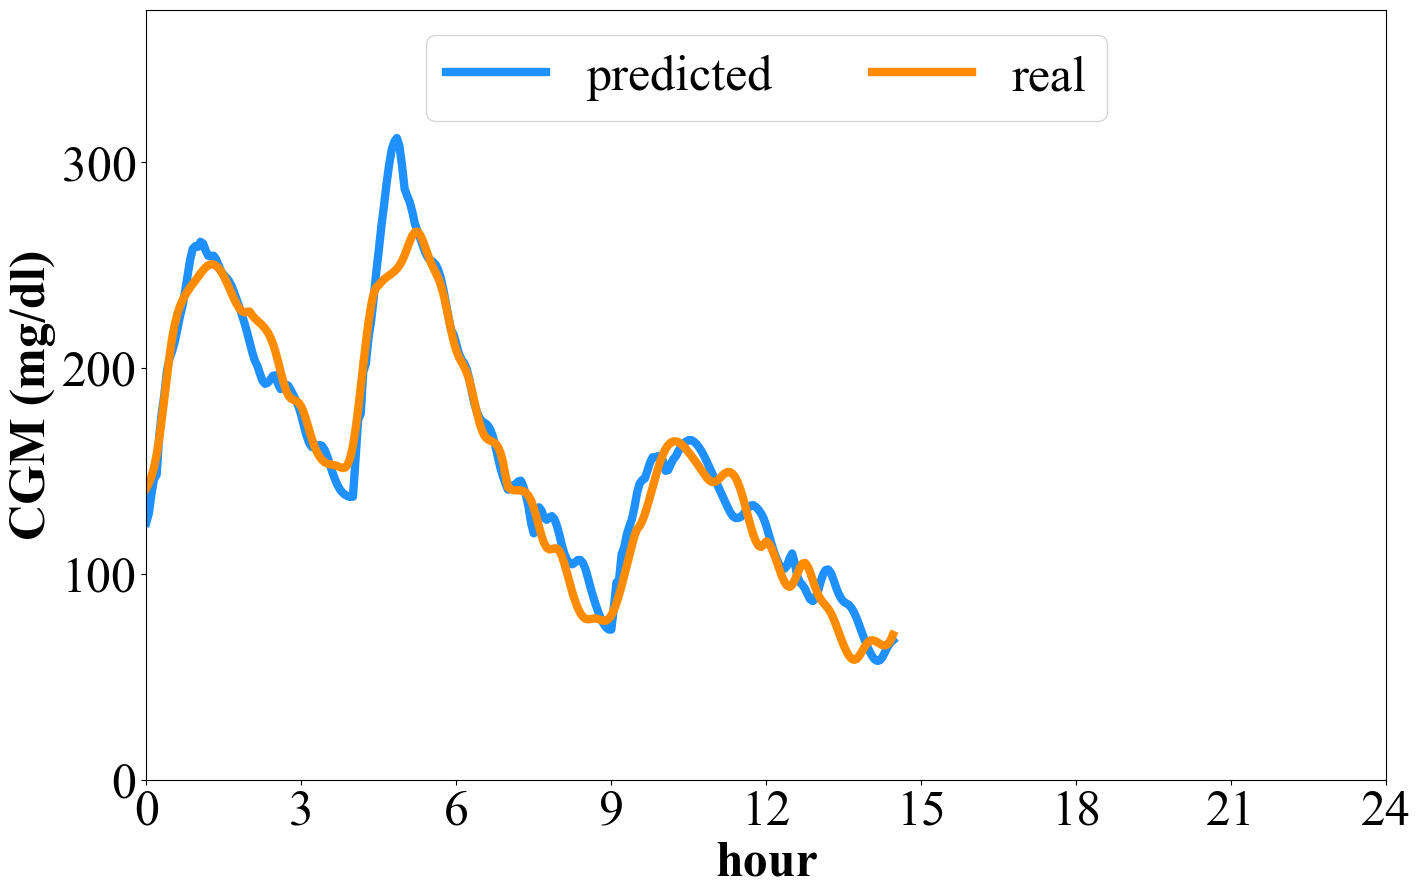

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#006.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 22ms/step
RMSE value of the global model: 16.6098
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 342.0512 - mse: 342.0512
Epoch 1: val_loss improved from inf to 237.25426, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#006.csv_round_2_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 77ms/step - loss: 342.0512 - mse: 342.0512 - val_loss: 237.2543 - val_mse: 237.2543
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 213.2863 - mse: 213.2863
Epoch 2: val_loss did not improve from 237.25426
40/40 [==============================] - 3s 68ms/step - loss: 213.2863 - mse: 213.2863 - val_loss: 249.0432 - val_mse: 249.0432
Epoch 3/10
40/40 [==============================] - ETA: 0s - loss: 204.1273 - mse: 204.1273
Epoch 3: val_loss did not improve from 237.254

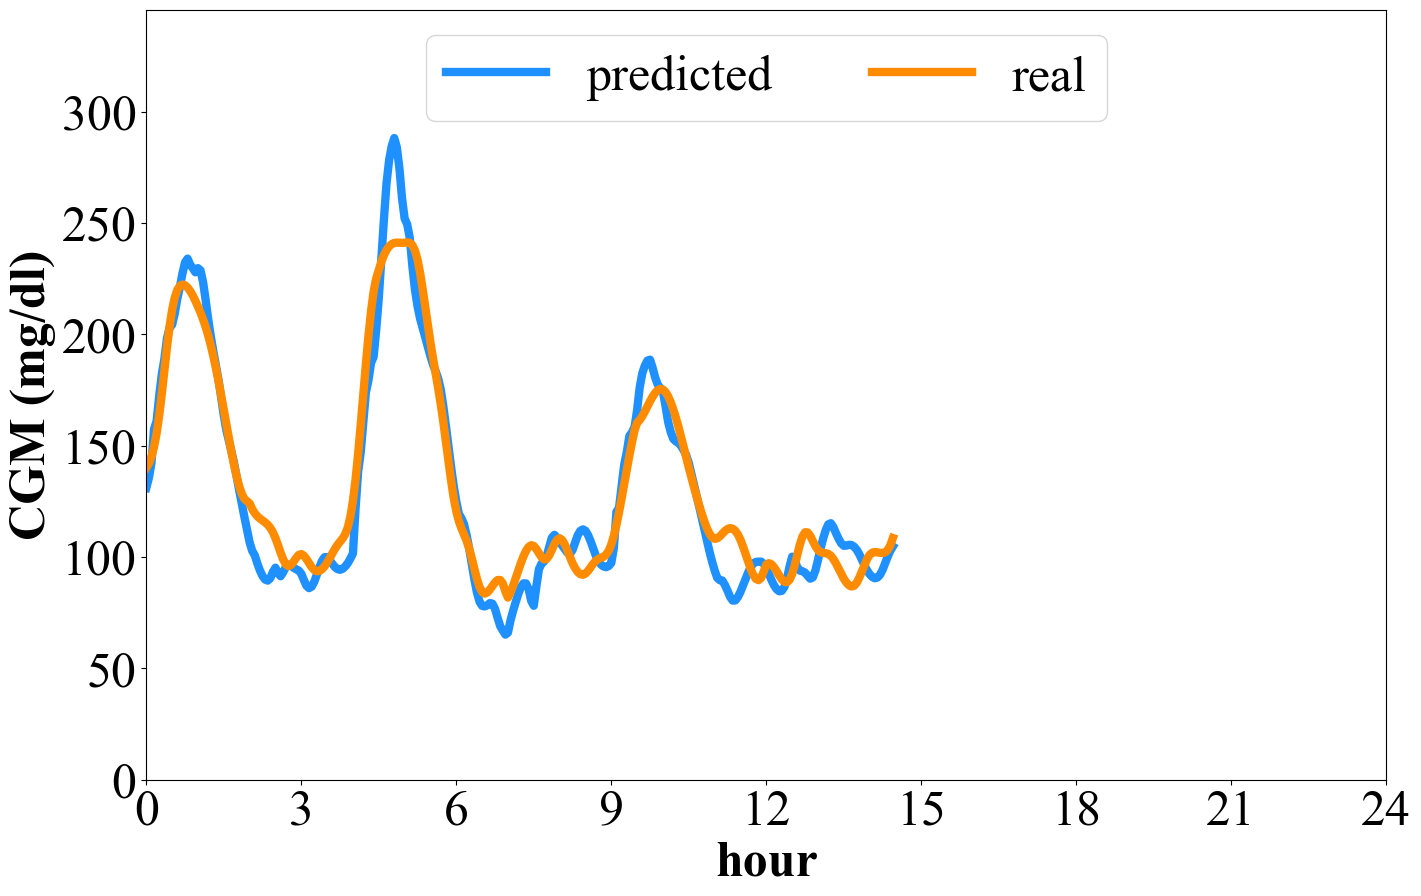

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#007.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 23ms/step
RMSE value of the global model: 31.5793
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 327.9955 - mse: 327.9955
Epoch 1: val_loss improved from inf to 373.06079, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#007.csv_round_2_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 78ms/step - loss: 327.9955 - mse: 327.9955 - val_loss: 373.0608 - val_mse: 373.0608
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 235.9450 - mse: 235.9450
Epoch 2: val_loss improved from 373.06079 to 331.32706, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#007.csv_round_2_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 71ms/step - loss: 235.9450 - mse: 235.9450 - val_loss: 331.3271 - val_mse: 331.3271
Epoch 3/1

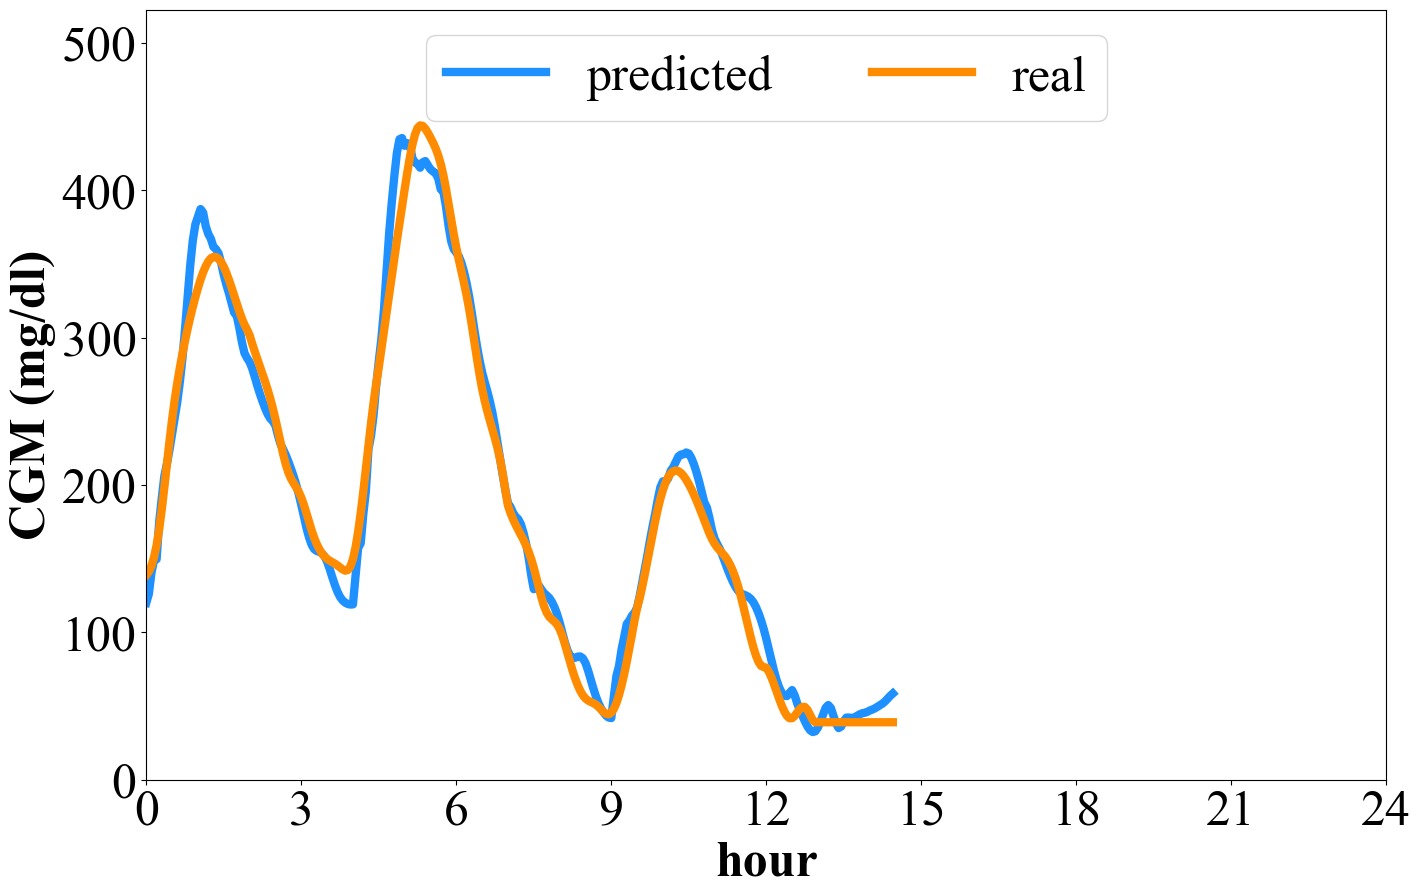

C:\Users\xinyi.yang\Desktop\group meeting\adolescent#008.csv
mins_before_predict: 30
window slide: 180
10/10 [==============================] - 0s 23ms/step
RMSE value of the global model: 27.0977
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 960.0195 - mse: 960.0195
Epoch 1: val_loss improved from inf to 641.54529, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#008.csv_round_2_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 4s 79ms/step - loss: 960.0195 - mse: 960.0195 - val_loss: 641.5453 - val_mse: 641.5453
Epoch 2/10
40/40 [==============================] - ETA: 0s - loss: 367.3607 - mse: 367.3607
Epoch 2: val_loss improved from 641.54529 to 423.14484, saving model to Results/5_days_data_FDL/models\FDL_5_adolescent#008.csv_round_2_mins_before_predict_30_window_slide_180.h5
40/40 [==============================] - 3s 69ms/step - loss: 367.3607 - mse: 367.3607 - val_loss: 423.1448 - val_mse: 423.1448
Epoch 3/1

In [7]:
patients_included = local_patients
FDL(output_folder_name, num_days, seed_number, num_rounds, patients_included, function_name, mins_before_predict_list, window_slide_list, epochs, batch_size, learning_rate,monitor)